# Project Proposal Code
## Ben Alger, Mason Even, Owen Pullam

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By # used to import different ways to access data in the XML or HTML file
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service # no longer need to download a driver file, use service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import re

from webdriver_manager.chrome import ChromeDriverManager # used to manage the Chrome driver to emulate a Chrome web browser

import time
import random

### Part 1- Define the Scrolling Function

In [3]:
browser = webdriver.Chrome()
from selenium.webdriver.common.by import By
def scroll_until_all_movies_loaded(browser, pause_time=2, max_attempts=30):
    prev_count = 0
    attempts = 0

    #this while loop ensures we scrape all the movies on a given page. 
    #It solves the issue we peviously had, where the code only scraped half of the movies on a page
    while attempts < max_attempts:
        # Scroll to the bottom of the container (this triggers loading more movies)
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(pause_time)

        #iterates through every movie available on the page. The current_count list reflects the amount of movies scraped after every loop
        movie_elements = browser.find_elements(By.CLASS_NAME, "movie")
        current_count = len(movie_elements)

        print(f"Scroll #{attempts+1}: Found {current_count} movies")

        #Checks if there are any movies left
        if current_count == prev_count:
            print("No new movies loaded. Ending scroll.")
            break

        prev_count = current_count
        attempts += 1

    print(f"Finished scrolling. Total movies loaded: {prev_count}")



### Part 2- Apply Scrolling function and move to main movie page
- First, the code navigates to the full rankings page, where all the movie data is stored
- Once at the full rankings page, this block of code applies the scrolling function previously defined while appending the links of every movie into a list

https://www.movierankings.net/


NameError: name 'browser' is not defined

In [ ]:
# navigate to the web page using the URL
url = 'https://www.movierankings.net/'
print(url)
browser.get(url)
browser.maximize_window()

#This block of code navagates the scraping to the full rankings page, which lists all the movies
try:
    full_rankings_button = WebDriverWait(browser, 10).until(
        EC.element_to_be_clickable((By.ID, "6"))
    )
    full_rankings_button.click()
    print("Successfully clicked <h3 id='6'> (Full Rankings)")
    
#prints the following message if the full_rankings_button is not clicked
except Exception as e:
    
    print(f"Error clicking <h3 id='6'>: {e}")


# add a random delay before scraping
total_wait_time = random.uniform(1, 5)  
scroll_until_all_movies_loaded(browser)

# We created the for loop below to ensure we were scraping all the data from the page
# Step 1: Load the base elements so you know how many are expected
movie_containers = browser.find_elements(By.CLASS_NAME, "movie")

titles = []
links = []
ratings = []

clicks = 0
max_clicks = 1    # ← for testing, only ever click Next this many times
while True:
    # 1) make sure all movies are loaded
    scroll_until_all_movies_loaded(browser)

    # 2) scrape current page
    movie_containers = browser.find_elements(By.CLASS_NAME, "movie")
    for movie in movie_containers:
        titles.append(movie.find_element(By.CLASS_NAME, "movie-title").text.strip())
        links.append( movie.find_element(By.CLASS_NAME, "movie-link").get_attribute("href"))
        ratings.append(movie.find_element(By.CLASS_NAME, "movie-total").text.strip())

    # 3) if we’ve already clicked Next once, break out
    if clicks >= max_clicks:
        print(f"Test mode: clicked Next {clicks} time(s), stopping.")
        break

    # 4) otherwise try to click Next
    try:
        next_btn = browser.find_element(
            By.XPATH,
            "//div[@id='list-pagination']//button[normalize-space()='Next']"
        )
        if not next_btn.is_enabled():
            print("Next button disabled → last page reached.")
            break

        next_btn.click()
        clicks += 1
        print(f"Clicked Next ({clicks}/{max_clicks})")
        time.sleep(random.uniform(1, 2))

    except Exception:
        print("No Next button found → stopping.")
        break
        
        # build DataFrame as usual
moviedf = pd.DataFrame({
    "Title": titles,
    "Link":  links,
    "Website Rating": ratings
})
display(moviedf)

https://www.movierankings.net/
Successfully clicked <h3 id='6'> (Full Rankings)
Scroll #1: Found 30 movies
Scroll #2: Found 60 movies
Scroll #3: Found 90 movies
Scroll #4: Found 120 movies
Scroll #5: Found 120 movies
No new movies loaded. Ending scroll.
Finished scrolling. Total movies loaded: 120
Scroll #1: Found 120 movies
Scroll #2: Found 120 movies
No new movies loaded. Ending scroll.
Finished scrolling. Total movies loaded: 120
Clicked Next (1/1)
Scroll #1: Found 60 movies
Scroll #2: Found 90 movies
Scroll #3: Found 120 movies
Scroll #4: Found 120 movies
No new movies loaded. Ending scroll.
Finished scrolling. Total movies loaded: 120
Test mode: clicked Next 1 time(s), stopping.


,Title,Link,Website Rating
0,Goodfellas,https://www.movierankings.net/review/769,100/100
1,Star Wars: Episode V - The Empire Strikes Back,https://www.movierankings.net/review/1891,100/100
2,Seven Samurai,https://www.movierankings.net/review/346,100/100
3,Lord of the Rings: The Return of the King,https://www.movierankings.net/review/122,100/100
4,Indiana Jones and the Raiders of the Lost Ark,https://www.movierankings.net/review/85,99/100
...,...,...,...
235,The French Connection,https://www.movierankings.net/review/1051,93/100
236,Mulan,https://www.movierankings.net/review/10674,93/100
237,The Hurt Locker,https://www.movierankings.net/review/12162,93/100
238,Fanny and Alexander,https://www.movierankings.net/review/5961,93/100


In [75]:
moviedf.to_csv("Fully-Scraped-Movies.csv", encoding = 'utf-8', index = False)

In [57]:
moviescheck = pd.read_csv('Fully-Scraped-Movies.csv', encoding ='utf-8')
moviescheck

,Title,Link,Website Rating
0,Goodfellas,https://www.movierankings.net/review/769,100/100
1,Star Wars: Episode V - The Empire Strikes Back,https://www.movierankings.net/review/1891,100/100
2,Seven Samurai,https://www.movierankings.net/review/346,100/100
3,Lord of the Rings: The Return of the King,https://www.movierankings.net/review/122,100/100
4,Indiana Jones and the Raiders of the Lost Ark,https://www.movierankings.net/review/85,99/100
...,...,...,...
5635,Transylmania,https://www.movierankings.net/review/37190,0/100
5636,Safe Haven,https://www.movierankings.net/review/112949,0/100
5637,Vampires Suck,https://www.movierankings.net/review/40264,0/100
5638,Inappropriate Comedy,https://www.movierankings.net/review/156268,0/100


In [7]:
testdf = moviedf.head(5)

### Part 3- merge movie DF and Kaggle df on the movie title

In [71]:
kaggledf = pd.read_csv('movie_budgets_and_revenues.csv', encoding ='utf-8')
kaggledf = kaggledf.rename(columns={"Movie Name" : "Title"})
join_df = pd.merge(kaggledf, moviedf, on="Title", how="outer")

#fix the website rating column
join_df['Website Rating'] = pd.to_numeric(
    join_df['Website Rating'].str.split('/').str[0],
    errors='coerce'
).astype('Int64')

join_df2 = join_df[join_df['Release Date'].isna()]
join_df3 = join_df[(join_df['Release Date'].isna()) & (join_df['Website Rating'] > 90)]
display(join_df3)
#are there any issues with differently named titles?

,Number,Release Date,Title,Budget,Domestic Gross,Worldwide Gross,Link,Website Rating
6669,NaN,NaN,Star Wars: Episode V - The Empire Strikes Back,NaN,NaN,NaN,https://www.movierankings.net/review/1891,100
6670,NaN,NaN,Seven Samurai,NaN,NaN,NaN,https://www.movierankings.net/review/346,100
6671,NaN,NaN,Lord of the Rings: The Return of the King,NaN,NaN,NaN,https://www.movierankings.net/review/122,100
6672,NaN,NaN,Indiana Jones and the Raiders of the Lost Ark,NaN,NaN,NaN,https://www.movierankings.net/review/85,99
6673,NaN,NaN,Lord of the Rings: The Two Towers,NaN,NaN,NaN,https://www.movierankings.net/review/121,99
...,...,...,...,...,...,...,...,...
6842,NaN,NaN,Mr. Smith Goes to Washington,NaN,NaN,NaN,https://www.movierankings.net/review/3083,91
6843,NaN,NaN,Kiki's Delivery Service,NaN,NaN,NaN,https://www.movierankings.net/review/16859,91
6844,NaN,NaN,The Philadelphia Story,NaN,NaN,NaN,https://www.movierankings.net/review/981,91
6845,NaN,NaN,The Long Goodbye,NaN,NaN,NaN,https://www.movierankings.net/review/1847,91


In [77]:
join_df2.to_csv("MissingMovies.csv", encoding = 'utf-8', index = False)

In [79]:
import pandas as pd
from difflib import get_close_matches

# Unique title lists
titles1 = moviedf['Title'].unique()
titles2 = kaggledf['Title'].unique()

# Find one best fuzzy match per title in movierankings
matches = []
for t in titles1:
    close = get_close_matches(t, titles2, n=1, cutoff=0.8)  # cutoff ∈ [0,1]
    if close:
        matches.append({
            'movierankings_title': t,
            'kaggle_title':       close[0]
        })

# Build & inspect
similar_df = pd.DataFrame(matches)
similar_df

,movierankings_title,kaggle_title
0,Goodfellas,Goodfellas
1,Star Wars: Episode V - The Empire Strikes Back,Star Wars Ep. V: The Empire Strikes Back
2,Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King
3,Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers
4,Blade Runner 2049,Blade Runner 2049
...,...,...
3772,The Last Airbender,The Last Airbender
3773,Silent Hill: Revelation,Silent Hill: Revelation 3D
3774,Left Behind,Left Behind
3775,Safe Haven,Safe Haven


In [83]:
diff_df = similar_df[
    similar_df['movierankings_title'] != similar_df['kaggle_title']
].reset_index(drop=True)

diff_df
diff_df.to_csv("DifferentMovies.csv", encoding = 'utf-8')

In [91]:
correct_join = pd.merge(kaggledf, moviedf, on="Title", how='inner')
correct_join.drop('Number', axis=1, inplace=True)
correct_join

,Release Date,Title,Budget,Domestic Gross,Worldwide Gross,Link,Website Rating
0,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,317,514,386",https://www.movierankings.net/review/76600,89/100
1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781",https://www.movierankings.net/review/299534,92/100
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",https://www.movierankings.net/review/1865,11/100
3,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",https://www.movierankings.net/review/99861,77/100
4,"May 23, 2018",Solo: A Star Wars Story,"$330,400,000","$213,767,512","$393,151,347",https://www.movierankings.net/review/348350,72/100
...,...,...,...,...,...,...,...
3410,"Aug 13, 2019",The VelociPastor,"$35,000",$0,$0,https://www.movierankings.net/review/457712,56/100
3411,"Oct 19, 1994",Clerks,"$27,000","$3,073,428","$3,894,240",https://www.movierankings.net/review/2292,87/100
3412,"Apr 28, 2006",Clean,"$10,000","$138,711","$138,711",https://www.movierankings.net/review/689700,38/100
3413,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926",https://www.movierankings.net/review/14337,78/100


In [162]:
added_titles = pd.read_excel('DifferentMovies.xlsx', sheet_name = 'DifferentMovies (2)')
new_kaggle_merge = pd.merge(kaggledf, added_titles, on="Title", how='outer')
encoding_correction = new_kaggle_merge[new_kaggle_merge['Release Date'].isna()]
encoding_correction.to_csv("encoding_correction.csv", encoding = 'utf-8', index = False)
new_kaggle_merge

,Number,Release Date,Title,Budget,Domestic Gross,Worldwide Gross,movierankings_title
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,058,880,845",Star Wars: Episode VII - The Force Awakens
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,317,514,386",NaN
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057",NaN
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781",NaN
4,5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",NaN
...,...,...,...,...,...,...,...
6599,NaN,NaN,Assassinâ€™s Creed,NaN,NaN,NaN,Assassin's Creed
6600,NaN,NaN,Malibuâ€™s Most Wanted,NaN,NaN,NaN,Malibu's Most Wanted
6601,NaN,NaN,Thatâ€™s My Boy,NaN,NaN,NaN,That's My Boy
6602,NaN,NaN,Motherâ€™s Day,NaN,NaN,NaN,Mother's Day


In [172]:
kaggledf.to_csv('kaggle_fixed.csv', encoding = 'utf-8', index = False)


In [198]:
added_titles

,movierankings_title,Title
0,Star Wars: Episode V - The Empire Strikes Back,Star Wars Ep. V: The Empire Strikes Back
1,Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King
2,Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers
3,The Godfather Part II,The Godfather: Part II
4,No Country For Old Men,No Country for Old Men
...,...,...
343,Scary Movie 5,Scary Movie V
344,Holmes and Watson,Holmes & Watson
345,Cats and Dogs: Revenge of Kitty Galore,Cats & Dogs: The Revenge of Kitty Galore
346,The Oogieloves in the Big Balloon Adventure,The Oogieloves in the BIG Balloon Adventure


In [194]:
kagglefixed = pd.read_csv('kaggle_fixed.csv',encoding='utf-8')
new_merge = pd.merge(kagglefixed, added_titles, on='Title', how = 'outer')
new_merge

,Number,Release Date,Title,Budget,Domestic Gross,Worldwide Gross,movierankings_title
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,058,880,845",Star Wars: Episode VII - The Force Awakens
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,317,514,386",NaN
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057",NaN
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781",NaN
4,5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",NaN
...,...,...,...,...,...,...,...
6599,NaN,NaN,Assassinâ€™s Creed,NaN,NaN,NaN,Assassin's Creed
6600,NaN,NaN,Malibuâ€™s Most Wanted,NaN,NaN,NaN,Malibu's Most Wanted
6601,NaN,NaN,Thatâ€™s My Boy,NaN,NaN,NaN,That's My Boy
6602,NaN,NaN,Motherâ€™s Day,NaN,NaN,NaN,Mother's Day


In [206]:
encod = pd.read_csv('encoding_correction.csv', encoding = 'utf-8')
new_kaggle_inner = pd.merge(kaggledf, added_titles, on="Title", how='inner')
new_kaggle_inner

,Number,Release Date,Title,Budget,Domestic Gross,Worldwide Gross,movierankings_title
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,058,880,845",Star Wars: Episode VII - The Force Awakens
1,14,"Dec 18, 2019",Star Wars: The Rise of Skywalker,"$275,000,000","$515,202,542","$1,070,655,325",Star Wars: Episode IX - The Rise of Skywalker
2,17,"Mar 23, 2016",Batman v Superman: Dawn of Justice,"$263,000,000","$330,360,194","$872,395,091",Batman V Superman: Dawn of Justice
3,18,"Dec 13, 2017",Star Wars Ep. VIII: The Last Jedi,"$262,000,000","$620,181,382","$1,325,604,756",Star Wars: Episode VIII - The Last Jedi
4,19,"Jul 11, 2019",The Lion King,"$260,000,000","$543,638,043","$1,646,106,779",Lion King
...,...,...,...,...,...,...,...
263,"5,872","Jun 24, 2020",Summerland,"$1,100,000","$58,434","$1,414,596",Slumberland
264,"6,035","Aug 31, 2012","For a Good Time, Call","$850,000","$1,251,749","$1,386,088","For a Good Time, Call..."
265,"6,453","Oct 25, 2013",A True Story,"$45,000",$0,$0,True Story
266,"6,460","Sep 25, 2018",Terrifier,"$35,000","$339,946","$340,934",Terrifer


In [236]:
display(kaggledf.head(5))
display(new_kaggle_inner.head(5))

,Number,Release Date,Title,Budget,Domestic Gross,Worldwide Gross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,058,880,845"
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,317,514,386"
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
4,5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"


,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,movierankings_title
0,1,"Dec 16, 2015","$533,200,000","$936,662,225","$2,058,880,845",Star Wars: Episode VII - The Force Awakens
1,14,"Dec 18, 2019","$275,000,000","$515,202,542","$1,070,655,325",Star Wars: Episode IX - The Rise of Skywalker
2,17,"Mar 23, 2016","$263,000,000","$330,360,194","$872,395,091",Batman V Superman: Dawn of Justice
3,18,"Dec 13, 2017","$262,000,000","$620,181,382","$1,325,604,756",Star Wars: Episode VIII - The Last Jedi
4,19,"Jul 11, 2019","$260,000,000","$543,638,043","$1,646,106,779",Lion King


In [240]:
new_kaggle_inner.rename(columns={'movierankings_title': 'Title'}, inplace=True)
new_kaggle_inner

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title
0,1,"Dec 16, 2015","$533,200,000","$936,662,225","$2,058,880,845",Star Wars: Episode VII - The Force Awakens
1,14,"Dec 18, 2019","$275,000,000","$515,202,542","$1,070,655,325",Star Wars: Episode IX - The Rise of Skywalker
2,17,"Mar 23, 2016","$263,000,000","$330,360,194","$872,395,091",Batman V Superman: Dawn of Justice
3,18,"Dec 13, 2017","$262,000,000","$620,181,382","$1,325,604,756",Star Wars: Episode VIII - The Last Jedi
4,19,"Jul 11, 2019","$260,000,000","$543,638,043","$1,646,106,779",Lion King
...,...,...,...,...,...,...
263,"5,872","Jun 24, 2020","$1,100,000","$58,434","$1,414,596",Slumberland
264,"6,035","Aug 31, 2012","$850,000","$1,251,749","$1,386,088","For a Good Time, Call..."
265,"6,453","Oct 25, 2013","$45,000",$0,$0,True Story
266,"6,460","Sep 25, 2018","$35,000","$339,946","$340,934",Terrifer


In [257]:
combined_final_kaggle = pd.concat([new_kaggle_inner, kaggledf], ignore_index=True)
joindf = pd.merge(combined_final_kaggle, moviedf, on = 'Title', how = 'inner')
joindf

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating
0,1,"Dec 16, 2015","$533,200,000","$936,662,225","$2,058,880,845",Star Wars: Episode VII - The Force Awakens,https://www.movierankings.net/review/140607,89/100
1,14,"Dec 18, 2019","$275,000,000","$515,202,542","$1,070,655,325",Star Wars: Episode IX - The Rise of Skywalker,https://www.movierankings.net/review/181812,68/100
2,17,"Mar 23, 2016","$263,000,000","$330,360,194","$872,395,091",Batman V Superman: Dawn of Justice,https://www.movierankings.net/review/209112,67/100
3,18,"Dec 13, 2017","$262,000,000","$620,181,382","$1,325,604,756",Star Wars: Episode VIII - The Last Jedi,https://www.movierankings.net/review/181808,87/100
4,19,"Jul 11, 2019","$260,000,000","$543,638,043","$1,646,106,779",Lion King,https://www.movierankings.net/review/420818,74/100
...,...,...,...,...,...,...,...,...
3679,"6,465","Aug 13, 2019","$35,000",$0,$0,The VelociPastor,https://www.movierankings.net/review/457712,56/100
3680,"6,475","Oct 19, 1994","$27,000","$3,073,428","$3,894,240",Clerks,https://www.movierankings.net/review/2292,87/100
3681,"6,502","Apr 28, 2006","$10,000","$138,711","$138,711",Clean,https://www.movierankings.net/review/689700,38/100
3682,"6,510","Oct 8, 2004","$7,000","$424,760","$841,926",Primer,https://www.movierankings.net/review/14337,78/100


In [8]:
joindf.to_csv('FinalMovieList.csv', encoding ='utf-8', index = False)


NameError: name 'joindf' is not defined

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating
0,1,"Dec 16, 2015","$533,200,000","$936,662,225","$2,058,880,845",Star Wars: Episode VII - The Force Awakens,https://www.movierankings.net/review/140607,89/100
1,14,"Dec 18, 2019","$275,000,000","$515,202,542","$1,070,655,325",Star Wars: Episode IX - The Rise of Skywalker,https://www.movierankings.net/review/181812,68/100
2,17,"Mar 23, 2016","$263,000,000","$330,360,194","$872,395,091",Batman V Superman: Dawn of Justice,https://www.movierankings.net/review/209112,67/100
3,18,"Dec 13, 2017","$262,000,000","$620,181,382","$1,325,604,756",Star Wars: Episode VIII - The Last Jedi,https://www.movierankings.net/review/181808,87/100
4,19,"Jul 11, 2019","$260,000,000","$543,638,043","$1,646,106,779",Lion King,https://www.movierankings.net/review/420818,74/100
...,...,...,...,...,...,...,...,...
3679,"6,465","Aug 13, 2019","$35,000",$0,$0,The VelociPastor,https://www.movierankings.net/review/457712,56/100
3680,"6,475","Oct 19, 1994","$27,000","$3,073,428","$3,894,240",Clerks,https://www.movierankings.net/review/2292,87/100
3681,"6,502","Apr 28, 2006","$10,000","$138,711","$138,711",Clean,https://www.movierankings.net/review/689700,38/100
3682,"6,510","Oct 8, 2004","$7,000","$424,760","$841,926",Primer,https://www.movierankings.net/review/14337,78/100


### Run similarity test again

In [247]:
# Unique title lists
titles1 = moviedf['Title'].unique()
titles2 = combined_final['Title'].unique()

# Find one best fuzzy match per title in movierankings
matches = []
for t in titles1:
    close = get_close_matches(t, titles2, n=1, cutoff=0.8)  # cutoff ∈ [0,1]
    if close:
        matches.append({
            'movierankings_title': t,
            'kaggle_title':       close[0]
        })

# Build & inspect
similar_df2 = pd.DataFrame(matches)
similar_df2

,movierankings_title,kaggle_title
0,Goodfellas,Goodfellas
1,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode V - The Empire Strikes Back
2,Lord of the Rings: The Return of the King,Lord of the Rings: The Return of the King
3,Lord of the Rings: The Two Towers,Lord of the Rings: The Two Towers
4,Blade Runner 2049,Blade Runner 2049
...,...,...
3776,The Last Airbender,The Last Airbender
3777,Silent Hill: Revelation,Silent Hill: Revelation
3778,Left Behind,Left Behind
3779,Safe Haven,Safe Haven


In [253]:
diff_df2 = similar_df2[
    similar_df2['movierankings_title'] != similar_df2['kaggle_title']
].reset_index(drop=True)

diff_df2
diff_df2.to_csv("DifferentMovies2.csv", encoding = 'utf-8')

In [208]:
#i know these movies are in the kaggle df, but I cant get them for some reason
encod

,Title
0,All the President's Men
1,Schindler's List
2,Mission: Impossible - Fallout
3,It's a Wonderful Life
4,Y tu mamÃ¡ tambiÃ©n
...,...
79,Assassin's Creed
80,Malibu's Most Wanted
81,That's My Boy
82,Mother's Day


### added_titles is the titles that were excluded from the merge due to encoding and typos between the kaggle df and scraped df. 
- now, we will re-scrape these titles to get the correct link

## SKIP TO THIS PART - NO SCRAPING NEEDED IT IS ALL IN CSV

### Part 3- Movie Page Scraping
- The block of code below iterates through each link in the list above, appending certain variables into a list, and ultimately turning those lists into a dataframe

In [28]:
joined_df = pd.read_csv('FinalMovieList.csv', encoding ='utf-8')
joined_df

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating
0,1,"Dec 16, 2015","$533,200,000","$936,662,225","$2,058,880,845",Star Wars: Episode VII - The Force Awakens,https://www.movierankings.net/review/140607,89/100
1,14,"Dec 18, 2019","$275,000,000","$515,202,542","$1,070,655,325",Star Wars: Episode IX - The Rise of Skywalker,https://www.movierankings.net/review/181812,68/100
2,17,"Mar 23, 2016","$263,000,000","$330,360,194","$872,395,091",Batman V Superman: Dawn of Justice,https://www.movierankings.net/review/209112,67/100
3,18,"Dec 13, 2017","$262,000,000","$620,181,382","$1,325,604,756",Star Wars: Episode VIII - The Last Jedi,https://www.movierankings.net/review/181808,87/100
4,19,"Jul 11, 2019","$260,000,000","$543,638,043","$1,646,106,779",Lion King,https://www.movierankings.net/review/420818,74/100
...,...,...,...,...,...,...,...,...
3679,"6,465","Aug 13, 2019","$35,000",$0,$0,The VelociPastor,https://www.movierankings.net/review/457712,56/100
3680,"6,475","Oct 19, 1994","$27,000","$3,073,428","$3,894,240",Clerks,https://www.movierankings.net/review/2292,87/100
3681,"6,502","Apr 28, 2006","$10,000","$138,711","$138,711",Clean,https://www.movierankings.net/review/689700,38/100
3682,"6,510","Oct 8, 2004","$7,000","$424,760","$841,926",Primer,https://www.movierankings.net/review/14337,78/100


In [30]:
import numpy as np
# Fix Metacritic to be out of 100 and coerce errors
joined_df['Website Rating'] = pd.to_numeric(
    joined_df['Website Rating'].str.split('/').str[0],
    errors='coerce'
    
).astype('Int64')
joined_df['Budget'] = joined_df['Budget'].str.replace("$", "", regex=False).str.replace(",", "").str.strip()
joined_df['Domestic Gross'] = joined_df['Domestic Gross'].str.replace("$", "", regex=False).str.replace(",", "").str.strip()
joined_df['Worldwide Gross'] = joined_df['Worldwide Gross'].str.replace("$", "", regex=False).str.replace(",", "").str.strip()

joined_df['Domestic Gross']  = pd.to_numeric(joined_df['Domestic Gross'],  errors='coerce')
joined_df['Worldwide Gross'] = pd.to_numeric(joined_df['Worldwide Gross'], errors='coerce')
joined_df['Budget'] = pd.to_numeric(joined_df['Budget'], errors='coerce')

# now just add them
joined_df['Total Gross'] = joined_df['Domestic Gross'] + joined_df['Worldwide Gross']
joined_df['Net Gross'] = joined_df['Total Gross'] - joined_df['Budget']

joined_df
#limitdf = joined_df[(joined_df['Website Rating'] > 50) & (joined_df['


,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
0,1,"Dec 16, 2015",533200000,936662225,2058880845,Star Wars: Episode VII - The Force Awakens,https://www.movierankings.net/review/140607,89,2995543070,2462343070
1,14,"Dec 18, 2019",275000000,515202542,1070655325,Star Wars: Episode IX - The Rise of Skywalker,https://www.movierankings.net/review/181812,68,1585857867,1310857867
2,17,"Mar 23, 2016",263000000,330360194,872395091,Batman V Superman: Dawn of Justice,https://www.movierankings.net/review/209112,67,1202755285,939755285
3,18,"Dec 13, 2017",262000000,620181382,1325604756,Star Wars: Episode VIII - The Last Jedi,https://www.movierankings.net/review/181808,87,1945786138,1683786138
4,19,"Jul 11, 2019",260000000,543638043,1646106779,Lion King,https://www.movierankings.net/review/420818,74,2189744822,1929744822
...,...,...,...,...,...,...,...,...,...,...
3679,"6,465","Aug 13, 2019",35000,0,0,The VelociPastor,https://www.movierankings.net/review/457712,56,0,-35000
3680,"6,475","Oct 19, 1994",27000,3073428,3894240,Clerks,https://www.movierankings.net/review/2292,87,6967668,6940668
3681,"6,502","Apr 28, 2006",10000,138711,138711,Clean,https://www.movierankings.net/review/689700,38,277422,267422
3682,"6,510","Oct 8, 2004",7000,424760,841926,Primer,https://www.movierankings.net/review/14337,78,1266686,1259686


In [32]:
joined_df.sort_values("Net Gross", ascending=True, inplace=True)
joined_df

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
363,105,"Jul 13, 2022",200000000,0,451178,The Gray Man,https://www.movierankings.net/review/725201,75,451178,-199548822
362,104,"Jul 2, 2021",200000000,0,19220000,The Tomorrow War,https://www.movierankings.net/review/588228,70,19220000,-180780000
426,162,"Mar 10, 2022",175000000,1399001,12271142,Turning Red,https://www.movierankings.net/review/508947,83,13670143,-161329857
472,203,"Nov 1, 2019",159000000,0,914706,The Irishman,https://www.movierankings.net/review/398978,92,914706,-158085294
521,263,"Dec 13, 2019",150000000,0,0,6 Underground,https://www.movierankings.net/review/509967,46,0,-150000000
...,...,...,...,...,...,...,...,...,...,...
325,56,"Dec 14, 2021",200000000,814811535,1908532719,Spider-Man: No Way Home,https://www.movierankings.net/review/634649,88,2723344254,2523344254
269,2,"Dec 9, 2022",460000000,684075767,2317514386,Avatar: The Way of Water,https://www.movierankings.net/review/76600,89,3001590153,2541590153
327,58,"Dec 18, 1997",200000000,674460013,2223048786,Titanic,https://www.movierankings.net/review/597,87,2897508799,2697508799
270,4,"Apr 23, 2019",400000000,858373000,2748242781,Avengers: Endgame,https://www.movierankings.net/review/299534,92,3606615781,3206615781


In [34]:
#drop all the rows that have no revenue data
nodata = joined_df[joined_df['Total Gross'] == 0].index
joined_df.drop(index = nodata, inplace = True)
joined_df

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
363,105,"Jul 13, 2022",200000000,0,451178,The Gray Man,https://www.movierankings.net/review/725201,75,451178,-199548822
362,104,"Jul 2, 2021",200000000,0,19220000,The Tomorrow War,https://www.movierankings.net/review/588228,70,19220000,-180780000
426,162,"Mar 10, 2022",175000000,1399001,12271142,Turning Red,https://www.movierankings.net/review/508947,83,13670143,-161329857
472,203,"Nov 1, 2019",159000000,0,914706,The Irishman,https://www.movierankings.net/review/398978,92,914706,-158085294
520,261,"Nov 4, 2021",150000000,0,173638,Red Notice,https://www.movierankings.net/review/512195,55,173638,-149826362
...,...,...,...,...,...,...,...,...,...,...
325,56,"Dec 14, 2021",200000000,814811535,1908532719,Spider-Man: No Way Home,https://www.movierankings.net/review/634649,88,2723344254,2523344254
269,2,"Dec 9, 2022",460000000,684075767,2317514386,Avatar: The Way of Water,https://www.movierankings.net/review/76600,89,3001590153,2541590153
327,58,"Dec 18, 1997",200000000,674460013,2223048786,Titanic,https://www.movierankings.net/review/597,87,2897508799,2697508799
270,4,"Apr 23, 2019",400000000,858373000,2748242781,Avengers: Endgame,https://www.movierankings.net/review/299534,92,3606615781,3206615781


#### before scraping, apply the filtering condition below to remove data that is irrelevant to analysis:
- by using this condition, it eliminates any movies who have 0 total gross regardless of rating, which means there isn't any price data, so it wont be relevant
- it also elimantes movies that gross more than 100000 and have a poor rating, so unpopular movies that did poorly

In [52]:
#check different filtering conditions
goodmovies = joined_df[(joined_df['Total Gross'] > 0)]
goodmovies = joined_df[(joined_df['Total Gross'] > 100000) & (joined_df['Website Rating'] > 50)]

moviesremoved = joined_df[(joined_df['Total Gross'] < 1000000) & (joined_df['Website Rating'] < 50)]
highperforming_badmovies = joined_df[(joined_df['Total Gross'] < 10000000) & (joined_df['Website Rating'] < 50)]

#joined_df.sort_values("Total Gross", ascending=False, inplace=True)
highperforming_badmovies.sort_values("Total Gross", ascending=False, inplace=True)
highperforming_badmovies

C:\Users\owenp\AppData\Local\Temp\ipykernel_62468\406432934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highperforming_badmovies.sort_values("Total Gross", ascending=False, inplace=True)


,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross
3542,"5,562","Nov 10, 2006",2000000,3337931,6225304,Harsh Times,https://www.movierankings.net/review/7873,41,9563235
2787,"3,524","Mar 14, 2008",15000000,1294640,8200127,Funny Games,https://www.movierankings.net/review/8461,44,9494767
2128,"2,435","Oct 18, 2013",26000000,3254172,6154172,The Fifth Estate,https://www.movierankings.net/review/162903,42,9408344
3431,"5,095","Nov 17, 2006",4000000,4630045,4630045,Let's Go to Prison,https://www.movierankings.net/review/9809,4,9260090
3292,"4,690","Mar 13, 2009",6000000,4543320,4713059,Miss March,https://www.movierankings.net/review/19556,1,9256379
...,...,...,...,...,...,...,...,...,...
3557,"5,637","Jul 9, 2013",2000000,0,0,Coffee Town,https://www.movierankings.net/review/198062,48,0
1203,"1,125","Nov 12, 2019",60000000,0,0,Lady and the Tramp,https://www.movierankings.net/review/512895,47,0
2023,"5,152","Nov 9, 2012",4000000,0,0,Replicas,https://www.movierankings.net/review/300681,9,0
1670,"1,767","Aug 25, 2017",40000000,0,0,Death Note,https://www.movierankings.net/review/351460,6,0


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


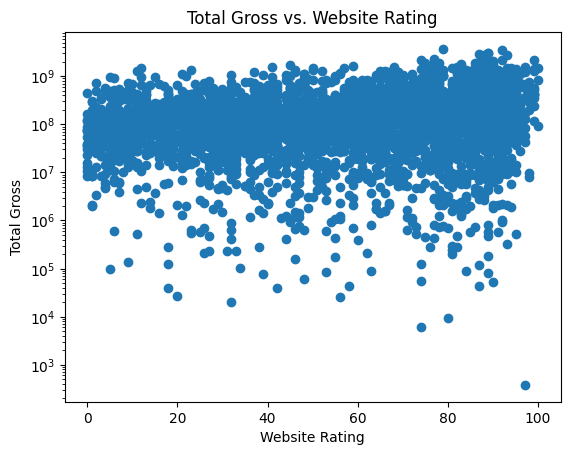

In [56]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(joined_df['Website Rating'], joined_df['Total Gross'])
plt.yscale('log')  
plt.xlabel('Website Rating')
plt.ylabel('Total Gross')
plt.title('Total Gross vs. Website Rating')
plt.show()

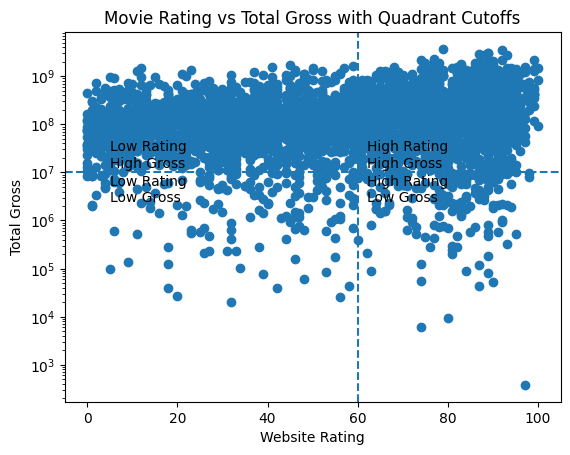

In [70]:
# Define cutoff thresholds
rating_cutoff = 60
gross_cutoff = 10_000_000

# Create scatter plot
plt.figure()
plt.scatter(joined_df['Website Rating'], joined_df['Total Gross'])
plt.axvline(rating_cutoff, linestyle='--')
plt.axhline(gross_cutoff, linestyle='--')

# Label axes and title
plt.xlabel('Website Rating')
plt.yscale('log')  
plt.ylabel('Total Gross')
plt.title('Movie Rating vs Total Gross with Quadrant Cutoffs')

# Annotate quadrants
ax = plt.gca()
# Coordinates chosen relative to data extents
ax.text(5, gross_cutoff * 1.1, 'Low Rating\nHigh Gross', va='bottom')
ax.text(rating_cutoff + 2, gross_cutoff * 1.1, 'High Rating\nHigh Gross', va='bottom')
ax.text(5, gross_cutoff * 0.9, 'Low Rating\nLow Gross', va='top')
ax.text(rating_cutoff + 2, gross_cutoff * 0.9, 'High Rating\nLow Gross', va='top')

plt.show()

In [45]:
#apply cutoff
moviestodrop = joined_df[
    (joined_df['Total Gross']    < 10_000_000) &
    (joined_df['Website Rating'] < 60)
].index

# 2) drop by index
joined_df.drop(index=moviestodrop, inplace=True)

# 3) reset your index if you like
joined_df.reset_index(drop=True, inplace=True)
joined_df.sort_values("Website Rating", ascending=True, inplace=True)
joined_df

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross
3276,"5,061","Jan 22, 2015",4000000,36006065,53401938,The Boy Next Door,https://www.movierankings.net/review/241251,0,89408003
2011,"2,317","Feb 13, 2013",28000000,71399120,94050951,Safe Haven,https://www.movierankings.net/review/112949,0,165450071
2469,"3,320","Oct 3, 2014",16000000,14019924,20769209,Left Behind,https://www.movierankings.net/review/218043,0,34789133
2563,"3,249","Mar 24, 2006",17000000,15680099,15680099,Larry the Cable Guy: Health Inspector,https://www.movierankings.net/review/15639,0,31360198
2764,"3,667","Mar 12, 1999",13000000,27151490,27151490,Baby Geniuses,https://www.movierankings.net/review/22345,0,54302980
...,...,...,...,...,...,...,...,...,...
762,563,"Oct 6, 2006",90000000,132384315,289660619,The Departed,https://www.movierankings.net/review/1422,99,422044934
48,537,"Dec 18, 2002",94000000,345115396,921715176,Lord of the Rings: The Two Towers,https://www.movierankings.net/review/121,99,1266830572
159,"2,671","May 20, 1980",23000000,291738960,549001086,Star Wars: Episode V - The Empire Strikes Back,https://www.movierankings.net/review/1891,100,840740046
2126,"2,489","Sep 19, 1990",25000000,46743809,47103483,Goodfellas,https://www.movierankings.net/review/769,100,93847292


In [36]:
badmovies = joined_df[joined_df['Website Rating'] < 10]
badmovies.sort_values("Total Gross", ascending=False, inplace=True)
badmovies.head(10)

C:\Users\owenp\AppData\Local\Temp\ipykernel_64528\122594780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badmovies.sort_values("Total Gross", ascending=False, inplace=True)


,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
294,36,"May 23, 2017",230000000,172558876,794861794,Pirates of the Caribbean: Dead Men Tell No Tales,https://www.movierankings.net/review/166426,5,967420670,737420670
349,84,"Nov 12, 2009",200000000,166112167,757677748,2012,https://www.movierankings.net/review/14161,6,923789915,723789915
303,45,"Jun 20, 2017",217000000,130168683,602893340,Transformers: The Last Knight,https://www.movierankings.net/review/335988,2,733062023,516062023
464,196,"May 14, 2014",160000000,200676069,529076069,Godzilla,https://www.movierankings.net/review/929,9,729752138,569752138
370,672,"May 7, 1999",80000000,157138535,418138535,The Mummy,https://www.movierankings.net/review/282035,4,575277070,495277070
683,460,"Jul 27, 2001",100000000,180011740,362211740,Planet of the Apes,https://www.movierankings.net/review/869,7,542223480,442223480
466,349,"May 19, 1998",125000000,136314294,376000000,Godzilla,https://www.movierankings.net/review/929,9,512314294,387314294
420,156,"Aug 1, 2008",175000000,102491776,405760225,The Mummy: Tomb of the Dragon Emperor,https://www.movierankings.net/review/1735,6,508252001,333252001
1234,"1,164","Feb 8, 2017",55000000,114434010,381367046,Fifty Shades Darker,https://www.movierankings.net/review/341174,9,495801056,440801056
367,108,"Jun 2, 2017",195000000,80101125,409953905,The Mummy,https://www.movierankings.net/review/282035,4,490055030,295055030


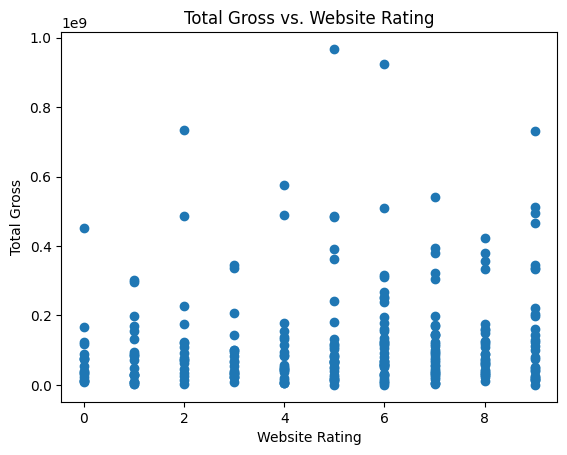

In [123]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(badmovies['Website Rating'], badmovies['Total Gross'])
#plt.yscale('log')  
plt.xlabel('Website Rating')
plt.ylabel('Total Gross')
plt.title('Total Gross vs. Website Rating')
plt.show()

In [38]:
really_bad_movies = badmovies[(badmovies['Total Gross'] < 200000000)]

really_bad_movies

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
3004,"3,978","Oct 26, 2007",10000000,63300095,135759694,Saw IV,https://www.movierankings.net/review/663,9,199059789,189059789
652,425,"Jan 1, 1997",110000000,48097081,150468000,Speed 2: Cruise Control,https://www.movierankings.net/review/1639,1,198565081,88565081
2149,"2,466","Dec 25, 2012",25000000,77267296,120832383,Parental Guidance,https://www.movierankings.net/review/88042,7,198099679,173099679
895,708,"Jun 24, 2005",80000000,63313159,131159306,Bewitched,https://www.movierankings.net/review/9722,6,194472465,114472465
1758,"1,887","Apr 30, 2010",35000000,63075011,117729618,A Nightmare on Elm Street,https://www.movierankings.net/review/23437,5,180804629,145804629
...,...,...,...,...,...,...,...,...,...,...
174,"3,024","Aug 29, 2012",20000000,1065907,1065907,The Oogieloves in the Big Balloon Adventure,https://www.movierankings.net/review/112937,1,2131814,-17868186
2831,"4,145","Oct 19, 2007",10000000,952820,1051907,The Ten Commandments,https://www.movierankings.net/review/22331,1,2004727,-7995273
3551,"5,593","Jul 26, 1996",2000000,304602,304602,Stonewall,https://www.movierankings.net/review/273899,6,609204,-1390796
2129,"2,440","Mar 17, 2015",26000000,0,135436,Accidental Love,https://www.movierankings.net/review/316002,9,135436,-25864564


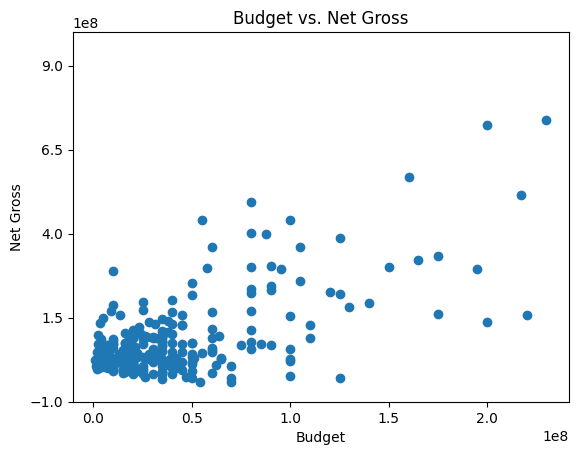

In [151]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.scatter(badmovies['Budget'], badmovies['Net Gross'])  # must be a column with negatives
ax.set_yscale('linear')                                         # no log scale
ax.set_ylim(-1_00_000_000, 1_000_000_000)
ax.set_yticks(np.arange(-100e6, 1.01e9, 250e6))
ax.set_xlabel('Budget')
ax.set_ylabel('Net Gross')
ax.set_title('Budget vs. Net Gross')
plt.show()

In [153]:
badmovies.sort_values("Budget", ascending=False, inplace=True)
badmovies

C:\Users\owenp\AppData\Local\Temp\ipykernel_32716\1669169807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badmovies.sort_values("Budget", ascending=False, inplace=True)


,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
294,36,"May 23, 2017",230000000,172558876,794861794,Pirates of the Caribbean: Dead Men Tell No Tales,https://www.movierankings.net/review/166426,5,967420670,737420670
302,44,"Apr 11, 2012",220000000,65233400,313477717,Battleship,https://www.movierankings.net/review/44833,7,378711117,158711117
303,45,"Jun 20, 2017",217000000,130168683,602893340,Transformers: The Last Knight,https://www.movierankings.net/review/335988,2,733062023,516062023
349,84,"Nov 12, 2009",200000000,166112167,757677748,2012,https://www.movierankings.net/review/14161,6,923789915,723789915
354,92,"Jun 17, 2011",200000000,116601172,219535492,Green Lantern,https://www.movierankings.net/review/44912,9,336136664,136136664
...,...,...,...,...,...,...,...,...,...,...
3553,"5,606","Jun 26, 2015",2000000,36336,6328516,Knock Knock,https://www.movierankings.net/review/263472,7,6364852,4364852
3551,"5,593","Jul 26, 1996",2000000,304602,304602,Stonewall,https://www.movierankings.net/review/273899,6,609204,-1390796
1760,"5,670","Nov 9, 1984",1800000,25504513,25542906,A Nightmare on Elm Street,https://www.movierankings.net/review/23437,5,51047419,49247419
890,"5,835","Sep 18, 1951",1200000,3700000,3700000,The Day the Earth Stood Still,https://www.movierankings.net/review/10200,6,7400000,6200000


In [40]:
badmovieslowbudget = badmovies[(badmovies['Budget'] < 50000000) & (badmovies['Net Gross'] < 150000000)].index
joined_df.drop(index = badmovieslowbudget, inplace = True)
joined_df

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
363,105,"Jul 13, 2022",200000000,0,451178,The Gray Man,https://www.movierankings.net/review/725201,75,451178,-199548822
362,104,"Jul 2, 2021",200000000,0,19220000,The Tomorrow War,https://www.movierankings.net/review/588228,70,19220000,-180780000
426,162,"Mar 10, 2022",175000000,1399001,12271142,Turning Red,https://www.movierankings.net/review/508947,83,13670143,-161329857
472,203,"Nov 1, 2019",159000000,0,914706,The Irishman,https://www.movierankings.net/review/398978,92,914706,-158085294
520,261,"Nov 4, 2021",150000000,0,173638,Red Notice,https://www.movierankings.net/review/512195,55,173638,-149826362
...,...,...,...,...,...,...,...,...,...,...
325,56,"Dec 14, 2021",200000000,814811535,1908532719,Spider-Man: No Way Home,https://www.movierankings.net/review/634649,88,2723344254,2523344254
269,2,"Dec 9, 2022",460000000,684075767,2317514386,Avatar: The Way of Water,https://www.movierankings.net/review/76600,89,3001590153,2541590153
327,58,"Dec 18, 1997",200000000,674460013,2223048786,Titanic,https://www.movierankings.net/review/597,87,2897508799,2697508799
270,4,"Apr 23, 2019",400000000,858373000,2748242781,Avengers: Endgame,https://www.movierankings.net/review/299534,92,3606615781,3206615781


In [97]:
badmovies2 = joined_df[joined_df['Website Rating'] < 20]
badmovies2 = 
badmovies2

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross
2888,"3,925","Feb 1, 2002",11000000,4814244,5942218,Slackers,https://www.movierankings.net/review/20009,12,10756462
2701,"3,502","Aug 21, 2009",15000000,6382178,6563402,Post Grad,https://www.movierankings.net/review/25704,11,12945580
3388,"5,561","Aug 26, 2015",2000000,3591417,10153415,We Are Your Friends,https://www.movierankings.net/review/301351,19,13744832
3235,"4,895","Dec 2, 2016",5000000,4799774,9371036,Incarnate,https://www.movierankings.net/review/241258,13,14170810
2461,"3,088","Mar 4, 2011",19000000,6928068,7576604,Take Me Home Tonight,https://www.movierankings.net/review/50725,16,14504672
...,...,...,...,...,...,...,...,...,...
27,330,"Nov 18, 2011",127500000,281287133,684436752,The Twilight Saga: Breaking Dawn Part 1,https://www.movierankings.net/review/50619,12,965723885
283,36,"May 23, 2017",230000000,172558876,794861794,Pirates of the Caribbean: Dead Men Tell No Tales,https://www.movierankings.net/review/166426,5,967420670
1277,"1,259","Nov 19, 2009",50000000,296623634,687557727,The Twilight Saga: New Moon,https://www.movierankings.net/review/18239,15,984181361
260,5,"May 20, 2011",379000000,241071802,1045713802,Pirates of the Caribbean: On Stranger Tides,https://www.movierankings.net/review/1865,11,1286785604


In [42]:
delete = joined_df[joined_df['Website Rating'] < 40]
delete

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
736,512,"Dec 9, 2020",100000000,0,75615,The Midnight Sky,https://www.movierankings.net/review/614911,39,75615,-99924385
518,259,"Mar 11, 2011",150000000,21392758,39549758,Mars Needs Moms,https://www.movierankings.net/review/50321,23,60942516,-89057484
77,814,"Jun 24, 2022",75000000,0,470000,The Man from Toronto,https://www.movierankings.net/review/667739,27,470000,-74530000
519,260,"Feb 3, 2022",150000000,19060660,59053195,Moonfall,https://www.movierankings.net/review/406759,33,78113855,-71886145
734,508,"Feb 3, 2021",100000000,13287908,27072169,Chaos Walking,https://www.movierankings.net/review/412656,25,40360077,-59639923
...,...,...,...,...,...,...,...,...,...,...
23,295,"Nov 14, 2012",136200000,292324737,829724737,The Twilight Saga: Breaking Dawn Part 2,https://www.movierankings.net/review/50620,21,1122049474,985849474
775,555,"Jul 1, 2009",90000000,196573705,886686817,Ice Age: Dawn of the Dinosaurs,https://www.movierankings.net/review/8355,39,1083260522,993260522
306,48,"Jun 24, 2009",210000000,402111870,836519699,Transformers: Revenge of the Fallen,https://www.movierankings.net/review/8373,37,1238631569,1028631569
307,49,"Jun 25, 2014",210000000,245439076,1104054072,Transformers: Age of Extinction,https://www.movierankings.net/review/91314,23,1349493148,1139493148


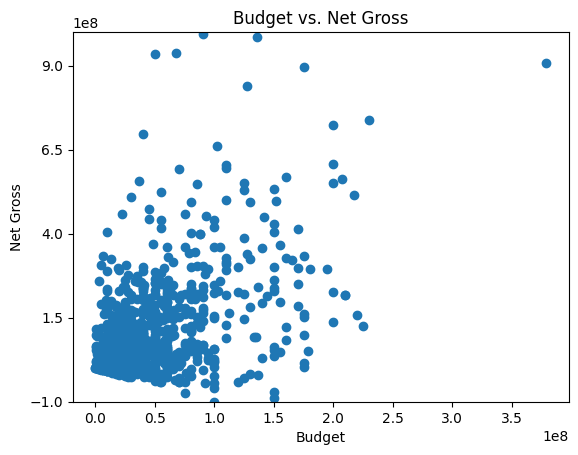

In [161]:
fig, ax = plt.subplots()
ax.scatter(delete['Budget'], delete['Net Gross'])  # must be a column with negatives
ax.set_yscale('linear')                                         # no log scale
ax.set_ylim(-1_00_000_000, 1_000_000_000)
ax.set_yticks(np.arange(-100e6, 1.01e9, 250e6))
ax.set_xlabel('Budget')
ax.set_ylabel('Net Gross')
ax.set_title('Budget vs. Net Gross')
plt.show()

### continue removing poorly rated movies that weren't commercial successes or failures

In [44]:
deletelowbudget = delete[(delete['Budget'] < 50000000) & (delete['Net Gross'] < 150000000)].index
deletelowbudget

Index([2025, 1501, 2101, 1541, 2238, 1497, 2044, 2027, 1498, 2235,
       ...
       2305, 2154,  189, 2611, 2161,  178, 1931, 2056, 2158, 2164],
      dtype='int64', length=491)

In [46]:
joined_df.drop(index = deletelowbudget, inplace = True)

In [48]:
joined_df

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
363,105,"Jul 13, 2022",200000000,0,451178,The Gray Man,https://www.movierankings.net/review/725201,75,451178,-199548822
362,104,"Jul 2, 2021",200000000,0,19220000,The Tomorrow War,https://www.movierankings.net/review/588228,70,19220000,-180780000
426,162,"Mar 10, 2022",175000000,1399001,12271142,Turning Red,https://www.movierankings.net/review/508947,83,13670143,-161329857
472,203,"Nov 1, 2019",159000000,0,914706,The Irishman,https://www.movierankings.net/review/398978,92,914706,-158085294
520,261,"Nov 4, 2021",150000000,0,173638,Red Notice,https://www.movierankings.net/review/512195,55,173638,-149826362
...,...,...,...,...,...,...,...,...,...,...
325,56,"Dec 14, 2021",200000000,814811535,1908532719,Spider-Man: No Way Home,https://www.movierankings.net/review/634649,88,2723344254,2523344254
269,2,"Dec 9, 2022",460000000,684075767,2317514386,Avatar: The Way of Water,https://www.movierankings.net/review/76600,89,3001590153,2541590153
327,58,"Dec 18, 1997",200000000,674460013,2223048786,Titanic,https://www.movierankings.net/review/597,87,2897508799,2697508799
270,4,"Apr 23, 2019",400000000,858373000,2748242781,Avengers: Endgame,https://www.movierankings.net/review/299534,92,3606615781,3206615781


In [50]:
#look for highly rated movies with low gross, these movies may have innacurate data. For instance, the irishman was released on netflix so it might not have accurate info
outliers = joined_df[(joined_df['Net Gross'] < 0) & (joined_df['Total Gross'] < 2000000) & (joined_df['Domestic Gross'] == 0)].index

outliers

Index([ 363,  472,  520,  736,   77, 1509, 1841, 1840, 1839, 2026, 2593, 2676,
       2792, 2952, 3106, 3105, 3202, 3313, 3409, 3438, 3382, 2016, 3504, 3555,
       3651, 3653],
      dtype='int64')

In [52]:
joined_df.drop(index = outliers, inplace = True)
joined_df

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
362,104,"Jul 2, 2021",200000000,0,19220000,The Tomorrow War,https://www.movierankings.net/review/588228,70,19220000,-180780000
426,162,"Mar 10, 2022",175000000,1399001,12271142,Turning Red,https://www.movierankings.net/review/508947,83,13670143,-161329857
359,103,"Sep 4, 2020",200000000,0,69973540,Mulan,https://www.movierankings.net/review/337401,70,69973540,-130026460
358,103,"Sep 4, 2020",200000000,0,69973540,Mulan,https://www.movierankings.net/review/10674,93,69973540,-130026460
518,259,"Mar 11, 2011",150000000,21392758,39549758,Mars Needs Moms,https://www.movierankings.net/review/50321,23,60942516,-89057484
...,...,...,...,...,...,...,...,...,...,...
325,56,"Dec 14, 2021",200000000,814811535,1908532719,Spider-Man: No Way Home,https://www.movierankings.net/review/634649,88,2723344254,2523344254
269,2,"Dec 9, 2022",460000000,684075767,2317514386,Avatar: The Way of Water,https://www.movierankings.net/review/76600,89,3001590153,2541590153
327,58,"Dec 18, 1997",200000000,674460013,2223048786,Titanic,https://www.movierankings.net/review/597,87,2897508799,2697508799
270,4,"Apr 23, 2019",400000000,858373000,2748242781,Avengers: Endgame,https://www.movierankings.net/review/299534,92,3606615781,3206615781


In [54]:
joined_df.to_csv('PreScrapedData.csv', encoding = 'utf-8', index = False)

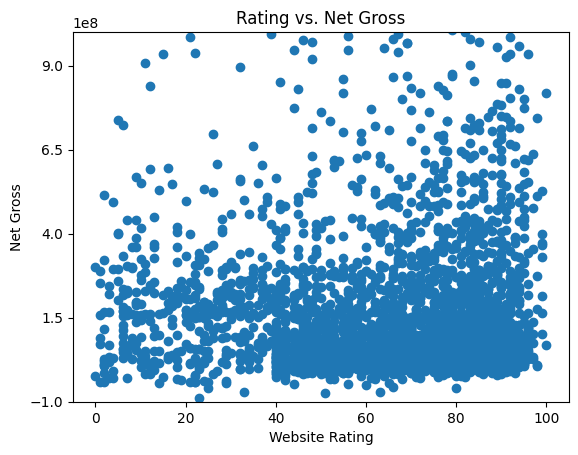

In [206]:
fig, ax = plt.subplots()
ax.scatter(joined_df['Website Rating'], joined_df['Net Gross'])  # must be a column with negatives
ax.set_yscale('linear')                                         # no log scale
ax.set_ylim(-1_00_000_000, 1_000_000_000)
ax.set_yticks(np.arange(-100e6, 1.01e9, 250e6))
ax.set_xlabel('Website Rating')
ax.set_ylabel('Net Gross')
ax.set_title('Rating vs. Net Gross')
plt.show()

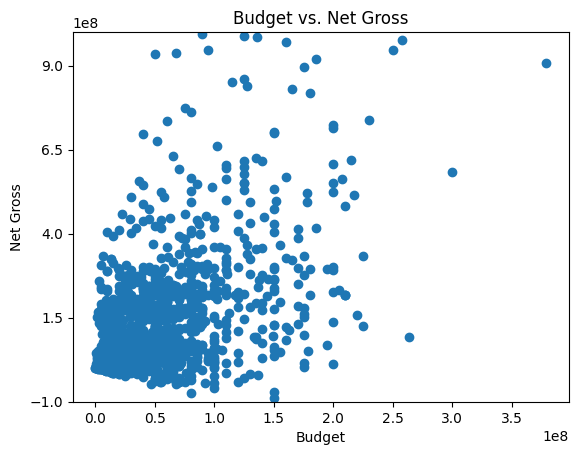

In [208]:
delete2 = joined_df[joined_df['Website Rating'] < 60]
fig, ax = plt.subplots()
ax.scatter(delete2['Budget'], delete2['Net Gross'])  # must be a column with negatives
ax.set_yscale('linear')                                         # no log scale
ax.set_ylim(-1_00_000_000, 1_000_000_000)
ax.set_yticks(np.arange(-100e6, 1.01e9, 250e6))
ax.set_xlabel('Budget')
ax.set_ylabel('Net Gross')
ax.set_title('Budget vs. Net Gross')
plt.show()

In [18]:
#Create empty lists for values to scrape

#Title = []
director = []
starring = []
awards = []

year_released = []
decade_released = []
runtime = []
box_office =[]
genre = []
sub_genre = []
studio =[]

rotten_tomato =[]
IMDb = []
metacritic = []

#This for loop iterates through every movie link in the list, appending values to lists to create a datafrane
#Currently displayed as testdf for quicker scraping. change to moviedf to iterate through all pages (takes ~10 minutes)
for link in joindf['Link']:
    if link:
        try:
            #add random sleep to ensure we don't look like a bot
            browser.get(link)
            time.sleep(random.randint(1, 3))  

#Title list- split the string by the " (", keeping only the movie title and removing the year
    #ex: Jaws (1975) -> Jaws
            #full_title = browser.title.strip()
            #clean_title = full_title.split(" (")[0]  # Keeps everything before the "("
            #Title.append(clean_title)

#Director and Starring have the same class element. Since director shows first, it is element [0] in the people_info list
            people_info = browser.find_elements(By.CLASS_NAME, "review-people")
            director.append(people_info[0].text)
            starring.append(people_info[1].text)

            
#Award list- This part is complicated, since awards can be split into Oscars and Golden Globes while having the same title. 
    # Some awards are ties to the actor who won, so we also need to remove that part to turn award type into a category
    # current state: Best Picture (nominated), Best director: Martin Scorcese (nominated), Best Picture (nominated)
    # goal: Oscar Best Picture (nominated), Oscar Best director (nominated), Golden Globes Best Picture (nominated)
                
            # Get all award group names (e.g., "Oscars", "Golden Globes")
            award_categories = browser.find_elements(By.CSS_SELECTOR, "#review-awards .review-people")
            
            # Get all associated <ul class="awards-list"> elements that follow each group name
            award_lists = browser.find_elements(By.CSS_SELECTOR, "#review-awards ul.awards-list")
            
            full_award_text = []
            
            for category, award_list in zip(award_categories, award_lists):
                category_name = category.text.strip().rstrip(":")
                awards_in_category = award_list.find_elements(By.CLASS_NAME, "award")

                #Clean the text of each award
                for award in awards_in_category:
                    text = award.text.strip()
                    if not text:
                        continue
            
                    # Detect result
                    if "(Winner)" in text:
                        status = "winner"
                    elif "(Nominated)" in text or "(Nomination)" in text:
                        status = "nominated"
                    else:
                        status = "unknown"
            
                    # Clean out result text from original string
                    clean_text = re.sub(r"\(Winner\)|\(Nominated\)|\(Nomination\)", "", text).strip()
            
                    # Split on colon if there's a name (e.g., "Best Supporting Actor: Joe Pesci")
                    if ":" in clean_text:
                        award_name = clean_text.split(":", 1)[0].strip()
                    else:
                        award_name = clean_text
                    
                    formatted_award = f"{category_name} {award_name} ({status})"
                    full_award_text.append(formatted_award)
            
            # Join all awards into one string, or assign "N/A" if none found
            awards.append(", ".join(full_award_text) if full_award_text else "N/A")
 #Changes award formatting from:
        #before: Best Picture (nominated), Best director: Martin Scorcese (nominated), Best Picture (nominated)
        #after: Oscar Best Picture (nominated), Oscar Best director (nominated), Golden Globes Best Picture (nominated)
#this reformatting allows us to properly categorize awards across all movies consistently. 
#we are also considering adding the awards to each actor/director in a seperate Actors/ditrector dataframe, which will show 
#how an given actor/director previous awards influence future movie success


#there is a table on the web page that houses information about the movie. This block of code converts all the data to the same format, appending 
#the results into lists
            table = browser.find_element(By.ID, "review-info")
            rows = table.find_elements(By.TAG_NAME, "tr")
            # Create a dictionary to temporarily store the values
            row_data = {}
            for row in rows:
                cols = row.find_elements(By.TAG_NAME, "td")
                if len(cols) >= 2:
                    label = cols[0].text.strip().replace(":", "").lower()  # e.g., "buttered status"
                    value = cols[1].text.strip()
                    row_data[label] = value
            
            # Now append each specific value to its list
            year_released.append(row_data.get("year released", "Not Found"))
            decade_released.append(row_data.get("decade released", "Not Found"))
            runtime.append(row_data.get("runtime", "Not Found"))
            box_office.append(row_data.get("box office", "Not Found"))

            
#Creating a list for multivalued attributes: 
#Studio, Genre, and Subgenre are all multivalued and follow the same format to properly format them into coma seperated attributes
            studio_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Studio/Company:']]//button")
            studio_list = [btn.text.strip() for btn in studio_elements if btn.text.strip()]
            # Join into one string separated by commas
            studio1 = ", ".join(studio_list) if studio_list else "N/A"
            # Append to your list
            studio.append(studio1)

            genre_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Genre:']]//button")
            genre_list = [btn.text.strip() for btn in genre_elements if btn.text.strip()]
            # Join into one string separated by commas
            genre1 = ", ".join(genre_list) if genre_list else "N/A"
            # Append to your list
            genre.append(genre1)
            
            #subgenre.append(row_data.get("sub-genre", "Not Found"))
            subgenre_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Sub-Genre:']]//button")
            # Extract text from each button
            subgenre_list = [btn.text.strip() for btn in subgenre_elements if btn.text.strip()]
            # Join into one string separated by commas
            subgenre = ", ".join(subgenre_list) if subgenre_list else "N/A"
            # Append to your list
            sub_genre.append(subgenre)
            

            
#IMDb, Rotten tomatoes, and metacritic scores have the same HTML formatting as director and starring; they are identified by the same class and ID
#So, we properly assign the values in the score_elements list to each respective score category
            scores_container = browser.find_element(By.ID, "review-other-scores")
            
            # Step 2: Extract all <p> tags with class "title-font" inside that container
            score_elements = scores_container.find_elements(By.TAG_NAME, "p")         
            
            rotten_tomato.append(score_elements[0].text)
            IMDb.append(score_elements[1].text)
            metacritic.append(score_elements[2].text)
            
       #this part was mainly a check for when we were first scraping 
        except Exception as e:
            print(f"Error scraping {link}: {e}")
            # Append "Not Found" to keep list lengths aligned
            #Title.append(np.nan)
            year_released.append(np.nan)
            decade_released.append(np.nan)
            runtime.append(np.nan)
            box_office.append(np.nan)
            genre.append(np.nan)
            rotten_tomato.append(np.nan)
            IMDb.append(np.nan)
            metacritic.append(np.nan)
            director.append(np.nan)
            awards.append(np.nan)
            
    #if there is no link, stop        
    else:
        Title.append("No Link")
        
#browser.close()

#append all the lists into a dataframe
moviedf2 = pd.DataFrame({
    #"Title": Title,
    "Year Released": year_released,
    "Decade Released": decade_released,
    "Runtime (minutes)": runtime,
    "Box Office": box_office,
    "Genre": genre,
    "Sub-Genre": sub_genre,
    "Studio": studio,
    "Rotten Tomatoes (out of 100)": rotten_tomato,
    "IMDb (out of 100)": IMDb,
    "Metacritic (out of 100)": metacritic,
    "Director": director,
    "Awards": awards,
    "Starring" : starring
})

display(moviedf2)

Error scraping https://www.movierankings.net/review/17927: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=135.0.7049.85)
Stacktrace:
	GetHandleVerifier [0x00007FF72D24EFA5+77893]
	GetHandleVerifier [0x00007FF72D24F000+77984]
	(No symbol) [0x00007FF72D0191BA]
	(No symbol) [0x00007FF72D004F15]
	(No symbol) [0x00007FF72D029F04]
	(No symbol) [0x00007FF72D09EACF]
	(No symbol) [0x00007FF72D0BE972]
	(No symbol) [0x00007FF72D096F03]
	(No symbol) [0x00007FF72D060328]
	(No symbol) [0x00007FF72D061093]
	GetHandleVerifier [0x00007FF72D507B6D+2931725]
	GetHandleVerifier [0x00007FF72D502132+2908626]
	GetHandleVerifier [0x00007FF72D5200F3+3031443]
	GetHandleVerifier [0x00007FF72D2691EA+184970]
	GetHandleVerifier [0x00007FF72D27086F+215311]
	GetHandleVerifier [0x00007FF72D256EC4+110436]
	GetHandleVerifier [0x00007FF72D257072+110866]
	GetHandleVerifier [0x00007FF72D23D479+5401]
	BaseThreadInitThu

NameError: name 'np' is not defined

In [29]:
joined_df.sort_values("Website Rating", ascending=False, inplace=True)
testdf = joined_df.head()
testdf

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
2169,"2,489","Sep 19, 1990",25000000,46743809,47103483,Goodfellas,https://www.movierankings.net/review/769,100,93847292,68847292
47,535,"Dec 17, 2003",94000000,381472917,1123837908,Lord of the Rings: The Return of the King,https://www.movierankings.net/review/122,100,1505310825,1411310825
161,"2,671","May 20, 1980",23000000,291738960,549001086,Star Wars: Episode V - The Empire Strikes Back,https://www.movierankings.net/review/1891,100,840740046,817740046
387,126,"Sep 29, 2017",185000000,92054159,258157449,Blade Runner 2049,https://www.movierankings.net/review/335984,99,350211608,165211608
779,563,"Oct 6, 2006",90000000,132384315,289660619,The Departed,https://www.movierankings.net/review/1422,99,422044934,332044934


In [43]:
browser = webdriver.Chrome()
url = 'https://www.movierankings.net/'
browser.get(url)
browser.maximize_window()

In [61]:
#Create empty lists for values to scrape

Title = []
director = []
starring = []
awards = []

year_released = []
decade_released = []
runtime = []
box_office =[]
genre = []
sub_genre = []
studio =[]

rotten_tomato =[]
IMDb = []
metacritic = []

#This for loop iterates through every movie link in the list, appending values to lists to create a datafrane
#Currently displayed as testdf for quicker scraping. change to moviedf to iterate through all pages (takes ~10 minutes)
for link in testdf['Link']:
    if link:
        try:
            #add random sleep to ensure we don't look like a bot
            browser.get(link)
            time.sleep(random.randint(1, 3))  

#Title list- split the string by the " (", keeping only the movie title and removing the year
    #ex: Jaws (1975) -> Jaws
            full_title = browser.title.strip()
            clean_title = full_title.split(" (")[0]  # Keeps everything before the "("
            movie_title = clean_title
            Title.append(clean_title)

#Director and Starring have the same class element. Since director shows first, it is element [0] in the people_info list
            people_info = browser.find_elements(By.CLASS_NAME, "review-people")
            director.append(people_info[0].text)
            starring.append(people_info[1].text)

            
#Award list- This part is complicated, since awards can be split into Oscars and Golden Globes while having the same title. 
    # Some awards are ties to the actor who won, so we also need to remove that part to turn award type into a category
    # current state: Best Picture (nominated), Best director: Martin Scorcese (nominated), Best Picture (nominated)
    # goal: Oscar Best Picture (nominated), Oscar Best director (nominated), Golden Globes Best Picture (nominated)

            award_rows = []

            # 1) grab the ceremony names (“Oscars”, “Golden Globes”, etc.)
            ceremonies  = browser.find_elements(By.CSS_SELECTOR, "#review-awards p.review-people")
            award_lists = browser.find_elements(By.CSS_SELECTOR, "#review-awards ul.awards-list")
            
            for ceremony, ul in zip(ceremonies, award_lists):
                ceremony_name = ceremony.text.strip()
            
                # 2) for each <li class="award">
                for li in ul.find_elements(By.CSS_SELECTOR, "li.award"):
                    raw = li.text.strip()
                    if not raw:
                        continue
            
                    # 3) pull out status
                    if   "(Winner)"    in raw: status = "winner"
                    elif "(Nominated)" in raw or "(Nomination)" in raw: status = "nominated"
                    else:                status = "unknown"
            
                    # 4) strip off the “(Winner)” or “(Nominated)”
                    clean = re.sub(r"\s*\((Winner|Nominated|Nomination)\)\s*$", "", raw).strip()
            
                    # 5) split award vs. person on the first colon, if any
                    if ":" in clean:
                        award_title, person = [p.strip() for p in clean.split(":",1)]
                    else:
                        award_title, person = clean, None
            
                    award_rows.append({
                        "movie_title": movie_title,
                        "ceremony": ceremony_name,
                        "award":    award_title,
                        "person":   person,
                        "status":   status
                    })
                    
   
 #Changes award formatting from:
        #before: Best Picture (nominated), Best director: Martin Scorcese (nominated), Best Picture (nominated)
        #after: Oscar Best Picture (nominated), Oscar Best director (nominated), Golden Globes Best Picture (nominated)
#this reformatting allows us to properly categorize awards across all movies consistently. 
#we are also considering adding the awards to each actor/director in a seperate Actors/ditrector dataframe, which will show 
#how an given actor/director previous awards influence future movie success


#there is a table on the web page that houses information about the movie. This block of code converts all the data to the same format, appending 
#the results into lists
            table = browser.find_element(By.ID, "review-info")
            rows = table.find_elements(By.TAG_NAME, "tr")
            # Create a dictionary to temporarily store the values
            row_data = {}
            for row in rows:
                cols = row.find_elements(By.TAG_NAME, "td")
                if len(cols) >= 2:
                    label = cols[0].text.strip().replace(":", "").lower()  # e.g., "buttered status"
                    value = cols[1].text.strip()
                    row_data[label] = value
            
            # Now append each specific value to its list
            year_released.append(row_data.get("year released", "Not Found"))
            decade_released.append(row_data.get("decade released", "Not Found"))
            runtime.append(row_data.get("runtime", "Not Found"))
            box_office.append(row_data.get("box office", "Not Found"))

            
#Creating a list for multivalued attributes: 
#Studio, Genre, and Subgenre are all multivalued and follow the same format to properly format them into coma seperated attributes
            studio_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Studio/Company:']]//button")
            studio_list = [btn.text.strip() for btn in studio_elements if btn.text.strip()]
            # Join into one string separated by commas
            studio1 = ", ".join(studio_list) if studio_list else "N/A"
            # Append to your list
            studio.append(studio1)

            genre_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Genre:']]//button")
            genre_list = [btn.text.strip() for btn in genre_elements if btn.text.strip()]
            # Join into one string separated by commas
            genre1 = ", ".join(genre_list) if genre_list else "N/A"
            # Append to your list
            genre.append(genre1)
            
            #subgenre.append(row_data.get("sub-genre", "Not Found"))
            subgenre_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Sub-Genre:']]//button")
            # Extract text from each button
            subgenre_list = [btn.text.strip() for btn in subgenre_elements if btn.text.strip()]
            # Join into one string separated by commas
            subgenre = ", ".join(subgenre_list) if subgenre_list else "N/A"
            # Append to your list
            sub_genre.append(subgenre)
            

            
#IMDb, Rotten tomatoes, and metacritic scores have the same HTML formatting as director and starring; they are identified by the same class and ID
#So, we properly assign the values in the score_elements list to each respective score category
            scores_container = browser.find_element(By.ID, "review-other-scores")
            
            # Step 2: Extract all <p> tags with class "title-font" inside that container
            score_elements = scores_container.find_elements(By.TAG_NAME, "p")         
            
            rotten_tomato.append(score_elements[0].text)
            IMDb.append(score_elements[1].text)
            metacritic.append(score_elements[2].text)
            
       #this part was mainly a check for when we were first scraping 
        except Exception as e:
            print(f"Error scraping {link}: {e}")
            # Append "Not Found" to keep list lengths aligned
            #Title.append(np.nan)
            year_released.append(np.nan)
            decade_released.append(np.nan)
            runtime.append(np.nan)
            box_office.append(np.nan)
            genre.append(np.nan)
            rotten_tomato.append(np.nan)
            IMDb.append(np.nan)
            metacritic.append(np.nan)
            director.append(np.nan)
            awards.append(np.nan)
            
    #if there is no link, stop        
    else:
        Title.append("No Link")
        
#browser.close()
awards_df = pd.DataFrame(award_rows)

#append all the lists into a dataframe
moviedf2 = pd.DataFrame({
    "Title": Title,
    "Year Released": year_released,
    "Decade Released": decade_released,
    "Runtime (minutes)": runtime,
    "Box Office": box_office,
    "Genre": genre,
    "Sub-Genre": sub_genre,
    "Studio": studio,
    "Rotten Tomatoes (out of 100)": rotten_tomato,
    "IMDb (out of 100)": IMDb,
    "Metacritic (out of 100)": metacritic,
    "Director": director,
    "Starring" : starring
})

display(moviedf2)

,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
0,Goodfellas,1990,1990-1999,145 minutes,"$46,836,394",Drama,Gangster & Mob/Mafia,Warner Bros,96%,8.7/10,90/100,Martin Scorsese,"Ray Liotta, Robert De Niro, Joe Pesci, Lorrain..."
1,Lord of the Rings: The Return of the King,2003,2000-2009,201 minutes,"$1,118,888,979",Fantasy,"Witches & Wizards, Sequel",Warner Bros,93%,8.9/10,94/100,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Se..."
2,Star Wars: Episode V - The Empire Strikes Back,1980,1980-1989,124 minutes,"$538,400,000",Sci-Fi,"Space, Sequel",Lucasfilm,94%,8.7/10,82/100,Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil..."
3,Blade Runner 2049,2017,2010-2019,164 minutes,"$259,239,658","Sci-Fi, Thriller","Dystopian, Sci-Fi Thriller, Sequel",Warner Bros,88%,8.0/10,81/100,Denis Villeneuve,"Harrison Ford, Ana de Armas, Robin Wright, Rya..."
4,The Departed,2006,2000-2009,151 minutes,"$291,465,034","Crime, Thriller","Police & Detectives, Crime Thriller",Warner Bros,91%,8.5/10,85/100,Martin Scorsese,"Jack Nicholson, Leonardo DiCaprio, Matt Damon,..."


In [63]:
awards_df

,movie_title,ceremony,award,person,status
0,The Departed,Oscars,Best Picture,None,winner
1,The Departed,Oscars,Best Director,Martin Scorsese,winner
2,The Departed,Oscars,Best Supporting Actor,Mark Wahlberg,nominated
3,The Departed,Golden Globes,Best Picture,Drama,nominated


# Checkpoint- Import all merged code

In [5]:
moviedf2.to_csv("All-Scraped-Data.csv", encoding = 'utf-8', index = False)

NameError: name 'moviedf2' is not defined

In [ ]:
awards_df.to_csv("ActorAwards.csv", encoding = 'utf-8', index = False)

In [5]:
links = pd.read_csv('PreScrapedData.csv', encoding = 'utf-8')
links

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
0,104,"Jul 2, 2021",200000000,0,19220000,The Tomorrow War,https://www.movierankings.net/review/588228,70,19220000,-180780000
1,162,"Mar 10, 2022",175000000,1399001,12271142,Turning Red,https://www.movierankings.net/review/508947,83,13670143,-161329857
2,103,"Sep 4, 2020",200000000,0,69973540,Mulan,https://www.movierankings.net/review/337401,70,69973540,-130026460
3,103,"Sep 4, 2020",200000000,0,69973540,Mulan,https://www.movierankings.net/review/10674,93,69973540,-130026460
4,259,"Mar 11, 2011",150000000,21392758,39549758,Mars Needs Moms,https://www.movierankings.net/review/50321,23,60942516,-89057484
...,...,...,...,...,...,...,...,...,...,...
2919,56,"Dec 14, 2021",200000000,814811535,1908532719,Spider-Man: No Way Home,https://www.movierankings.net/review/634649,88,2723344254,2523344254
2920,2,"Dec 9, 2022",460000000,684075767,2317514386,Avatar: The Way of Water,https://www.movierankings.net/review/76600,89,3001590153,2541590153
2921,58,"Dec 18, 1997",200000000,674460013,2223048786,Titanic,https://www.movierankings.net/review/597,87,2897508799,2697508799
2922,4,"Apr 23, 2019",400000000,858373000,2748242781,Avengers: Endgame,https://www.movierankings.net/review/299534,92,3606615781,3206615781


In [7]:
movies = pd.read_csv('All-Scraped-Data.csv', encoding = 'utf-8')
movies

,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
0,Goodfellas,1990,1990-1999,145 minutes,"$46,836,394",Drama,Gangster & Mob/Mafia,Warner Bros,96%,8.7/10,90/100,Martin Scorsese,"Ray Liotta, Robert De Niro, Joe Pesci, Lorrain..."
1,Lord of the Rings: The Return of the King,2003,2000-2009,201 minutes,"$1,118,888,979",Fantasy,"Witches & Wizards, Sequel",Warner Bros,93%,8.9/10,94/100,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Se..."
2,Star Wars: Episode V - The Empire Strikes Back,1980,1980-1989,124 minutes,"$538,400,000",Sci-Fi,"Space, Sequel",Lucasfilm,94%,8.7/10,82/100,Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil..."
3,Blade Runner 2049,2017,2010-2019,164 minutes,"$259,239,658","Sci-Fi, Thriller","Dystopian, Sci-Fi Thriller, Sequel",Warner Bros,88%,8.0/10,81/100,Denis Villeneuve,"Harrison Ford, Ana de Armas, Robin Wright, Rya..."
4,The Departed,2006,2000-2009,151 minutes,"$291,465,034","Crime, Thriller","Police & Detectives, Crime Thriller",Warner Bros,91%,8.5/10,85/100,Martin Scorsese,"Jack Nicholson, Leonardo DiCaprio, Matt Damon,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,Ballistic: Ecks vs. Sever,2002,2000-2009,91 minutes,"$19,924,033","Sci-Fi, Thriller",Sci-Fi Thriller,Warner Bros,0%,3.7/10,19/100,Wych Kaosayananda,"Antonio Banderas, Lucy Liu, Gregg Henry, Ray P..."
2920,Cats and Dogs: Revenge of Kitty Galore,2010,2010-2019,82 minutes,"$112,483,764",Comedy,"Kids & Family, Sequel",Warner Bros,13%,4.3/10,30/100,Brad Peyton,"James Marsden, Nick Nolte, Christina Applegate..."
2921,The Grudge,2020,2020-2029,93 minutes,"$42,800,000",Horror,"Haunted & Paranormal/Supernatural, Remake",Sony Pictures,20%,4.2/10,41/100,Nicolas Pesce,"Andrea Riseborough, Demián Bichir, John Cho, L..."
2922,The Last Airbender,2010,2010-2019,103 minutes,"$318,502,923",Adventure,Young Adult,Paramount Pictures,5%,4.1/10,20/100,M. Night Shyamalan,"Noah Ringer, Nicola Peltz, Jackson Rathbone, D..."


In [9]:
links.sort_values("Website Rating", ascending=False, inplace=True)
testdf = links.head()
testdf

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross
2793,"2,671","May 20, 1980",23000000,291738960,549001086,Star Wars: Episode V - The Empire Strikes Back,https://www.movierankings.net/review/1891,100,840740046,817740046
2898,535,"Dec 17, 2003",94000000,381472917,1123837908,Lord of the Rings: The Return of the King,https://www.movierankings.net/review/122,100,1505310825,1411310825
1176,"2,489","Sep 19, 1990",25000000,46743809,47103483,Goodfellas,https://www.movierankings.net/review/769,100,93847292,68847292
2914,19,"Jul 11, 2019",260000000,543638043,1646106779,The Lion King,https://www.movierankings.net/review/8587,99,2189744822,1929744822
2892,742,"Jun 15, 1994",79300000,423981226,988389726,The Lion King,https://www.movierankings.net/review/8587,99,1412370952,1333070952


### Scrape all the movies with awards

### Code below works

In [9]:
browser = webdriver.Chrome()
url = 'https://www.movierankings.net/'
browser.get(url)
browser.maximize_window()
Title = []
award_rows = []

for link in links['Link']:
    if link:
        try:
            #add random sleep to ensure we don't look like a bot
            browser.get(link)
            time.sleep(random.randint(1, 3))  
            
            #Title list- split the string by the " (", keeping only the movie title and removing the year
                #ex: Jaws (1975) -> Jaws
            full_title = browser.title.strip()
            clean_title = full_title.split(" (")[0]  # Keeps everything before the "("
            movie_title = clean_title
            
            Title.append(clean_title)
            
            
                        # 1) grab the ceremony names (“Oscars”, “Golden Globes”, etc.)
            ceremonies  = browser.find_elements(By.CSS_SELECTOR, "#review-awards p.review-people")
            award_lists = browser.find_elements(By.CSS_SELECTOR, "#review-awards ul.awards-list")
                        
            for ceremony, ul in zip(ceremonies, award_lists):
                ceremony_name = ceremony.text.strip()
                        
                    # 2) for each <li class="award">
                for li in ul.find_elements(By.CSS_SELECTOR, "li.award"):
                    raw = li.text.strip()
                    if not raw:
                            continue
                        
                                # 3) pull out status
                    if   "(Winner)"    in raw: status = "winner"
                    elif "(Nominated)" in raw or "(Nomination)" in raw: status = "nominated"
                    else:                status = "unknown"
                        
                                # 4) strip off the “(Winner)” or “(Nominated)”
                    clean = re.sub(r"\s*\((Winner|Nominated|Nomination)\)\s*$", "", raw).strip()
                        
                                # 5) split award vs. person on the first colon, if any
                    if ":" in clean:
                        award_title, person = [p.strip() for p in clean.split(":",1)]
                    else:
                        award_title, person = clean, None
                        
                    award_rows.append({
                                    "movie_title": movie_title,
                                    "ceremony": ceremony_name,
                                    "award":    award_title,
                                    "person":   person,
                                    "status":   status})
        except Exception as e:
            Title.append("No Link")

    else:
        # only executed if try: did *not* raise
        Title.append(movie_title)

# build your DataFrame once the loop completes
awardsdf = pd.DataFrame(award_rows)

In [11]:
awardsdf

,movie_title,ceremony,award,person,status
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated
1,Judas and the Black Messiah,Oscars,Best Picture,None,nominated
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated
3,Nightmare Alley,Oscars,Best Picture,None,nominated
4,Wolfwalkers,Oscars,Best Animated Feature,None,nominated
...,...,...,...,...,...
1149,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated
1150,Titanic,Golden Globes,Best Picture,Drama,winner
1151,Avatar,Oscars,Best Picture,None,nominated
1152,Avatar,Oscars,Best Director,James Cameron,nominated


In [15]:
awardsdf.to_csv('Awards.csv', encoding = 'utf-8')

### Part 4- Fixing Data types and joining kaggle dataframe
- In this section, we prepare the data for analysis and merge it with the kaggle dataset using an inner join

In [50]:
movies.sort_values("Title", ascending=True, inplace=True)

# 1) First get a 1-based integer code for each unique title
movies['movie_id_num'] = movies['Title'].astype('category').cat.codes + 1

# 2) Then format with a leading “M” and zero-pad to 4 digits
movies['movie_id'] = movies['movie_id_num'].apply(lambda x: f"M{x:04d}")

# 3) (Optional) drop the helper column
movies.drop(columns='movie_id_num', inplace=True)

movies.head()

,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring,movie_id
598,10 Cloverfield Lane,2016,2010-2019,104 minutes,"$108,286,421","Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90%,7.2/10,76/100,Dan Trachtenberg,"Mary Elizabeth Winstead, John Goodman, John Ga...",M0001
1247,10 Things I Hate About You,1999,1990-1999,97 minutes,"$53,478,166",RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69%,7.3/10,70/100,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",M0002
2888,"10,000 B.C.",2008,2000-2009,109 minutes,"$266,000,000",Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8%,5.1/10,34/100,Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",M0003
1675,101 Dalmatians,1996,1990-1999,103 minutes,"$320,689,294",Adventure,"Kids & Family, Remake",Disney,42%,5.7/10,49/100,Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...",M0004
2547,102 Dalmatians,2000,2000-2009,100 minutes,"$183,611,771",Adventure,"Kids & Family, Sequel",Disney,31%,4.9/10,35/100,Kevin Lima,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",M0005


,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
598,10 Cloverfield Lane,2016,2010-2019,104 minutes,"$108,286,421","Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90%,7.2/10,76/100,Dan Trachtenberg,"Mary Elizabeth Winstead, John Goodman, John Ga..."
1247,10 Things I Hate About You,1999,1990-1999,97 minutes,"$53,478,166",RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69%,7.3/10,70/100,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi..."
2888,"10,000 B.C.",2008,2000-2009,109 minutes,"$266,000,000",Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8%,5.1/10,34/100,Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Na..."
1675,101 Dalmatians,1996,1990-1999,103 minutes,"$320,689,294",Adventure,"Kids & Family, Remake",Disney,42%,5.7/10,49/100,Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J..."
2547,102 Dalmatians,2000,2000-2009,100 minutes,"$183,611,771",Adventure,"Kids & Family, Sequel",Disney,31%,4.9/10,35/100,Kevin Lima,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M..."


In [52]:
links.sort_values("Title", ascending=True, inplace=True)

# 1) First get a 1-based integer code for each unique title
links['movie_id_num'] = links['Title'].astype('category').cat.codes + 1

# 2) Then format with a leading “M” and zero-pad to 4 digits
links['movie_id'] = links['movie_id_num'].apply(lambda x: f"M{x:04d}")

# 3) (Optional) drop the helper column
links.drop(columns='movie_id_num', inplace=True)

links.head()

,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title,Link,Website Rating,Total Gross,Net Gross,movie_id
1852,"3,382","Jan 4, 2016",15000000,72082999,108286422,10 Cloverfield Lane,https://www.movierankings.net/review/333371,86,180369421,165369421,M0001
1336,"3,663","Mar 31, 1999",13000000,38177966,60413950,10 Things I Hate About You,https://www.movierankings.net/review/4951,75,98591916,85591916,M0002
2230,437,"Mar 7, 2008",105000000,94784201,269065678,"10,000 B.C.",https://www.movierankings.net/review/7840,5,363849879,258849879,M0003
970,631,"Nov 22, 2000",85000000,66941559,66941559,101 Dalmatians,https://www.movierankings.net/review/11674,65,133883118,48883118,M0004
969,631,"Nov 22, 2000",85000000,66941559,66941559,102 Dalmatians,https://www.movierankings.net/review/10481,37,133883118,48883118,M0005


In [54]:
print(movies.shape)
print(links.shape)

(2924, 14)
(2924, 11)


In [56]:
moviedata = pd.merge(movies, links, on = 'movie_id', how = 'inner')


In [58]:
print(moviedata.shape)

(3558, 24)


In [60]:
moviedata.isna().sum()

Title_x                           0
Year Released                     0
Decade Released                   0
Runtime (minutes)                 0
Box Office                        0
Genre                             0
Sub-Genre                       241
Studio                            1
Rotten Tomatoes (out of 100)    277
IMDb (out of 100)               267
Metacritic (out of 100)         306
Director                          0
Starring                          0
movie_id                          0
Number                            0
Release Date                      0
Budget                            0
Domestic Gross                    0
Worldwide Gross                   0
Title_y                           0
Link                              0
Website Rating                    0
Total Gross                       0
Net Gross                         0
dtype: int64

In [64]:
#fix title column
import re

#fix the runtime column
moviedata["Runtime (minutes)"] = moviedata["Runtime (minutes)"].str.replace(" minutes", "").str.strip()

#fix box office column
moviedata["Box Office"] = moviedata["Box Office"].str.replace("$", "", regex=False).str.replace(",", "").str.strip()


#Turn Decade Released, Sub-genre, genre, studio, director, awards, starring, into categoricals
categorical_cols = [
    "Decade Released",
    "Sub-Genre",
    "Genre",
    "Studio",
    "Director",
    "Starring"
]

# Convert each column to 'category' dtype
for col in categorical_cols:
    moviedata[col] = moviedata[col].astype("category")

#fix IMDb to remove out of 10, then turn into int
moviedata['IMDb (out of 100)'] = pd.to_numeric(
    moviedata['IMDb (out of 100)'].str.split('/').str[0],
    errors='coerce'
).mul(10).astype('Int64')  # nullable integer dtype

# Fix Metacritic to be out of 100 and coerce errors
moviedata['Metacritic (out of 100)'] = pd.to_numeric(
    moviedata['Metacritic (out of 100)'].str.split('/').str[0],
    errors='coerce'
).astype('Int64')

# Turn Rotten Tomatoes into int and coerce errors
moviedata['Rotten Tomatoes (out of 100)'] = pd.to_numeric(
    moviedata['Rotten Tomatoes (out of 100)'].str.split('%').str[0],
    errors='coerce'
).astype('Int64')

display(moviedata)

,Title_x,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),...,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title_y,Link,Website Rating,Total Gross,Net Gross
0,10 Cloverfield Lane,2016,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90,72,...,"3,382","Jan 4, 2016",15000000,72082999,108286422,10 Cloverfield Lane,https://www.movierankings.net/review/333371,86,180369421,165369421
1,10 Things I Hate About You,1999,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69,73,...,"3,663","Mar 31, 1999",13000000,38177966,60413950,10 Things I Hate About You,https://www.movierankings.net/review/4951,75,98591916,85591916
2,"10,000 B.C.",2008,2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8,51,...,437,"Mar 7, 2008",105000000,94784201,269065678,"10,000 B.C.",https://www.movierankings.net/review/7840,5,363849879,258849879
3,101 Dalmatians,1996,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42,57,...,631,"Nov 22, 2000",85000000,66941559,66941559,101 Dalmatians,https://www.movierankings.net/review/11674,65,133883118,48883118
4,102 Dalmatians,2000,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31,49,...,631,"Nov 22, 2000",85000000,66941559,66941559,102 Dalmatians,https://www.movierankings.net/review/10481,37,133883118,48883118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Zoolander 2,2016,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22,47,...,"1,349","Feb 5, 2016",50000000,28848693,55348693,Zoolander 2,https://www.movierankings.net/review/329833,3,84197386,34197386
3554,Zootopia,2016,2010-2019,109,1023784195,Animation,Kids & Family,Disney,98,80,...,218,"Feb 10, 2016",150000000,341268248,1002462578,Zootopia,https://www.movierankings.net/review/269149,91,1343730826,1193730826
3555,xXx,2002,2000-2009,124,277448382,"Action, Thriller",Action Thriller,Sony Pictures,48,59,...,844,"Aug 9, 2002",70000000,141930000,267200000,xXx,https://www.movierankings.net/review/7451,49,409130000,339130000
3556,xXx: Return of Xander Cage,2017,2010-2019,107,346147658,"Action, Thriller","Action Thriller, Sequel",Paramount Pictures,45,52,...,640,"Jan 19, 2017",85000000,44898413,345033359,xXx: Return of Xander Cage,https://www.movierankings.net/review/47971,38,389931772,304931772


In [66]:
moviedata.dtypes

Title_x                           object
Year Released                      int64
Decade Released                 category
Runtime (minutes)                 object
Box Office                        object
Genre                           category
Sub-Genre                       category
Studio                          category
Rotten Tomatoes (out of 100)       Int64
IMDb (out of 100)                  Int64
Metacritic (out of 100)            Int64
Director                        category
Starring                        category
movie_id                          object
Number                            object
Release Date                      object
Budget                             int64
Domestic Gross                     int64
Worldwide Gross                    int64
Title_y                           object
Link                              object
Website Rating                     int64
Total Gross                        int64
Net Gross                          int64
dtype: object

In [15]:
#check how it looks in a csv file
moviedf2.to_csv('moviedf3.csv', encoding ='utf-8')

#### Load the kaggle csv and merge it with the scraped dataframe

In [17]:
kaggledf = pd.read_csv('movie_budgets_and_revenues.csv', encoding ='utf-8')
kaggledf = kaggledf.rename(columns={"Movie Name" : "Title"})
join_df = pd.merge(kaggledf, moviedf2, on="Title", how="inner")
join_df = join_df.drop(columns = {'Number', 'Year Released'})
display(join_df)

,Release Date,Title,Budget,Domestic Gross,Worldwide Gross,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Awards,Starring
0,"Jul 11, 2019",The Lion King,"$260,000,000","$543,638,043","$1,646,106,779",1990-1999,89,763455561,Animation,Kids & Family,Disney,93,85,88,Roger Allers & Rob Minkoff,N/A,"Matthew Broderick, James Earl Jones, Jeremy Ir..."
1,"Oct 26, 2012",Skyfall,"$200,000,000","$304,360,277","$1,110,526,981",2010-2019,143,1108569499,Action,"Spy & Secret Agents/Espionage, Sequel",MGM Studios,92,77,81,Sam Mendes,N/A,"Daniel Craig, Judi Dench, Javier Bardem, Ralph..."
2,"Jul 11, 2008",The Dark Knight,"$185,000,000","$534,235,491","$1,007,695,772",2000-2009,152,1004558444,Comic Book,Sequel,"DC, Syncopy, Legendary Pictures",94,90,84,Christopher Nolan,Oscars Best Supporting Actor (winner),"Christian Bale, Heath Ledger, Michael Caine, G..."
3,"Sep 29, 2017",Blade Runner 2049,"$185,000,000","$92,054,159","$258,157,449",2010-2019,164,259239658,"Sci-Fi, Thriller","Dystopian, Sci-Fi Thriller, Sequel",Warner Bros,88,80,81,Denis Villeneuve,N/A,"Harrison Ford, Ana de Armas, Robin Wright, Rya..."
4,"Jul 31, 2014",Guardians of the Galaxy,"$170,000,000","$333,714,112","$770,882,395",2010-2019,121,772776600,Comic Book,N/A,Marvel,91,80,76,James Gunn,N/A,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$64,895,106",2010-2019,111,65046687,Drama,Coming-of-Age,A24,98,74,99,Barry Jenkins,"Oscars Best Picture (winner), Oscars Best Dire...","Trevante Rhodes, André Holland, Janelle Monáe,..."
73,"Oct 9, 1992",Reservoir Dogs,"$1,200,000","$2,832,029","$2,990,680",1990-1999,99,2859750,"Crime, Thriller","Heist, Gangster & Mob/Mafia, Crime Thriller",Miramax Films,92,83,79,Quentin Tarantino,N/A,"Harvey Keitel, Tim Roth, Michael Madsen, Chris..."
74,"Nov 21, 1976",Rocky,"$1,000,000","$117,235,147","$225,000,000",1970-1979,119,117235147,"Drama, Sports",N/A,MGM Studios,94,81,70,John G. Avildsen,"Oscars Best Picture (winner), Oscars Best Dire...","Sylvester Stallone, Talia Shire, Burt Young, C..."
75,"May 10, 1975",Monty Python and the Holy Grail,"$400,000","$4,162,392","$5,763,644",1970-1979,91,5028948,Comedy,Parody & Satire/Spoof,Cinema 5,97,82,93,Terry Gilliam,N/A,"Graham Chapman, John Cleese, Eric Idle, Terry ..."


#### Do another cleaning with the merged dataframe, ensuring consistent formatting and optimal analysis

In [70]:
#turn release date into a date type
moviedata['Release Date'] = pd.to_datetime(
    moviedata['Release Date'],
    infer_datetime_format=True,
    errors='coerce'
)#turn Title into a float

moviedata.dtypes

C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\1372650218.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  moviedata['Release Date'] = pd.to_datetime(


Title_x                                 object
Year Released                            int64
Decade Released                       category
Runtime (minutes)                       object
Box Office                              object
Genre                                 category
Sub-Genre                             category
Studio                                category
Rotten Tomatoes (out of 100)             Int64
IMDb (out of 100)                        Int64
Metacritic (out of 100)                  Int64
Director                              category
Starring                              category
movie_id                                object
Number                                  object
Release Date                    datetime64[ns]
Budget                                   int64
Domestic Gross                           int64
Worldwide Gross                          int64
Title_y                                 object
Link                                    object
Website Ratin

In [72]:
moviedata

,Title_x,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),...,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title_y,Link,Website Rating,Total Gross,Net Gross
0,10 Cloverfield Lane,2016,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90,72,...,"3,382",2016-01-04,15000000,72082999,108286422,10 Cloverfield Lane,https://www.movierankings.net/review/333371,86,180369421,165369421
1,10 Things I Hate About You,1999,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69,73,...,"3,663",1999-03-31,13000000,38177966,60413950,10 Things I Hate About You,https://www.movierankings.net/review/4951,75,98591916,85591916
2,"10,000 B.C.",2008,2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8,51,...,437,2008-03-07,105000000,94784201,269065678,"10,000 B.C.",https://www.movierankings.net/review/7840,5,363849879,258849879
3,101 Dalmatians,1996,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42,57,...,631,2000-11-22,85000000,66941559,66941559,101 Dalmatians,https://www.movierankings.net/review/11674,65,133883118,48883118
4,102 Dalmatians,2000,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31,49,...,631,2000-11-22,85000000,66941559,66941559,102 Dalmatians,https://www.movierankings.net/review/10481,37,133883118,48883118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Zoolander 2,2016,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22,47,...,"1,349",2016-02-05,50000000,28848693,55348693,Zoolander 2,https://www.movierankings.net/review/329833,3,84197386,34197386
3554,Zootopia,2016,2010-2019,109,1023784195,Animation,Kids & Family,Disney,98,80,...,218,2016-02-10,150000000,341268248,1002462578,Zootopia,https://www.movierankings.net/review/269149,91,1343730826,1193730826
3555,xXx,2002,2000-2009,124,277448382,"Action, Thriller",Action Thriller,Sony Pictures,48,59,...,844,2002-08-09,70000000,141930000,267200000,xXx,https://www.movierankings.net/review/7451,49,409130000,339130000
3556,xXx: Return of Xander Cage,2017,2010-2019,107,346147658,"Action, Thriller","Action Thriller, Sequel",Paramount Pictures,45,52,...,640,2017-01-19,85000000,44898413,345033359,xXx: Return of Xander Cage,https://www.movierankings.net/review/47971,38,389931772,304931772


In [76]:
moviedata.to_csv('MergedDF-beforedrops.csv', encoding = 'utf-8')

In [170]:
moviedata = pd.read_csv('MergedDF-beforedrops.csv', encoding = 'utf-8')
moviedata

,Unnamed: 0,Title_x,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Number,Release Date,Budget,Domestic Gross,Worldwide Gross,Title_y,Link,Website Rating,Total Gross,Net Gross
0,0,10 Cloverfield Lane,2016,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,...,"3,382",2016-01-04,15000000,72082999,108286422,10 Cloverfield Lane,https://www.movierankings.net/review/333371,86,180369421,165369421
1,1,10 Things I Hate About You,1999,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,...,"3,663",1999-03-31,13000000,38177966,60413950,10 Things I Hate About You,https://www.movierankings.net/review/4951,75,98591916,85591916
2,2,"10,000 B.C.",2008,2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,...,437,2008-03-07,105000000,94784201,269065678,"10,000 B.C.",https://www.movierankings.net/review/7840,5,363849879,258849879
3,3,101 Dalmatians,1996,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,...,631,2000-11-22,85000000,66941559,66941559,101 Dalmatians,https://www.movierankings.net/review/11674,65,133883118,48883118
4,4,102 Dalmatians,2000,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,...,631,2000-11-22,85000000,66941559,66941559,102 Dalmatians,https://www.movierankings.net/review/10481,37,133883118,48883118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3553,Zoolander 2,2016,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22.0,...,"1,349",2016-02-05,50000000,28848693,55348693,Zoolander 2,https://www.movierankings.net/review/329833,3,84197386,34197386
3554,3554,Zootopia,2016,2010-2019,109,1023784195,Animation,Kids & Family,Disney,98.0,...,218,2016-02-10,150000000,341268248,1002462578,Zootopia,https://www.movierankings.net/review/269149,91,1343730826,1193730826
3555,3555,xXx,2002,2000-2009,124,277448382,"Action, Thriller",Action Thriller,Sony Pictures,48.0,...,844,2002-08-09,70000000,141930000,267200000,xXx,https://www.movierankings.net/review/7451,49,409130000,339130000
3556,3556,xXx: Return of Xander Cage,2017,2010-2019,107,346147658,"Action, Thriller","Action Thriller, Sequel",Paramount Pictures,45.0,...,640,2017-01-19,85000000,44898413,345033359,xXx: Return of Xander Cage,https://www.movierankings.net/review/47971,38,389931772,304931772


Title_x                                 object
Year Released                            int64
Decade Released                       category
Runtime (minutes)                       object
Box Office                              object
Genre                                 category
Sub-Genre                             category
Studio                                category
Rotten Tomatoes (out of 100)             Int64
IMDb (out of 100)                        Int64
Metacritic (out of 100)                  Int64
Director                              category
Starring                              category
movie_id                                object
Number                                  object
Release Date                    datetime64[ns]
Budget                                   int64
Domestic Gross                           int64
Worldwide Gross                          int64
Title_y                                 object
Link                                    object
Website Ratin

In [172]:
columns_to_drop = ['Year Released', 'Number', 'Unnamed: 0', 'Website Rating']
moviedata.drop(columns = columns_to_drop, inplace = True)

In [174]:
moviedata

,Title_x,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,movie_id,Release Date,Budget,Domestic Gross,Worldwide Gross,Title_y,Link,Total Gross,Net Gross
0,10 Cloverfield Lane,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,72.0,76.0,...,"Mary Elizabeth Winstead, John Goodman, John Ga...",M0001,2016-01-04,15000000,72082999,108286422,10 Cloverfield Lane,https://www.movierankings.net/review/333371,180369421,165369421
1,10 Things I Hate About You,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,73.0,70.0,...,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",M0002,1999-03-31,13000000,38177966,60413950,10 Things I Hate About You,https://www.movierankings.net/review/4951,98591916,85591916
2,"10,000 B.C.",2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,51.0,34.0,...,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",M0003,2008-03-07,105000000,94784201,269065678,"10,000 B.C.",https://www.movierankings.net/review/7840,363849879,258849879
3,101 Dalmatians,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,57.0,49.0,...,"Glenn Close, Jeff Daniels, Joely Richardson, J...",M0004,2000-11-22,85000000,66941559,66941559,101 Dalmatians,https://www.movierankings.net/review/11674,133883118,48883118
4,102 Dalmatians,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,49.0,35.0,...,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",M0005,2000-11-22,85000000,66941559,66941559,102 Dalmatians,https://www.movierankings.net/review/10481,133883118,48883118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Zoolander 2,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22.0,47.0,34.0,...,"Ben Stiller, Owen Wilson, Will Ferrell, Penélo...",M2744,2016-02-05,50000000,28848693,55348693,Zoolander 2,https://www.movierankings.net/review/329833,84197386,34197386
3554,Zootopia,2010-2019,109,1023784195,Animation,Kids & Family,Disney,98.0,80.0,78.0,...,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",M2745,2016-02-10,150000000,341268248,1002462578,Zootopia,https://www.movierankings.net/review/269149,1343730826,1193730826
3555,xXx,2000-2009,124,277448382,"Action, Thriller",Action Thriller,Sony Pictures,48.0,59.0,48.0,...,"Vin Diesel, Asia Argento, Samuel L. Jackson, D...",M2746,2002-08-09,70000000,141930000,267200000,xXx,https://www.movierankings.net/review/7451,409130000,339130000
3556,xXx: Return of Xander Cage,2010-2019,107,346147658,"Action, Thriller","Action Thriller, Sequel",Paramount Pictures,45.0,52.0,42.0,...,"Vin Diesel, Ruby Rose, Tony Jaa, Rory McCann, ...",M2747,2017-01-19,85000000,44898413,345033359,xXx: Return of Xander Cage,https://www.movierankings.net/review/47971,389931772,304931772


In [176]:
awardsdf

,movie_title,ceremony,award,person,status,status_bin
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,0
1,Judas and the Black Messiah,Oscars,Best Picture,None,nominated,0
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,0
3,Nightmare Alley,Oscars,Best Picture,None,nominated,0
4,Wolfwalkers,Oscars,Best Animated Feature,None,nominated,0
...,...,...,...,...,...,...
1149,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated,0
1150,Titanic,Golden Globes,Best Picture,Drama,winner,1
1151,Avatar,Oscars,Best Picture,None,nominated,0
1152,Avatar,Oscars,Best Director,James Cameron,nominated,0


In [90]:
awardsdf['status_bin'] = awardsdf['status'].map({
    'winner': 1,
    'nominated': 0
}).fillna(0).astype(int)
awardsdf

,movie_title,ceremony,award,person,status,status_bin
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,0
1,Judas and the Black Messiah,Oscars,Best Picture,None,nominated,0
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,0
3,Nightmare Alley,Oscars,Best Picture,None,nominated,0
4,Wolfwalkers,Oscars,Best Animated Feature,None,nominated,0
...,...,...,...,...,...,...
1149,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated,0
1150,Titanic,Golden Globes,Best Picture,Drama,winner,1
1151,Avatar,Oscars,Best Picture,None,nominated,0
1152,Avatar,Oscars,Best Director,James Cameron,nominated,0


In [102]:
oscar_film_winners = awardsdf[
    (awardsdf['ceremony'] == 'Oscars') &
    (awardsdf['award']     == 'Best Picture') &
    (awardsdf['status_bin'] == 1)
].copy()

# If you only want one row per film title (in case there are duplicates), you can do:
#oscar_film_winners = oscar_film_winners.drop_duplicates(subset='movie_title')

# Show the result
oscar_film_winners

,movie_title,ceremony,award,person,status,status_bin
15,Crash,Oscars,Best Picture,None,winner,1
63,West Side Story,Oscars,Best Picture,None,winner,1
91,Casablanca,Oscars,Best Picture,None,winner,1
218,The Hurt Locker,Oscars,Best Picture,None,winner,1
265,The Bridge on the River Kwai,Oscars,Best Picture,None,winner,1
309,Annie Hall,Oscars,Best Picture,None,winner,1
344,The French Connection,Oscars,Best Picture,None,winner,1
364,The Deer Hunter,Oscars,Best Picture,None,winner,1
375,West Side Story,Oscars,Best Picture,None,winner,1
379,Amadeus,Oscars,Best Picture,None,winner,1


In [104]:
columns_to_drop = ['ceremony', 'award', 'person', 'status']
oscar_film_winners.drop(columns = columns_to_drop, inplace = True)

In [106]:
oscar_film_winners.rename(columns={'movie_title': 'Title'}, inplace=True)
oscar_film_winners

,Title,status_bin
15,Crash,1
63,West Side Story,1
91,Casablanca,1
218,The Hurt Locker,1
265,The Bridge on the River Kwai,1
309,Annie Hall,1
344,The French Connection,1
364,The Deer Hunter,1
375,West Side Story,1
379,Amadeus,1


In [108]:
moviedata2 = pd.merge(moviedata, oscar_film_winners, on = 'Title', how = 'inner')
moviedata2

KeyError: 'Title'

In [128]:
moviedata.head()

,Title_x,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,movie_id,Release Date,Budget,Domestic Gross,Worldwide Gross,Title_y,Total Gross,Net Gross,remake
0,10 Cloverfield Lane,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90,72,76,...,"Mary Elizabeth Winstead, John Goodman, John Ga...",M0001,2016-01-04,15000000,72082999,108286422,10 Cloverfield Lane,180369421,165369421,0
1,10 Things I Hate About You,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69,73,70,...,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",M0002,1999-03-31,13000000,38177966,60413950,10 Things I Hate About You,98591916,85591916,0
2,"10,000 B.C.",2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8,51,34,...,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",M0003,2008-03-07,105000000,94784201,269065678,"10,000 B.C.",363849879,258849879,0
3,101 Dalmatians,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42,57,49,...,"Glenn Close, Jeff Daniels, Joely Richardson, J...",M0004,2000-11-22,85000000,66941559,66941559,101 Dalmatians,133883118,48883118,0
4,102 Dalmatians,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31,49,35,...,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",M0005,2000-11-22,85000000,66941559,66941559,102 Dalmatians,133883118,48883118,0


In [184]:
#turn release date into a date type
moviedata['Release Date'] = pd.to_datetime(
    moviedata['Release Date'],
    infer_datetime_format=True,
    errors='coerce'
)#turn Title into a float

moviedata.dtypes
moviedata

C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\684652753.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  moviedata['Release Date'] = pd.to_datetime(


,Title_x,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,movie_id,Release Date,Budget,Domestic Gross,Worldwide Gross,Title_y,Link,Total Gross,Net Gross
0,10 Cloverfield Lane,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,72.0,76.0,...,"Mary Elizabeth Winstead, John Goodman, John Ga...",M0001,2016-01-04,15000000,72082999,108286422,10 Cloverfield Lane,https://www.movierankings.net/review/333371,180369421,165369421
1,10 Things I Hate About You,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,73.0,70.0,...,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",M0002,1999-03-31,13000000,38177966,60413950,10 Things I Hate About You,https://www.movierankings.net/review/4951,98591916,85591916
2,"10,000 B.C.",2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,51.0,34.0,...,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",M0003,2008-03-07,105000000,94784201,269065678,"10,000 B.C.",https://www.movierankings.net/review/7840,363849879,258849879
3,101 Dalmatians,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,57.0,49.0,...,"Glenn Close, Jeff Daniels, Joely Richardson, J...",M0004,2000-11-22,85000000,66941559,66941559,101 Dalmatians,https://www.movierankings.net/review/11674,133883118,48883118
4,102 Dalmatians,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,49.0,35.0,...,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",M0005,2000-11-22,85000000,66941559,66941559,102 Dalmatians,https://www.movierankings.net/review/10481,133883118,48883118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Zoolander 2,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22.0,47.0,34.0,...,"Ben Stiller, Owen Wilson, Will Ferrell, Penélo...",M2744,2016-02-05,50000000,28848693,55348693,Zoolander 2,https://www.movierankings.net/review/329833,84197386,34197386
3554,Zootopia,2010-2019,109,1023784195,Animation,Kids & Family,Disney,98.0,80.0,78.0,...,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",M2745,2016-02-10,150000000,341268248,1002462578,Zootopia,https://www.movierankings.net/review/269149,1343730826,1193730826
3555,xXx,2000-2009,124,277448382,"Action, Thriller",Action Thriller,Sony Pictures,48.0,59.0,48.0,...,"Vin Diesel, Asia Argento, Samuel L. Jackson, D...",M2746,2002-08-09,70000000,141930000,267200000,xXx,https://www.movierankings.net/review/7451,409130000,339130000
3556,xXx: Return of Xander Cage,2010-2019,107,346147658,"Action, Thriller","Action Thriller, Sequel",Paramount Pictures,45.0,52.0,42.0,...,"Vin Diesel, Ruby Rose, Tony Jaa, Rory McCann, ...",M2747,2017-01-19,85000000,44898413,345033359,xXx: Return of Xander Cage,https://www.movierankings.net/review/47971,389931772,304931772


In [186]:
# 1) Tell me if there are any duplicate IDs at all
has_dupes = moviedata['movie_id'].duplicated().any()
print("Any duplicate movie_id?", has_dupes)

# 2) See which IDs appear more than once, along with their counts
dupe_counts = moviedata['movie_id'].value_counts().loc[lambda x: x > 1]
print("movie_id value counts >1:")
print(dupe_counts)

# 3) Extract the full rows for all duplicated IDs
dupe_rows = moviedata[moviedata['movie_id'].isin(dupe_counts.index)]
dupe_rows.sort_values('movie_id', inplace=True)
dupe_rows

Any duplicate movie_id? True
movie_id value counts >1:
movie_id
M1137    49
M0878    49
M2319    36
M1545    36
M1202    36
         ..
M0691     4
M1778     4
M0729     4
M1437     4
M1391     4
Name: count, Length: 100, dtype: int64


C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\37724852.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupe_rows.sort_values('movie_id', inplace=True)


,Title_x,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,movie_id,Release Date,Budget,Domestic Gross,Worldwide Gross,Title_y,Link,Total Gross,Net Gross
31,3:10 to Yuma,1950-1959,92,Not Found,Western,NaN,"Lionsgate, Relativity Media",96.0,76.0,NaN,...,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",M0032,2007-09-07,48000000,53606916,71171825,3:10 to Yuma,https://www.movierankings.net/review/5176,124778741,76778741
32,3:10 to Yuma,1950-1959,92,Not Found,Western,NaN,"Lionsgate, Relativity Media",96.0,76.0,NaN,...,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",M0032,2007-09-07,48000000,53606916,71171825,3:10 to Yuma,https://www.movierankings.net/review/14168,124778741,76778741
33,3:10 to Yuma,2000-2009,122,70016220,Western,NaN,Relativity Media,89.0,77.0,76.0,...,"Christian Bale, Russell Crowe, Logan Lerman, D...",M0032,2007-09-07,48000000,53606916,71171825,3:10 to Yuma,https://www.movierankings.net/review/5176,124778741,76778741
34,3:10 to Yuma,2000-2009,122,70016220,Western,NaN,Relativity Media,89.0,77.0,76.0,...,"Christian Bale, Russell Crowe, Logan Lerman, D...",M0032,2007-09-07,48000000,53606916,71171825,3:10 to Yuma,https://www.movierankings.net/review/14168,124778741,76778741
65,A Nightmare on Elm Street,1980-1989,91,25504513,Horror,Teen Scream,Warner Bros,94.0,75.0,76.0,...,"John Saxon, Ronee Blakley, Heather Langenkamp,...",M0063,1984-11-09,1800000,25504513,25542906,A Nightmare on Elm Street,https://www.movierankings.net/review/377,51047419,49247419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,West Side Story,1960-1969,152,43656822,Musical,"Romantic Drama, Dance & Music",MGM Studios,92.0,75.0,86.0,...,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri...",M2668,2021-12-08,100000000,38530322,74826329,West Side Story,https://www.movierankings.net/review/1725,113356651,13356651
3511,Wonder Woman,2010-2019,141,821847012,Comic Book,NaN,"DC, Warner Bros",93.0,74.0,76.0,...,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",M2704,2017-05-29,150000000,412563408,817691766,Wonder Woman,https://www.movierankings.net/review/15359,1230255174,1080255174
3512,Wonder Woman,2000-2009,74,Not Found,"Comic Book, Animation",NaN,"DC, Warner Bros",NaN,73.0,NaN,...,"Keri Russell, David McCallum, Alfred Molina, R...",M2704,2017-05-29,150000000,412563408,817691766,Wonder Woman,https://www.movierankings.net/review/297762,1230255174,1080255174
3510,Wonder Woman,2010-2019,141,821847012,Comic Book,NaN,"DC, Warner Bros",93.0,74.0,76.0,...,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",M2704,2017-05-29,150000000,412563408,817691766,Wonder Woman,https://www.movierankings.net/review/297762,1230255174,1080255174


In [188]:
moviedata.dtypes

Title_x                                 object
Decade Released                         object
Runtime (minutes)                        int64
Box Office                              object
Genre                                   object
Sub-Genre                               object
Studio                                  object
Rotten Tomatoes (out of 100)           float64
IMDb (out of 100)                      float64
Metacritic (out of 100)                float64
Director                                object
Starring                                object
movie_id                                object
Release Date                    datetime64[ns]
Budget                                   int64
Domestic Gross                           int64
Worldwide Gross                          int64
Title_y                                 object
Link                                    object
Total Gross                              int64
Net Gross                                int64
dtype: object

In [190]:
# 1) Drop any exact duplicate “title + year” rows, keeping only the first
to_drop = []
# extract the year into its own Series for convenience
years = moviedata['Release Date'].dt.year

# group by Title_x and year
for (title, year), group in moviedata.groupby([moviedata['Title_x'], years]):
    if len(group) > 1:
        # drop all but the first occurrence
        to_drop.extend(group.index[1:])

moviedata.drop(index=to_drop, inplace=True)

# 2) Rename remastered pairs “Title (old)” vs. “Title (new)”
for title, group in moviedata.groupby('Title_x'):
    # only care about titles that now appear exactly twice
    if len(group) == 2:
        # sort by Release Date so the older one comes first
        sorted_idx = group.sort_values('Release Date').index
        old_idx, new_idx = sorted_idx[0], sorted_idx[1]

        # append the “(old)” / “(new)” suffixes
        moviedata.at[old_idx, 'Title_x'] = f"{title} (old)"
        moviedata.at[new_idx, 'Title_x'] = f"{title} (new)"

In [192]:
moviedata

,Title_x,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,movie_id,Release Date,Budget,Domestic Gross,Worldwide Gross,Title_y,Link,Total Gross,Net Gross
0,10 Cloverfield Lane,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,72.0,76.0,...,"Mary Elizabeth Winstead, John Goodman, John Ga...",M0001,2016-01-04,15000000,72082999,108286422,10 Cloverfield Lane,https://www.movierankings.net/review/333371,180369421,165369421
1,10 Things I Hate About You,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,73.0,70.0,...,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",M0002,1999-03-31,13000000,38177966,60413950,10 Things I Hate About You,https://www.movierankings.net/review/4951,98591916,85591916
2,"10,000 B.C.",2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,51.0,34.0,...,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",M0003,2008-03-07,105000000,94784201,269065678,"10,000 B.C.",https://www.movierankings.net/review/7840,363849879,258849879
3,101 Dalmatians,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,57.0,49.0,...,"Glenn Close, Jeff Daniels, Joely Richardson, J...",M0004,2000-11-22,85000000,66941559,66941559,101 Dalmatians,https://www.movierankings.net/review/11674,133883118,48883118
4,102 Dalmatians,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,49.0,35.0,...,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",M0005,2000-11-22,85000000,66941559,66941559,102 Dalmatians,https://www.movierankings.net/review/10481,133883118,48883118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Zoolander 2,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22.0,47.0,34.0,...,"Ben Stiller, Owen Wilson, Will Ferrell, Penélo...",M2744,2016-02-05,50000000,28848693,55348693,Zoolander 2,https://www.movierankings.net/review/329833,84197386,34197386
3554,Zootopia,2010-2019,109,1023784195,Animation,Kids & Family,Disney,98.0,80.0,78.0,...,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",M2745,2016-02-10,150000000,341268248,1002462578,Zootopia,https://www.movierankings.net/review/269149,1343730826,1193730826
3555,xXx,2000-2009,124,277448382,"Action, Thriller",Action Thriller,Sony Pictures,48.0,59.0,48.0,...,"Vin Diesel, Asia Argento, Samuel L. Jackson, D...",M2746,2002-08-09,70000000,141930000,267200000,xXx,https://www.movierankings.net/review/7451,409130000,339130000
3556,xXx: Return of Xander Cage,2010-2019,107,346147658,"Action, Thriller","Action Thriller, Sequel",Paramount Pictures,45.0,52.0,42.0,...,"Vin Diesel, Ruby Rose, Tony Jaa, Rory McCann, ...",M2747,2017-01-19,85000000,44898413,345033359,xXx: Return of Xander Cage,https://www.movierankings.net/review/47971,389931772,304931772


In [194]:
# Create ‘remake’ = 1 if the title has “(new)” or “(old)”, else 0
moviedata['remake'] = (
    moviedata['Title_x']
      .str.contains(r'\(new\)|\(old\)', case=False, na=False)
      .astype(int)
)

# Verify


In [196]:
columns_to_drop = ['Title_y', 'movie_id']
moviedata.drop(columns = columns_to_drop, inplace = True)
moviedata.rename(columns={'Title_x': 'Title'}, inplace=True)
moviedata

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake
0,10 Cloverfield Lane,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,72.0,76.0,Dan Trachtenberg,"Mary Elizabeth Winstead, John Goodman, John Ga...",2016-01-04,15000000,72082999,108286422,https://www.movierankings.net/review/333371,180369421,165369421,0
1,10 Things I Hate About You,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,73.0,70.0,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",1999-03-31,13000000,38177966,60413950,https://www.movierankings.net/review/4951,98591916,85591916,0
2,"10,000 B.C.",2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,51.0,34.0,Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",2008-03-07,105000000,94784201,269065678,https://www.movierankings.net/review/7840,363849879,258849879,0
3,101 Dalmatians,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,57.0,49.0,Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...",2000-11-22,85000000,66941559,66941559,https://www.movierankings.net/review/11674,133883118,48883118,0
4,102 Dalmatians,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,49.0,35.0,Kevin Lima,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",2000-11-22,85000000,66941559,66941559,https://www.movierankings.net/review/10481,133883118,48883118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Zoolander 2,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22.0,47.0,34.0,Ben Stiller,"Ben Stiller, Owen Wilson, Will Ferrell, Penélo...",2016-02-05,50000000,28848693,55348693,https://www.movierankings.net/review/329833,84197386,34197386,0
3554,Zootopia,2010-2019,109,1023784195,Animation,Kids & Family,Disney,98.0,80.0,78.0,Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-02-10,150000000,341268248,1002462578,https://www.movierankings.net/review/269149,1343730826,1193730826,0
3555,xXx,2000-2009,124,277448382,"Action, Thriller",Action Thriller,Sony Pictures,48.0,59.0,48.0,Rob Cohen,"Vin Diesel, Asia Argento, Samuel L. Jackson, D...",2002-08-09,70000000,141930000,267200000,https://www.movierankings.net/review/7451,409130000,339130000,0
3556,xXx: Return of Xander Cage,2010-2019,107,346147658,"Action, Thriller","Action Thriller, Sequel",Paramount Pictures,45.0,52.0,42.0,D.J. Caruso,"Vin Diesel, Ruby Rose, Tony Jaa, Rory McCann, ...",2017-01-19,85000000,44898413,345033359,https://www.movierankings.net/review/47971,389931772,304931772,0


In [198]:
moviedata2 = pd.merge(moviedata, oscar_film_winners, on = 'Title', how = 'outer')
moviedata2

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake,status_bin
0,10 Cloverfield Lane,2010-2019,104.0,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,72.0,76.0,...,"Mary Elizabeth Winstead, John Goodman, John Ga...",2016-01-04,15000000.0,72082999.0,108286422.0,https://www.movierankings.net/review/333371,180369421.0,165369421.0,0.0,NaN
1,10 Things I Hate About You,1990-1999,97.0,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,73.0,70.0,...,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",1999-03-31,13000000.0,38177966.0,60413950.0,https://www.movierankings.net/review/4951,98591916.0,85591916.0,0.0,NaN
2,"10,000 B.C.",2000-2009,109.0,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,51.0,34.0,...,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",2008-03-07,105000000.0,94784201.0,269065678.0,https://www.movierankings.net/review/7840,363849879.0,258849879.0,0.0,NaN
3,101 Dalmatians,1990-1999,103.0,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,57.0,49.0,...,"Glenn Close, Jeff Daniels, Joely Richardson, J...",2000-11-22,85000000.0,66941559.0,66941559.0,https://www.movierankings.net/review/11674,133883118.0,48883118.0,0.0,NaN
4,102 Dalmatians,2000-2009,100.0,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,49.0,35.0,...,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",2000-11-22,85000000.0,66941559.0,66941559.0,https://www.movierankings.net/review/10481,133883118.0,48883118.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,xXx: State of the Union,2000-2009,101.0,71073932,"Action, Thriller","Action Thriller, Sequel",Sony Pictures,17.0,44.0,37.0,...,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",2005-04-29,60000000.0,26873932.0,71073932.0,https://www.movierankings.net/review/11679,97947864.0,37947864.0,0.0,NaN
2819,Crash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2820,Crash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2821,West Side Story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [200]:
moviedata2.rename(columns={'status_bin': 'Oscar Winner'}, inplace=True)
moviedata2

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake,Oscar Winner
0,10 Cloverfield Lane,2010-2019,104.0,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,72.0,76.0,...,"Mary Elizabeth Winstead, John Goodman, John Ga...",2016-01-04,15000000.0,72082999.0,108286422.0,https://www.movierankings.net/review/333371,180369421.0,165369421.0,0.0,NaN
1,10 Things I Hate About You,1990-1999,97.0,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,73.0,70.0,...,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",1999-03-31,13000000.0,38177966.0,60413950.0,https://www.movierankings.net/review/4951,98591916.0,85591916.0,0.0,NaN
2,"10,000 B.C.",2000-2009,109.0,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,51.0,34.0,...,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",2008-03-07,105000000.0,94784201.0,269065678.0,https://www.movierankings.net/review/7840,363849879.0,258849879.0,0.0,NaN
3,101 Dalmatians,1990-1999,103.0,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,57.0,49.0,...,"Glenn Close, Jeff Daniels, Joely Richardson, J...",2000-11-22,85000000.0,66941559.0,66941559.0,https://www.movierankings.net/review/11674,133883118.0,48883118.0,0.0,NaN
4,102 Dalmatians,2000-2009,100.0,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,49.0,35.0,...,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",2000-11-22,85000000.0,66941559.0,66941559.0,https://www.movierankings.net/review/10481,133883118.0,48883118.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,xXx: State of the Union,2000-2009,101.0,71073932,"Action, Thriller","Action Thriller, Sequel",Sony Pictures,17.0,44.0,37.0,...,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",2005-04-29,60000000.0,26873932.0,71073932.0,https://www.movierankings.net/review/11679,97947864.0,37947864.0,0.0,NaN
2819,Crash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2820,Crash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2821,West Side Story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Fixing Remakes

In [202]:
winners = moviedata2[moviedata2['remake'] == 1]
winners

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake,Oscar Winner
62,A Nightmare on Elm Street (old),1980-1989,91.0,25504513,Horror,Teen Scream,Warner Bros,94.0,75.0,76.0,...,"John Saxon, Ronee Blakley, Heather Langenkamp,...",1984-11-09,1800000.0,25504513.0,2.554291e+07,https://www.movierankings.net/review/377,5.104742e+07,4.924742e+07,1.0,NaN
63,A Nightmare on Elm Street (new),1980-1989,91.0,25504513,Horror,Teen Scream,Warner Bros,94.0,75.0,76.0,...,"John Saxon, Ronee Blakley, Heather Langenkamp,...",2010-04-30,35000000.0,63075011.0,1.177296e+08,https://www.movierankings.net/review/377,1.808046e+08,1.458046e+08,1.0,NaN
103,Aladdin (old),1990-1999,90.0,504050219,Animation,Kids & Family,Disney,95.0,80.0,86.0,...,"Scott Weinger, Robin Williams, Linda Larkin, J...",1992-11-11,28000000.0,217350219.0,5.040502e+08,https://www.movierankings.net/review/420817,7.214004e+08,6.934004e+08,1.0,NaN
104,Aladdin (new),1990-1999,90.0,504050219,Animation,Kids & Family,Disney,95.0,80.0,86.0,...,"Scott Weinger, Robin Williams, Linda Larkin, J...",2019-05-22,182000000.0,355559216.0,1.046588e+09,https://www.movierankings.net/review/812,1.402147e+09,1.220147e+09,1.0,NaN
188,Around the World in 80 Days (old),2000-2009,120.0,72178895,Adventure,Kids & Family,"Disney, Buena Vista Pictures",32.0,59.0,49.0,...,"Jackie Chan, Steve Coogan, Cécile de France, R...",1956-10-17,6000000.0,42000000.0,4.200000e+07,https://www.movierankings.net/review/10204,8.400000e+07,7.800000e+07,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,Total Recall (new),1990-1999,113.0,261317921,"Sci-Fi, Thriller",Sci-Fi Thriller,Sony Pictures,81.0,75.0,57.0,...,"Arnold Schwarzenegger, Rachel Ticotin, Sharon ...",2012-08-03,125000000.0,58877969.0,2.118561e+08,https://www.movierankings.net/review/64635,2.707341e+08,1.457341e+08,1.0,NaN
2693,Venom (old),2010-2019,112.0,855013954,Comic Book,NaN,Marvel,30.0,67.0,35.0,...,"Tom Hardy, Michelle Williams, Riz Ahmed, Scott...",2005-09-16,25000000.0,881745.0,8.817450e+05,https://www.movierankings.net/review/335983,1.763490e+06,-2.323651e+07,1.0,NaN
2694,Venom (new),2010-2019,112.0,855013954,Comic Book,NaN,Marvel,30.0,67.0,35.0,...,"Tom Hardy, Michelle Williams, Riz Ahmed, Scott...",2018-10-02,116000000.0,213511408.0,8.560811e+08,https://www.movierankings.net/review/335983,1.069592e+09,9.535925e+08,1.0,NaN
2737,West Side Story (old),2020-2029,156.0,Not Found,"Musical, Drama, Romance","Romantic Drama, Dance & Music, Remake","20th Century Studios, Amblin",NaN,NaN,NaN,...,"Ansel Elgort, Rachel Zegler, Rita Moreno, Aria...",1961-10-18,6000000.0,43700000.0,4.759627e+07,https://www.movierankings.net/review/1725,9.129627e+07,8.529627e+07,1.0,NaN


In [204]:
browser = webdriver.Chrome()
url = 'https://www.movierankings.net/'
browser.get(url)
browser.maximize_window()

In [206]:
#Create empty lists for values to scrape

Title = []
director = []
starring = []
awards = []

year_released = []
decade_released = []
runtime = []
box_office =[]
genre = []
sub_genre = []
studio =[]

rotten_tomato =[]
IMDb = []
metacritic = []

#This for loop iterates through every movie link in the list, appending values to lists to create a datafrane
#Currently displayed as testdf for quicker scraping. change to moviedf to iterate through all pages (takes ~10 minutes)
for link in winners['Link']:
    if link:
        try:
            #add random sleep to ensure we don't look like a bot
            browser.get(link)
            time.sleep(random.randint(1, 3))  

#Title list- split the string by the " (", keeping only the movie title and removing the year
    #ex: Jaws (1975) -> Jaws
            full_title = browser.title.strip()
            clean_title = full_title.split(" (")[0]  # Keeps everything before the "("
            movie_title = clean_title
            Title.append(clean_title)

#Director and Starring have the same class element. Since director shows first, it is element [0] in the people_info list
            people_info = browser.find_elements(By.CLASS_NAME, "review-people")
            director.append(people_info[0].text)
            starring.append(people_info[1].text)

            
#Award list- This part is complicated, since awards can be split into Oscars and Golden Globes while having the same title. 
    # Some awards are ties to the actor who won, so we also need to remove that part to turn award type into a category
    # current state: Best Picture (nominated), Best director: Martin Scorcese (nominated), Best Picture (nominated)
    # goal: Oscar Best Picture (nominated), Oscar Best director (nominated), Golden Globes Best Picture (nominated)

            award_rows = []

            # 1) grab the ceremony names (“Oscars”, “Golden Globes”, etc.)
            ceremonies  = browser.find_elements(By.CSS_SELECTOR, "#review-awards p.review-people")
            award_lists = browser.find_elements(By.CSS_SELECTOR, "#review-awards ul.awards-list")
            
            for ceremony, ul in zip(ceremonies, award_lists):
                ceremony_name = ceremony.text.strip()
            
                # 2) for each <li class="award">
                for li in ul.find_elements(By.CSS_SELECTOR, "li.award"):
                    raw = li.text.strip()
                    if not raw:
                        continue
            
                    # 3) pull out status
                    if   "(Winner)"    in raw: status = "winner"
                    elif "(Nominated)" in raw or "(Nomination)" in raw: status = "nominated"
                    else:                status = "unknown"
            
                    # 4) strip off the “(Winner)” or “(Nominated)”
                    clean = re.sub(r"\s*\((Winner|Nominated|Nomination)\)\s*$", "", raw).strip()
            
                    # 5) split award vs. person on the first colon, if any
                    if ":" in clean:
                        award_title, person = [p.strip() for p in clean.split(":",1)]
                    else:
                        award_title, person = clean, None
            
                    award_rows.append({
                        "movie_title": movie_title,
                        "ceremony": ceremony_name,
                        "award":    award_title,
                        "person":   person,
                        "status":   status
                    })
                    
   
 #Changes award formatting from:
        #before: Best Picture (nominated), Best director: Martin Scorcese (nominated), Best Picture (nominated)
        #after: Oscar Best Picture (nominated), Oscar Best director (nominated), Golden Globes Best Picture (nominated)
#this reformatting allows us to properly categorize awards across all movies consistently. 
#we are also considering adding the awards to each actor/director in a seperate Actors/ditrector dataframe, which will show 
#how an given actor/director previous awards influence future movie success


#there is a table on the web page that houses information about the movie. This block of code converts all the data to the same format, appending 
#the results into lists
            table = browser.find_element(By.ID, "review-info")
            rows = table.find_elements(By.TAG_NAME, "tr")
            # Create a dictionary to temporarily store the values
            row_data = {}
            for row in rows:
                cols = row.find_elements(By.TAG_NAME, "td")
                if len(cols) >= 2:
                    label = cols[0].text.strip().replace(":", "").lower()  # e.g., "buttered status"
                    value = cols[1].text.strip()
                    row_data[label] = value
            
            # Now append each specific value to its list
            year_released.append(row_data.get("year released", "Not Found"))
            decade_released.append(row_data.get("decade released", "Not Found"))
            runtime.append(row_data.get("runtime", "Not Found"))
            box_office.append(row_data.get("box office", "Not Found"))

            
#Creating a list for multivalued attributes: 
#Studio, Genre, and Subgenre are all multivalued and follow the same format to properly format them into coma seperated attributes
            studio_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Studio/Company:']]//button")
            studio_list = [btn.text.strip() for btn in studio_elements if btn.text.strip()]
            # Join into one string separated by commas
            studio1 = ", ".join(studio_list) if studio_list else "N/A"
            # Append to your list
            studio.append(studio1)

            genre_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Genre:']]//button")
            genre_list = [btn.text.strip() for btn in genre_elements if btn.text.strip()]
            # Join into one string separated by commas
            genre1 = ", ".join(genre_list) if genre_list else "N/A"
            # Append to your list
            genre.append(genre1)
            
            #subgenre.append(row_data.get("sub-genre", "Not Found"))
            subgenre_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Sub-Genre:']]//button")
            # Extract text from each button
            subgenre_list = [btn.text.strip() for btn in subgenre_elements if btn.text.strip()]
            # Join into one string separated by commas
            subgenre = ", ".join(subgenre_list) if subgenre_list else "N/A"
            # Append to your list
            sub_genre.append(subgenre)
            

            
#IMDb, Rotten tomatoes, and metacritic scores have the same HTML formatting as director and starring; they are identified by the same class and ID
#So, we properly assign the values in the score_elements list to each respective score category
            scores_container = browser.find_element(By.ID, "review-other-scores")
            
            # Step 2: Extract all <p> tags with class "title-font" inside that container
            score_elements = scores_container.find_elements(By.TAG_NAME, "p")         
            
            rotten_tomato.append(score_elements[0].text)
            IMDb.append(score_elements[1].text)
            metacritic.append(score_elements[2].text)
            
       #this part was mainly a check for when we were first scraping 
        except Exception as e:
            print(f"Error scraping {link}: {e}")
            # Append "Not Found" to keep list lengths aligned
            #Title.append(np.nan)
            year_released.append(np.nan)
            decade_released.append(np.nan)
            runtime.append(np.nan)
            box_office.append(np.nan)
            genre.append(np.nan)
            rotten_tomato.append(np.nan)
            IMDb.append(np.nan)
            metacritic.append(np.nan)
            director.append(np.nan)
            awards.append(np.nan)
            
    #if there is no link, stop        
    else:
        Title.append("No Link")
        
#browser.close()
awards_df = pd.DataFrame(award_rows)

#append all the lists into a dataframe
moviedf2 = pd.DataFrame({
    "Title": Title,
    "Year Released": year_released,
    "Decade Released": decade_released,
    "Runtime (minutes)": runtime,
    "Box Office": box_office,
    "Genre": genre,
    "Sub-Genre": sub_genre,
    "Studio": studio,
    "Rotten Tomatoes (out of 100)": rotten_tomato,
    "IMDb (out of 100)": IMDb,
    "Metacritic (out of 100)": metacritic,
    "Director": director,
    "Starring" : starring
})



NameError: name 'correctremakes' is not defined

,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
0,A Nightmare on Elm Street,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
1,A Nightmare on Elm Street,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
2,Aladdin,2019,2010-2019,128 minutes,"$1,047,612,394",Fantasy,"Kids & Family, Remake",Disney,57%,7.0/10,53/100,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ..."
3,Aladdin,1992,1990-1999,90 minutes,"$504,050,219",Animation,Kids & Family,Disney,95%,8.0/10,86/100,Ron Clements & John Musker,"Scott Weinger, Robin Williams, Linda Larkin, J..."
4,Around the World in 80 Days,2004,2000-2009,120 minutes,"$72,178,895",Adventure,Kids & Family,"Disney, Buena Vista Pictures",32%,5.9/10,49/100,Frank Coraci,"Jackie Chan, Steve Coogan, Cécile de France, R..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Total Recall,2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
126,Venom,2018,2010-2019,112 minutes,"$855,013,954",Comic Book,N/A,Marvel,30%,6.7/10,35/100,Ruben Fleischer,"Tom Hardy, Michelle Williams, Riz Ahmed, Scott..."
127,Venom,2018,2010-2019,112 minutes,"$855,013,954",Comic Book,N/A,Marvel,30%,6.7/10,35/100,Ruben Fleischer,"Tom Hardy, Michelle Williams, Riz Ahmed, Scott..."
128,West Side Story,1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri..."


In [214]:
browser = webdriver.Chrome()
url = 'https://www.movierankings.net/'
browser.get(url)
browser.maximize_window()
Title = []
award_rows = []

for link in winners['Link']:
    if link:
        try:
            #add random sleep to ensure we don't look like a bot
            browser.get(link)
            time.sleep(random.randint(1, 3))  
            
            #Title list- split the string by the " (", keeping only the movie title and removing the year
                #ex: Jaws (1975) -> Jaws
            full_title = browser.title.strip()
            clean_title = full_title.split(" (")[0]  # Keeps everything before the "("
            movie_title = clean_title
            
            Title.append(clean_title)
            
            
                        # 1) grab the ceremony names (“Oscars”, “Golden Globes”, etc.)
            ceremonies  = browser.find_elements(By.CSS_SELECTOR, "#review-awards p.review-people")
            award_lists = browser.find_elements(By.CSS_SELECTOR, "#review-awards ul.awards-list")
                        
            for ceremony, ul in zip(ceremonies, award_lists):
                ceremony_name = ceremony.text.strip()
                        
                    # 2) for each <li class="award">
                for li in ul.find_elements(By.CSS_SELECTOR, "li.award"):
                    raw = li.text.strip()
                    if not raw:
                            continue
                        
                                # 3) pull out status
                    if   "(Winner)"    in raw: status = "winner"
                    elif "(Nominated)" in raw or "(Nomination)" in raw: status = "nominated"
                    else:                status = "unknown"
                        
                                # 4) strip off the “(Winner)” or “(Nominated)”
                    clean = re.sub(r"\s*\((Winner|Nominated|Nomination)\)\s*$", "", raw).strip()
                        
                                # 5) split award vs. person on the first colon, if any
                    if ":" in clean:
                        award_title, person = [p.strip() for p in clean.split(":",1)]
                    else:
                        award_title, person = clean, None
                        
                    award_rows.append({
                                    "movie_title": movie_title,
                                    "ceremony": ceremony_name,
                                    "award":    award_title,
                                    "person":   person,
                                    "status":   status})
        except Exception as e:
            Title.append("No Link")

    else:
        # only executed if try: did *not* raise
        Title.append(movie_title)

# build your DataFrame once the loop completes
remakeawards = pd.DataFrame(award_rows)

In [218]:
remakeawards

,movie_title,ceremony,award,person,status
0,Beauty and the Beast,Oscars,Best Picture,None,nominated
1,Beauty and the Beast,Golden Globes,Best Picture,Musical or Comedy,winner
2,Beauty and the Beast,Oscars,Best Picture,None,nominated
3,Beauty and the Beast,Golden Globes,Best Picture,Musical or Comedy,winner
4,Crash,Oscars,Best Picture,None,winner
5,Crash,Oscars,Best Director,Paul Haggis,nominated
6,Crash,Oscars,Best Supporting Actor,Matt Dillon,nominated
7,Crash,Oscars,Best Picture,None,winner
8,Crash,Oscars,Best Director,Paul Haggis,nominated
9,Crash,Oscars,Best Supporting Actor,Matt Dillon,nominated


In [210]:
#check moves like venom which are scraped twice for some reason
winners.to_csv('RawRemakes.csv', encoding = 'utf-8')
moviedf2.to_csv('Remadefilms.csv', encoding = 'utf-8')

In [166]:
moviedata2

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Oscar Winner
0,10 Cloverfield Lane,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90,72,76,Dan Trachtenberg,"Mary Elizabeth Winstead, John Goodman, John Ga...",2016-01-04,15000000.0,72082999.0,108286422.0,180369421.0,165369421.0,0.0,NaN
1,10 Things I Hate About You,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69,73,70,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",1999-03-31,13000000.0,38177966.0,60413950.0,98591916.0,85591916.0,0.0,NaN
2,"10,000 B.C.",2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8,51,34,Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",2008-03-07,105000000.0,94784201.0,269065678.0,363849879.0,258849879.0,0.0,NaN
3,101 Dalmatians,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42,57,49,Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...",2000-11-22,85000000.0,66941559.0,66941559.0,133883118.0,48883118.0,0.0,NaN
4,102 Dalmatians,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31,49,35,Kevin Lima,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",2000-11-22,85000000.0,66941559.0,66941559.0,133883118.0,48883118.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,xXx: State of the Union,2000-2009,101,71073932,"Action, Thriller","Action Thriller, Sequel",Sony Pictures,17,44,37,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",2005-04-29,60000000.0,26873932.0,71073932.0,97947864.0,37947864.0,0.0,NaN
2819,Crash,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2820,Crash,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2821,West Side Story,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Fixing Award Links
- in the drop down above, I rescraped the movies that have been remade. However, there were issues with the links. 
- In the drop down below, I will rescrape the links from the following titles to get the most accurate data

In [342]:
moviescheck = pd.read_csv('Fully-Scraped-Movies.csv', encoding ='utf-8')
moviescheck

,Title,Link,Website Rating
0,Goodfellas,https://www.movierankings.net/review/769,100/100
1,Star Wars: Episode V - The Empire Strikes Back,https://www.movierankings.net/review/1891,100/100
2,Seven Samurai,https://www.movierankings.net/review/346,100/100
3,Lord of the Rings: The Return of the King,https://www.movierankings.net/review/122,100/100
4,Indiana Jones and the Raiders of the Lost Ark,https://www.movierankings.net/review/85,99/100
...,...,...,...
5635,Transylmania,https://www.movierankings.net/review/37190,0/100
5636,Safe Haven,https://www.movierankings.net/review/112949,0/100
5637,Vampires Suck,https://www.movierankings.net/review/40264,0/100
5638,Inappropriate Comedy,https://www.movierankings.net/review/156268,0/100


In [251]:
# Filter for titles containing “(1)” or “(2)”
remakes_ballsack = moviescheck[
    moviescheck['Title'].str.contains(r'\(1\)|\(2\)', regex=True, na=False)
].copy()

# Show the result
remakes_ballsack

,Title,Link,Website Rating
64,Notorious (1),https://www.movierankings.net/review/303,95/100
65,Ocean's Eleven (1),https://www.movierankings.net/review/161,95/100
68,Oldboy (1),https://www.movierankings.net/review/670,95/100
104,West Side Story (1),https://www.movierankings.net/review/1725,95/100
178,Casino Royale (1),https://www.movierankings.net/review/36557,93/100
...,...,...,...
5520,Man of the House (2),https://www.movierankings.net/review/13498,4/100
5553,Jack Frost (2),https://www.movierankings.net/review/27318,3/100
5558,Red Dawn (2),https://www.movierankings.net/review/60747,2/100
5601,The Grudge (2),https://www.movierankings.net/review/465086,1/100


In [380]:
moviedf2 = pd.read_csv('Remadefilms.csv', encoding = 'utf-8')
moviedf2.drop(columns = ['Unnamed: 0'], inplace = True)
# 1) Identify which rows are part of a duplicate title group
mask = moviedf2['Title'].duplicated(keep=False)

# 2) Compute a 1-based “occurrence” count within each title group
#    (so the first occurrence is 1, second is 2, etc.)
occurrences = (
    moviedf2[mask]
      .groupby('Title')
      .cumcount()
      .add(1)
      .astype(str)
)

# 3) Append the suffix only for those duplicated titles
moviedf2.loc[mask, 'Title'] = (
    moviedf2.loc[mask, 'Title']
      + ' (' 
      + occurrences
      + ')'
)

# 4) (Optional) Verify
moviedf2[mask].sort_values('Title').head(10)
moviedf2

,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
0,A Nightmare on Elm Street (1),1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
1,A Nightmare on Elm Street (2),1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
2,Aladdin (1),2019,2010-2019,128 minutes,"$1,047,612,394",Fantasy,"Kids & Family, Remake",Disney,57%,7.0/10,53/100,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ..."
3,Aladdin (2),1992,1990-1999,90 minutes,"$504,050,219",Animation,Kids & Family,Disney,95%,8.0/10,86/100,Ron Clements & John Musker,"Scott Weinger, Robin Williams, Linda Larkin, J..."
4,Around the World in 80 Days (1),2004,2000-2009,120 minutes,"$72,178,895",Adventure,Kids & Family,"Disney, Buena Vista Pictures",32%,5.9/10,49/100,Frank Coraci,"Jackie Chan, Steve Coogan, Cécile de France, R..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Total Recall (2),2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
126,Venom (1),2018,2010-2019,112 minutes,"$855,013,954",Comic Book,NaN,Marvel,30%,6.7/10,35/100,Ruben Fleischer,"Tom Hardy, Michelle Williams, Riz Ahmed, Scott..."
127,Venom (2),2018,2010-2019,112 minutes,"$855,013,954",Comic Book,NaN,Marvel,30%,6.7/10,35/100,Ruben Fleischer,"Tom Hardy, Michelle Williams, Riz Ahmed, Scott..."
128,West Side Story (1),1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri..."


In [382]:
remakefix = pd.merge(remakes_ballsack, moviedf2, on = 'Title', how = 'inner')
remakefix.sort_values('Title')

,Title,Link,Website Rating,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
7,A Nightmare on Elm Street (1),https://www.movierankings.net/review/377,90/100,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
71,A Nightmare on Elm Street (2),https://www.movierankings.net/review/23437,5/100,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
6,Aladdin (1),https://www.movierankings.net/review/812,90/100,2019,2010-2019,128 minutes,"$1,047,612,394",Fantasy,"Kids & Family, Remake",Disney,57%,7.0/10,53/100,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ..."
26,Aladdin (2),https://www.movierankings.net/review/420817,77/100,1992,1990-1999,90 minutes,"$504,050,219",Animation,Kids & Family,Disney,95%,8.0/10,86/100,Ron Clements & John Musker,"Scott Weinger, Robin Williams, Linda Larkin, J..."
9,Beauty and the Beast (1),https://www.movierankings.net/review/10020,90/100,1991,1990-1999,84 minutes,"$377,350,553",Animation,Kids & Family,Disney,94%,8.0/10,95/100,Gary Trousdale,"Paige O'Hara, Robby Benson, Richard White, Jer..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,The Ten Commandments (2),https://www.movierankings.net/review/22331,1/100,1956,1950-1959,220 minutes,"$122,700,000",Drama,Religion,Paramount Pictures,89%,7.9/10,N/A/100,Cecil B. DeMille,"Charlton Heston, Yul Brynner, Anne Baxter, Edw..."
18,Total Recall (1),https://www.movierankings.net/review/861,84/100,2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
59,Total Recall (2),https://www.movierankings.net/review/64635,30/100,2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
1,West Side Story (1),https://www.movierankings.net/review/1725,95/100,1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri..."


In [384]:
#moviedf2 = move_year(moviedf2, title_col='Title', year_col='Year Released')
#moviedf2

In [386]:
remakefix.sort_values('Title')

,Title,Link,Website Rating,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
7,A Nightmare on Elm Street (1),https://www.movierankings.net/review/377,90/100,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
71,A Nightmare on Elm Street (2),https://www.movierankings.net/review/23437,5/100,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
6,Aladdin (1),https://www.movierankings.net/review/812,90/100,2019,2010-2019,128 minutes,"$1,047,612,394",Fantasy,"Kids & Family, Remake",Disney,57%,7.0/10,53/100,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ..."
26,Aladdin (2),https://www.movierankings.net/review/420817,77/100,1992,1990-1999,90 minutes,"$504,050,219",Animation,Kids & Family,Disney,95%,8.0/10,86/100,Ron Clements & John Musker,"Scott Weinger, Robin Williams, Linda Larkin, J..."
9,Beauty and the Beast (1),https://www.movierankings.net/review/10020,90/100,1991,1990-1999,84 minutes,"$377,350,553",Animation,Kids & Family,Disney,94%,8.0/10,95/100,Gary Trousdale,"Paige O'Hara, Robby Benson, Richard White, Jer..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,The Ten Commandments (2),https://www.movierankings.net/review/22331,1/100,1956,1950-1959,220 minutes,"$122,700,000",Drama,Religion,Paramount Pictures,89%,7.9/10,N/A/100,Cecil B. DeMille,"Charlton Heston, Yul Brynner, Anne Baxter, Edw..."
18,Total Recall (1),https://www.movierankings.net/review/861,84/100,2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
59,Total Recall (2),https://www.movierankings.net/review/64635,30/100,2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
1,West Side Story (1),https://www.movierankings.net/review/1725,95/100,1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri..."


In [265]:
excluded_fix = pd.merge(moviescheck, moviedf2, on = 'Title', how = 'outer')
excluded_fix
# Filter for titles containing “(1)” or “(2)”
remakes2 = excluded_fix[
    excluded_fix['Title'].str.contains(r'\(1\)|\(2\)', regex=True, na=False)
].copy()

# Show the result
remakes2

,Title,Link,Website Rating,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
64,Notorious (1),https://www.movierankings.net/review/303,95/100,1946,1940-1949,103 minutes,"$24,500,000","Romance, Thriller, Action","Spy & Secret Agents/Espionage, Political",RKO Radio Pictures,98%,7.9/10,100/100,Alfred Hitchcock,"Ingrid Bergman, Cary Grant, Claude Rains, Leop..."
65,Ocean's Eleven (1),https://www.movierankings.net/review/161,95/100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Oldboy (1),https://www.movierankings.net/review/670,95/100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,West Side Story (1),https://www.movierankings.net/review/1725,95/100,1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri..."
178,Casino Royale (1),https://www.movierankings.net/review/36557,93/100,2006,2000-2009,144 minutes,"$599,045,960",Action,Spy & Secret Agents/Espionage,MGM Studios,95%,8.0/10,80/100,Martin Campbell,"Daniel Craig, Eva Green, Mads Mikkelsen, Judi ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5691,The Signal (2),NaN,NaN,2014,2010-2019,97 minutes,"$2,665,322","Sci-Fi, Thriller",Sci-Fi Thriller,Focus Features,61%,6.1/10,54/100,William Eubank,"Brenton Thwaites, Olivia Cooke, Beau Knapp, La..."
5692,The Texas Chain Saw Massacre (1),NaN,NaN,1974,1970-1979,83 minutes,"$30,900,000",Horror,"Psychological Horror, Slasher & Shock/Gore",Bryanston Pictures,88%,7.5/10,75/100,Tobe Hooper,"Marilyn Burns, Allen Danziger, Paul A. Partain..."
5693,The Texas Chain Saw Massacre (2),NaN,NaN,1974,1970-1979,83 minutes,"$30,900,000",Horror,"Psychological Horror, Slasher & Shock/Gore",Bryanston Pictures,88%,7.5/10,75/100,Tobe Hooper,"Marilyn Burns, Allen Danziger, Paul A. Partain..."
5694,Venom (1),NaN,NaN,2018,2010-2019,112 minutes,"$855,013,954",Comic Book,N/A,Marvel,30%,6.7/10,35/100,Ruben Fleischer,"Tom Hardy, Michelle Williams, Riz Ahmed, Scott..."


In [271]:
nulllinks = remakes2[remakes2['Link'].isna()]
nulllinks.shape

(56, 15)

### Now that we have the correct links: 
- go through each link and scrape all the data into the movies and awards dfs

In [388]:
remakefix = remakefix.sort_values('Title')
remakefix

,Title,Link,Website Rating,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
7,A Nightmare on Elm Street (1),https://www.movierankings.net/review/377,90/100,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
71,A Nightmare on Elm Street (2),https://www.movierankings.net/review/23437,5/100,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
6,Aladdin (1),https://www.movierankings.net/review/812,90/100,2019,2010-2019,128 minutes,"$1,047,612,394",Fantasy,"Kids & Family, Remake",Disney,57%,7.0/10,53/100,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ..."
26,Aladdin (2),https://www.movierankings.net/review/420817,77/100,1992,1990-1999,90 minutes,"$504,050,219",Animation,Kids & Family,Disney,95%,8.0/10,86/100,Ron Clements & John Musker,"Scott Weinger, Robin Williams, Linda Larkin, J..."
9,Beauty and the Beast (1),https://www.movierankings.net/review/10020,90/100,1991,1990-1999,84 minutes,"$377,350,553",Animation,Kids & Family,Disney,94%,8.0/10,95/100,Gary Trousdale,"Paige O'Hara, Robby Benson, Richard White, Jer..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,The Ten Commandments (2),https://www.movierankings.net/review/22331,1/100,1956,1950-1959,220 minutes,"$122,700,000",Drama,Religion,Paramount Pictures,89%,7.9/10,N/A/100,Cecil B. DeMille,"Charlton Heston, Yul Brynner, Anne Baxter, Edw..."
18,Total Recall (1),https://www.movierankings.net/review/861,84/100,2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
59,Total Recall (2),https://www.movierankings.net/review/64635,30/100,2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
1,West Side Story (1),https://www.movierankings.net/review/1725,95/100,1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri..."


#### movie data

In [282]:
#Create empty lists for values to scrape

Title = []
director = []
starring = []
awards = []

year_released = []
decade_released = []
runtime = []
box_office =[]
genre = []
sub_genre = []
studio =[]

rotten_tomato =[]
IMDb = []
metacritic = []

#This for loop iterates through every movie link in the list, appending values to lists to create a datafrane
#Currently displayed as testdf for quicker scraping. change to moviedf to iterate through all pages (takes ~10 minutes)
for link in remakefix['Link']:
    if link:
        try:
            #add random sleep to ensure we don't look like a bot
            browser.get(link)
            time.sleep(random.randint(1, 3))  

#Title list- split the string by the " (", keeping only the movie title and removing the year
    #ex: Jaws (1975) -> Jaws
            full_title = browser.title.strip()
            clean_title = full_title.split(" (")[0]  # Keeps everything before the "("
            movie_title = clean_title
            Title.append(clean_title)

#Director and Starring have the same class element. Since director shows first, it is element [0] in the people_info list
            people_info = browser.find_elements(By.CLASS_NAME, "review-people")
            director.append(people_info[0].text)
            starring.append(people_info[1].text)

            
#Award list- This part is complicated, since awards can be split into Oscars and Golden Globes while having the same title. 
    # Some awards are ties to the actor who won, so we also need to remove that part to turn award type into a category
    # current state: Best Picture (nominated), Best director: Martin Scorcese (nominated), Best Picture (nominated)
    # goal: Oscar Best Picture (nominated), Oscar Best director (nominated), Golden Globes Best Picture (nominated)

            award_rows = []

            # 1) grab the ceremony names (“Oscars”, “Golden Globes”, etc.)
            ceremonies  = browser.find_elements(By.CSS_SELECTOR, "#review-awards p.review-people")
            award_lists = browser.find_elements(By.CSS_SELECTOR, "#review-awards ul.awards-list")
            
            for ceremony, ul in zip(ceremonies, award_lists):
                ceremony_name = ceremony.text.strip()
            
                # 2) for each <li class="award">
                for li in ul.find_elements(By.CSS_SELECTOR, "li.award"):
                    raw = li.text.strip()
                    if not raw:
                        continue
            
                    # 3) pull out status
                    if   "(Winner)"    in raw: status = "winner"
                    elif "(Nominated)" in raw or "(Nomination)" in raw: status = "nominated"
                    else:                status = "unknown"
            
                    # 4) strip off the “(Winner)” or “(Nominated)”
                    clean = re.sub(r"\s*\((Winner|Nominated|Nomination)\)\s*$", "", raw).strip()
            
                    # 5) split award vs. person on the first colon, if any
                    if ":" in clean:
                        award_title, person = [p.strip() for p in clean.split(":",1)]
                    else:
                        award_title, person = clean, None
            
                    award_rows.append({
                        "movie_title": movie_title,
                        "ceremony": ceremony_name,
                        "award":    award_title,
                        "person":   person,
                        "status":   status
                    })
                    
   
 #Changes award formatting from:
        #before: Best Picture (nominated), Best director: Martin Scorcese (nominated), Best Picture (nominated)
        #after: Oscar Best Picture (nominated), Oscar Best director (nominated), Golden Globes Best Picture (nominated)
#this reformatting allows us to properly categorize awards across all movies consistently. 
#we are also considering adding the awards to each actor/director in a seperate Actors/ditrector dataframe, which will show 
#how an given actor/director previous awards influence future movie success


#there is a table on the web page that houses information about the movie. This block of code converts all the data to the same format, appending 
#the results into lists
            table = browser.find_element(By.ID, "review-info")
            rows = table.find_elements(By.TAG_NAME, "tr")
            # Create a dictionary to temporarily store the values
            row_data = {}
            for row in rows:
                cols = row.find_elements(By.TAG_NAME, "td")
                if len(cols) >= 2:
                    label = cols[0].text.strip().replace(":", "").lower()  # e.g., "buttered status"
                    value = cols[1].text.strip()
                    row_data[label] = value
            
            # Now append each specific value to its list
            year_released.append(row_data.get("year released", "Not Found"))
            decade_released.append(row_data.get("decade released", "Not Found"))
            runtime.append(row_data.get("runtime", "Not Found"))
            box_office.append(row_data.get("box office", "Not Found"))

            
#Creating a list for multivalued attributes: 
#Studio, Genre, and Subgenre are all multivalued and follow the same format to properly format them into coma seperated attributes
            studio_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Studio/Company:']]//button")
            studio_list = [btn.text.strip() for btn in studio_elements if btn.text.strip()]
            # Join into one string separated by commas
            studio1 = ", ".join(studio_list) if studio_list else "N/A"
            # Append to your list
            studio.append(studio1)

            genre_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Genre:']]//button")
            genre_list = [btn.text.strip() for btn in genre_elements if btn.text.strip()]
            # Join into one string separated by commas
            genre1 = ", ".join(genre_list) if genre_list else "N/A"
            # Append to your list
            genre.append(genre1)
            
            #subgenre.append(row_data.get("sub-genre", "Not Found"))
            subgenre_elements = browser.find_elements(By.XPATH, "//td[preceding-sibling::td[text()='Sub-Genre:']]//button")
            # Extract text from each button
            subgenre_list = [btn.text.strip() for btn in subgenre_elements if btn.text.strip()]
            # Join into one string separated by commas
            subgenre = ", ".join(subgenre_list) if subgenre_list else "N/A"
            # Append to your list
            sub_genre.append(subgenre)
            

            
#IMDb, Rotten tomatoes, and metacritic scores have the same HTML formatting as director and starring; they are identified by the same class and ID
#So, we properly assign the values in the score_elements list to each respective score category
            scores_container = browser.find_element(By.ID, "review-other-scores")
            
            # Step 2: Extract all <p> tags with class "title-font" inside that container
            score_elements = scores_container.find_elements(By.TAG_NAME, "p")         
            
            rotten_tomato.append(score_elements[0].text)
            IMDb.append(score_elements[1].text)
            metacritic.append(score_elements[2].text)
            
       #this part was mainly a check for when we were first scraping 
        except Exception as e:
            print(f"Error scraping {link}: {e}")
            # Append "Not Found" to keep list lengths aligned
            #Title.append(np.nan)
            year_released.append(np.nan)
            decade_released.append(np.nan)
            runtime.append(np.nan)
            box_office.append(np.nan)
            genre.append(np.nan)
            rotten_tomato.append(np.nan)
            IMDb.append(np.nan)
            metacritic.append(np.nan)
            director.append(np.nan)
            awards.append(np.nan)
            
    #if there is no link, stop        
    else:
        Title.append("No Link")
        
#browser.close()
awards_df = pd.DataFrame(award_rows)

#append all the lists into a dataframe
doublechecked_remakes = pd.DataFrame({
    "Title": Title,
    "Year Released": year_released,
    "Decade Released": decade_released,
    "Runtime (minutes)": runtime,
    "Box Office": box_office,
    "Genre": genre,
    "Sub-Genre": sub_genre,
    "Studio": studio,
    "Rotten Tomatoes (out of 100)": rotten_tomato,
    "IMDb (out of 100)": IMDb,
    "Metacritic (out of 100)": metacritic,
    "Director": director,
    "Starring" : starring
})
doublechecked_remakes


,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
0,A Nightmare on Elm Street,1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
1,A Nightmare on Elm Street,2010,2010-2019,95 minutes,"$115,664,037",Horror,"Teen Scream, Remake, Reboot","New Line Cinema, Platinum Dunes",15%,5.2/10,35/100,Samuel Bayer,"Rooney Mara, Jackie Earle Haley, Kyle Gallner,..."
2,Aladdin,1992,1990-1999,90 minutes,"$504,050,219",Animation,Kids & Family,Disney,95%,8.0/10,86/100,Ron Clements & John Musker,"Scott Weinger, Robin Williams, Linda Larkin, J..."
3,Aladdin,2019,2010-2019,128 minutes,"$1,047,612,394",Fantasy,"Kids & Family, Remake",Disney,57%,7.0/10,53/100,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ..."
4,Beauty and the Beast,1991,1990-1999,84 minutes,"$377,350,553",Animation,Kids & Family,Disney,94%,8.0/10,95/100,Gary Trousdale,"Paige O'Hara, Robby Benson, Richard White, Jer..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,The Ten Commandments,2007,2000-2009,88 minutes,"$952,820",Animation,Kids & Family,Huhu Animation,18%,2.9/10,25/100,Bill Boyce,"Ben Kingsley, Christian Slater, Elliott Gould,..."
70,Total Recall,1990,1990-1999,113 minutes,"$261,317,921","Sci-Fi, Thriller",Sci-Fi Thriller,Sony Pictures,81%,7.5/10,57/100,Paul Verhoeven,"Arnold Schwarzenegger, Rachel Ticotin, Sharon ..."
71,Total Recall,2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
72,West Side Story,1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri..."


##### dont use this cell

In [ ]:
#if the movie has the same title and two different release years, append the release year to the title of the movie. So, it would look like 'Title (Year)'
moviedata['YearStr'] = moviedata['Year Released'].astype(str)

# Build a boolean mask for titles that appear more than once
dupe_mask = moviedata['Title'].duplicated(keep=False)

# For those duplicated‐title rows, append " (Year)" to the Title
moviedata['Title'] = np.where(
    dupe_mask,
    moviedata['Title'] + " (" + moviedata['YearStr'] + ")",
    moviedata['Title']
)

# Optionally drop the helper YearStr column
moviedata.drop(columns='YearStr', inplace=True)

moviedata.head()

##### this one is fine

In [320]:
import numpy as np
def move_year(df, title_col='Title', year_col='Year Released'):
    """
    Append the release year to the title for any movies that share the same title
    but have different release years.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame containing movie data.
    title_col : str, default 'Title'
        Name of the column containing the movie titles.
    year_col : str, default 'Year Released'
        Name of the column containing the release year (string or datetime).

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with titles modified to "Title (Year)" for duplicates.
    """
    # Work on a copy so we don’t mutate the original
    out = df.copy()

    # 1) Extract year as string
    yrs = out[year_col]
    if np.issubdtype(yrs.dtype, np.datetime64):
        year_str = yrs.dt.year.astype(str)
    else:
        year_str = yrs.astype(str)
    out['__YearStr'] = year_str

    # 2) Flag titles that appear more than once
    dup = out[title_col].duplicated(keep=False)

    # 3) Append " (Year)" for duplicated titles
    out[title_col] = np.where(
        dup,
        out[title_col] + " (" + out['__YearStr'] + ")",
        out[title_col]
    )

    # 4) Drop the helper column
    out.drop(columns='__YearStr', inplace=True)

    return out

In [322]:
doublechecked_remakes = move_year(doublechecked_remakes, title_col='Title', year_col='Year Released')

In [324]:
doublechecked_remakes

,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring
0,A Nightmare on Elm Street (1984),1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,..."
1,A Nightmare on Elm Street (2010),2010,2010-2019,95 minutes,"$115,664,037",Horror,"Teen Scream, Remake, Reboot","New Line Cinema, Platinum Dunes",15%,5.2/10,35/100,Samuel Bayer,"Rooney Mara, Jackie Earle Haley, Kyle Gallner,..."
2,Aladdin (1992),1992,1990-1999,90 minutes,"$504,050,219",Animation,Kids & Family,Disney,95%,8.0/10,86/100,Ron Clements & John Musker,"Scott Weinger, Robin Williams, Linda Larkin, J..."
3,Aladdin (2019),2019,2010-2019,128 minutes,"$1,047,612,394",Fantasy,"Kids & Family, Remake",Disney,57%,7.0/10,53/100,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ..."
4,Beauty and the Beast (1991),1991,1990-1999,84 minutes,"$377,350,553",Animation,Kids & Family,Disney,94%,8.0/10,95/100,Gary Trousdale,"Paige O'Hara, Robby Benson, Richard White, Jer..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,The Ten Commandments (2007),2007,2000-2009,88 minutes,"$952,820",Animation,Kids & Family,Huhu Animation,18%,2.9/10,25/100,Bill Boyce,"Ben Kingsley, Christian Slater, Elliott Gould,..."
70,Total Recall (1990),1990,1990-1999,113 minutes,"$261,317,921","Sci-Fi, Thriller",Sci-Fi Thriller,Sony Pictures,81%,7.5/10,57/100,Paul Verhoeven,"Arnold Schwarzenegger, Rachel Ticotin, Sharon ..."
71,Total Recall (2012),2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ..."
72,West Side Story (1961),1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri..."


#### awards

In [416]:
browser = webdriver.Chrome()
browser.get("https://www.movierankings.net/")
browser.maximize_window()

award_rows = []

for link in remakefix['Link']:
    if not link:
        continue

    # 1) Navigate & pause
    browser.get(link)
    time.sleep(random.randint(1, 3))

    # 2) Clean up the page title into movie_title
    full_title   = browser.title.strip()                 # e.g. "Jaws (1975)"
    movie_title  = full_title.split(" (")[0]             # => "Jaws"

    # 3) Grab *only* the Year Released row
    try:
        xpath_year = (
            "//table[@id='review-info']"
            "//tr[td[normalize-space()='Year Released:']]/td[2]"
        )
        year_value = browser.find_element(By.XPATH, xpath_year).text.strip()
    except NoSuchElementException:
        year_value = "Not Found"

    # 4) Pull out each award under each ceremony
    ceremonies  = browser.find_elements(By.CSS_SELECTOR, "#review-awards p.review-people")
    award_lists = browser.find_elements(By.CSS_SELECTOR, "#review-awards ul.awards-list")

    for ceremony, ul in zip(ceremonies, award_lists):
        ceremony_name = ceremony.text.strip()
        for li in ul.find_elements(By.CSS_SELECTOR, "li.award"):
            raw = li.text.strip()
            if not raw:
                continue

            # detect winner vs nominated
            if "(Winner)" in raw:
                status = "winner"
            elif "(Nominated)" in raw or "(Nomination)" in raw:
                status = "nominated"
            else:
                status = "unknown"

            # strip off the "(Winner)" / "(Nominated)"
            clean = re.sub(r"\s*\((Winner|Nominated|Nomination)\)\s*$", "", raw).strip()

            # split award title vs person if a colon exists
            if ":" in clean:
                award_title, person = [p.strip() for p in clean.split(":", 1)]
            else:
                award_title, person = clean, None

            award_rows.append({
                "movie_title":    movie_title,
                "Year Released":  year_value,
                "ceremony":       ceremony_name,
                "award":          award_title,
                "person":         person,
                "status":         status
            })

# 5) Build your DataFrame
remakeawards = pd.DataFrame(award_rows)
remakeawards

,movie_title,Year Released,ceremony,award,person,status
0,Beauty and the Beast,1991,Oscars,Best Picture,None,nominated
1,Beauty and the Beast,1991,Golden Globes,Best Picture,Musical or Comedy,winner
2,Carrie,1976,Oscars,Best Supporting Actress,Piper Laurie,nominated
3,Dune,2021,Oscars,Best Picture,None,nominated
4,Dune,2021,Golden Globes,Best Motion Picture,Drama,nominated
5,The Karate Kid,1984,Oscars,Best Supporting Actor,Noriyuki Morita,nominated
6,West Side Story,1961,Oscars,Best Picture,None,winner
7,West Side Story,1961,Oscars,Best Director,Robert Wise & Jerome Robbins,winner
8,West Side Story,1961,Oscars,Best Supporting Actor,George Chakiris,winner
9,West Side Story,1961,Oscars,Best Supporting Actress,Rita Moreno,winner


In [418]:
oscar = remakeawards[(remakeawards['ceremony'] == 'Oscars') & (remakeawards['award']
           .str.contains('Picture', case=False, na=False))]
remakeawards['Oscar Status'] = oscar['status'].map({
    'winner': 2,
    'nominated': 1
}).fillna(0).astype(int)

globes = remakeawards[(remakeawards['ceremony'] == 'Golden Globes') & (remakeawards['award']
           .str.contains('Picture', case=False, na=False))]
remakeawards['Globes Status'] = globes['status'].map({
    'winner': 2,
    'nominated': 1
}).fillna(0).astype(int)

remakeawards

,movie_title,Year Released,ceremony,award,person,status,Oscar Status,Globes Status
0,Beauty and the Beast,1991,Oscars,Best Picture,None,nominated,1.0,NaN
1,Beauty and the Beast,1991,Golden Globes,Best Picture,Musical or Comedy,winner,NaN,2.0
2,Carrie,1976,Oscars,Best Supporting Actress,Piper Laurie,nominated,NaN,NaN
3,Dune,2021,Oscars,Best Picture,None,nominated,1.0,NaN
4,Dune,2021,Golden Globes,Best Motion Picture,Drama,nominated,NaN,1.0
5,The Karate Kid,1984,Oscars,Best Supporting Actor,Noriyuki Morita,nominated,NaN,NaN
6,West Side Story,1961,Oscars,Best Picture,None,winner,2.0,NaN
7,West Side Story,1961,Oscars,Best Director,Robert Wise & Jerome Robbins,winner,NaN,NaN
8,West Side Story,1961,Oscars,Best Supporting Actor,George Chakiris,winner,NaN,NaN
9,West Side Story,1961,Oscars,Best Supporting Actress,Rita Moreno,winner,NaN,NaN


In [399]:
import numpy as np
def move_year_awards(df, title_col='Title', year_col='Year Released'):
    """
    Mutate the DataFrame in-place by appending the release year to the title.
    After calling this, df[title_col] will read "Original Title (Year)".
    
    Parameters
    ----------
    df : pandas.DataFrame
        Your awards DataFrame.
    title_col : str, default "movie_title"
        The column containing the movie titles to modify.
    year_col : str, default "Year Released"
        The column containing the year to append.
    
    Returns
    -------
    None
    """
    df[title_col] = (
        df[title_col].astype(str)
        + " ("
        + df[year_col].astype(str)
        + ")"
    )
    return df

In [420]:
remakeawards = move_year_awards(remakeawards, title_col='movie_title', year_col='Year Released')
remakeawards

,movie_title,Year Released,ceremony,award,person,status,Oscar Status,Globes Status
0,Beauty and the Beast (1991),1991,Oscars,Best Picture,None,nominated,1.0,NaN
1,Beauty and the Beast (1991),1991,Golden Globes,Best Picture,Musical or Comedy,winner,NaN,2.0
2,Carrie (1976),1976,Oscars,Best Supporting Actress,Piper Laurie,nominated,NaN,NaN
3,Dune (2021),2021,Oscars,Best Picture,None,nominated,1.0,NaN
4,Dune (2021),2021,Golden Globes,Best Motion Picture,Drama,nominated,NaN,1.0
5,The Karate Kid (1984),1984,Oscars,Best Supporting Actor,Noriyuki Morita,nominated,NaN,NaN
6,West Side Story (1961),1961,Oscars,Best Picture,None,winner,2.0,NaN
7,West Side Story (1961),1961,Oscars,Best Director,Robert Wise & Jerome Robbins,winner,NaN,NaN
8,West Side Story (1961),1961,Oscars,Best Supporting Actor,George Chakiris,winner,NaN,NaN
9,West Side Story (1961),1961,Oscars,Best Supporting Actress,Rita Moreno,winner,NaN,NaN


#### prepare for merge with doublechecked_remakes
- remove all columns except for oscar status and globes status

In [424]:
remakepicture = remakeawards[remakeawards['award']
           .str.contains('Picture', case=False, na=False)]
remakepicture.rename(columns={'movie_title': 'Title'}, inplace=True)
remakepicture

C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\642839732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remakepicture.rename(columns={'movie_title': 'Title'}, inplace=True)


,Title,Year Released,ceremony,award,person,status,Oscar Status,Globes Status
0,Beauty and the Beast (1991),1991,Oscars,Best Picture,None,nominated,1.0,NaN
1,Beauty and the Beast (1991),1991,Golden Globes,Best Picture,Musical or Comedy,winner,NaN,2.0
3,Dune (2021),2021,Oscars,Best Picture,None,nominated,1.0,NaN
4,Dune (2021),2021,Golden Globes,Best Motion Picture,Drama,nominated,NaN,1.0
6,West Side Story (1961),1961,Oscars,Best Picture,None,winner,2.0,NaN
10,West Side Story (2021),2021,Oscars,Best Picture,None,nominated,1.0,NaN
13,West Side Story (2021),2021,Golden Globes,Best Motion Picture,Musical or Comedy,nominated,NaN,1.0


In [426]:
remakepicture = remakeawards[remakeawards['award']
           .str.contains('Picture', case=False, na=False)]
remakepicture.rename(columns={'movie_title': 'Title'}, inplace=True)

columns_to_drop = ['Year Released', 'ceremony', 'award', 'person', 'status']
remakepicture.drop(columns = columns_to_drop, inplace = True)
remakepicture
remakepicture2 = (
    remakepicture
    .groupby('Title', as_index=False)
    .agg({
        'Oscar Status': 'max',
        'Globes Status': 'max'
    })
)

remakepicture2

C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\293514706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remakepicture.drop(columns = columns_to_drop, inplace = True)


,Title,Oscar Status,Globes Status
0,Beauty and the Beast (1991),1.0,NaN
1,Beauty and the Beast (1991),NaN,2.0
3,Dune (2021),1.0,NaN
4,Dune (2021),NaN,1.0
6,West Side Story (1961),2.0,NaN
10,West Side Story (2021),1.0,NaN
13,West Side Story (2021),NaN,1.0


In [428]:
remakepicture2 = (
    remakepicture
    .groupby('Title', as_index=False)
    .agg({
        'Oscar Status': 'max',
        'Globes Status': 'max'
    })
)

remakepicture2

,Title,Oscar Status,Globes Status
0,Beauty and the Beast (1991),1.0,2.0
1,Dune (2021),1.0,1.0
2,West Side Story (1961),2.0,NaN
3,West Side Story (2021),1.0,1.0


In [431]:
#merge the data frames
remade_movies = pd.merge(doublechecked_remakes, remakepicture2, on = 'Title', how = 'outer')
remade_movies

,Title,Year Released,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring,Oscar Status,Globes Status
0,A Nightmare on Elm Street (1984),1984,1980-1989,91 minutes,"$25,504,513",Horror,Teen Scream,Warner Bros,94%,7.5/10,76/100,Wes Craven,"John Saxon, Ronee Blakley, Heather Langenkamp,...",NaN,NaN
1,A Nightmare on Elm Street (2010),2010,2010-2019,95 minutes,"$115,664,037",Horror,"Teen Scream, Remake, Reboot","New Line Cinema, Platinum Dunes",15%,5.2/10,35/100,Samuel Bayer,"Rooney Mara, Jackie Earle Haley, Kyle Gallner,...",NaN,NaN
2,Aladdin (1992),1992,1990-1999,90 minutes,"$504,050,219",Animation,Kids & Family,Disney,95%,8.0/10,86/100,Ron Clements & John Musker,"Scott Weinger, Robin Williams, Linda Larkin, J...",NaN,NaN
3,Aladdin (2019),2019,2010-2019,128 minutes,"$1,047,612,394",Fantasy,"Kids & Family, Remake",Disney,57%,7.0/10,53/100,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",NaN,NaN
4,Beauty and the Beast (1991),1991,1990-1999,84 minutes,"$377,350,553",Animation,Kids & Family,Disney,94%,8.0/10,95/100,Gary Trousdale,"Paige O'Hara, Robby Benson, Richard White, Jer...",1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,The Ten Commandments (2007),2007,2000-2009,88 minutes,"$952,820",Animation,Kids & Family,Huhu Animation,18%,2.9/10,25/100,Bill Boyce,"Ben Kingsley, Christian Slater, Elliott Gould,...",NaN,NaN
70,Total Recall (1990),1990,1990-1999,113 minutes,"$261,317,921","Sci-Fi, Thriller",Sci-Fi Thriller,Sony Pictures,81%,7.5/10,57/100,Paul Verhoeven,"Arnold Schwarzenegger, Rachel Ticotin, Sharon ...",NaN,NaN
71,Total Recall (2012),2012,2010-2019,121 minutes,"$198,802,074",Sci-Fi,Dystopian,"Columbia Pictures, Relativity Media",31%,6.3/10,43/100,Len Wiseman,"Colin Farrell, Kate Beckinsale, Jessica Biel, ...",NaN,NaN
72,West Side Story (1961),1961,1960-1969,152 minutes,"$43,656,822",Musical,"Romantic Drama, Dance & Music",MGM Studios,92%,7.5/10,86/100,Robert Griffith,"Natalie Wood, Richard Beymer, Russ Tamblyn, Ri...",2.0,NaN


In [450]:
remade_movies.to_csv('Remade Movies.csv', encoding = 'utf-8', index = False)

### now we have all the correct remade movies. So, we must replace the wrong remade movies in the main dataframe with these movies

In [446]:
moviedata2

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake,Oscar Winner
0,10 Cloverfield Lane,2010-2019,104.0,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,72.0,76.0,...,"Mary Elizabeth Winstead, John Goodman, John Ga...",2016-01-04,15000000.0,72082999.0,108286422.0,https://www.movierankings.net/review/333371,180369421.0,165369421.0,0.0,NaN
1,10 Things I Hate About You,1990-1999,97.0,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,73.0,70.0,...,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",1999-03-31,13000000.0,38177966.0,60413950.0,https://www.movierankings.net/review/4951,98591916.0,85591916.0,0.0,NaN
2,"10,000 B.C.",2000-2009,109.0,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,51.0,34.0,...,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",2008-03-07,105000000.0,94784201.0,269065678.0,https://www.movierankings.net/review/7840,363849879.0,258849879.0,0.0,NaN
3,101 Dalmatians,1990-1999,103.0,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,57.0,49.0,...,"Glenn Close, Jeff Daniels, Joely Richardson, J...",2000-11-22,85000000.0,66941559.0,66941559.0,https://www.movierankings.net/review/11674,133883118.0,48883118.0,0.0,NaN
4,102 Dalmatians,2000-2009,100.0,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,49.0,35.0,...,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",2000-11-22,85000000.0,66941559.0,66941559.0,https://www.movierankings.net/review/10481,133883118.0,48883118.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,xXx: State of the Union,2000-2009,101.0,71073932,"Action, Thriller","Action Thriller, Sequel",Sony Pictures,17.0,44.0,37.0,...,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",2005-04-29,60000000.0,26873932.0,71073932.0,https://www.movierankings.net/review/11679,97947864.0,37947864.0,0.0,NaN
2819,Crash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2820,Crash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2821,West Side Story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [453]:
#done in excel
moviedata2.to_csv('NewMovieData.csv', encoding='utf-8', index = False)


PermissionError: [Errno 13] Permission denied: 'NewMovieData.csv'

In [459]:
newmoviedata = pd.read_csv('NewMovieData.csv', encoding='utf-8')
newmoviedata

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake,Oscar Winner
0,9,2000-2009,79,48428063,Animation,Kids & Family,"Focus Features, Relativity Media",57,71,60,...,"Christopher Plummer, Martin Landau, John C. Re...",9/9/2009,30000000.0,31749894.0,48559999.0,https://www.movierankings.net/review/12244,80309893.0,50309893.0,0.0,NaN
1,21,2000-2009,123,69823199,Crime,Heist,"Columbia Pictures, Relativity Media",36,68,48,...,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",3/28/2008,35000000.0,81159365.0,159846429.0,https://www.movierankings.net/review/8065,241005794.0,206005794.0,0.0,NaN
2,42,2010-2019,128,95020213,"Drama, Sports",NaN,"Warner Bros, Legendary Pictures",80,75,62,...,"Chadwick Boseman, Harrison Ford, Nicole Behari...",4/12/2013,31000000.0,95020213.0,97470701.0,https://www.movierankings.net/review/109410,192490914.0,161490914.0,0.0,NaN
3,300,2000-2009,117,422610419,Action,Sword & Sandal,"Warner Bros, Legendary Pictures",60,76,52,...,"Gerard Butler, Lena Headey, Dominic West, Davi...",3/9/2007,60000000.0,210614939.0,454161935.0,https://www.movierankings.net/review/1271,664776874.0,604776874.0,0.0,NaN
4,1408,2000-2009,104,132963417,Horror,Haunted & Paranormal/Supernatural,MGM Studios,80,68,64,...,"John Cusack, Samuel L. Jackson, Mary McCormack...",6/22/2007,22500000.0,71985628.0,131263370.0,https://www.movierankings.net/review/3021,203248998.0,180748998.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [467]:
moviedata.dropna(subset=['Title'], inplace=True)
moviedata

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),Director,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake
0,10 Cloverfield Lane,2010-2019,104,108286421,"Sci-Fi, Horror","Horror Thriller, Psychological Thriller, Disas...","Paramount Pictures, Bad Robot",90.0,72.0,76.0,Dan Trachtenberg,"Mary Elizabeth Winstead, John Goodman, John Ga...",2016-01-04,15000000,72082999,108286422,https://www.movierankings.net/review/333371,180369421,165369421,0
1,10 Things I Hate About You,1990-1999,97,53478166,RomCom,Teen Comedy,"Disney, Buena Vista Pictures",69.0,73.0,70.0,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",1999-03-31,13000000,38177966,60413950,https://www.movierankings.net/review/4951,98591916,85591916,0
2,"10,000 B.C.",2000-2009,109,266000000,Adventure,Action Adventure,"Warner Bros, Legendary Pictures",8.0,51.0,34.0,Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Na...",2008-03-07,105000000,94784201,269065678,https://www.movierankings.net/review/7840,363849879,258849879,0
3,101 Dalmatians,1990-1999,103,320689294,Adventure,"Kids & Family, Remake",Disney,42.0,57.0,49.0,Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...",2000-11-22,85000000,66941559,66941559,https://www.movierankings.net/review/11674,133883118,48883118,0
4,102 Dalmatians,2000-2009,100,183611771,Adventure,"Kids & Family, Sequel",Disney,31.0,49.0,35.0,Kevin Lima,"Glenn Close, Ioan Gruffudd, Alice Evans, Tim M...",2000-11-22,85000000,66941559,66941559,https://www.movierankings.net/review/10481,133883118,48883118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,Zoolander 2,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22.0,47.0,34.0,Ben Stiller,"Ben Stiller, Owen Wilson, Will Ferrell, Penélo...",2016-02-05,50000000,28848693,55348693,https://www.movierankings.net/review/329833,84197386,34197386,0
3554,Zootopia,2010-2019,109,1023784195,Animation,Kids & Family,Disney,98.0,80.0,78.0,Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-02-10,150000000,341268248,1002462578,https://www.movierankings.net/review/269149,1343730826,1193730826,0
3555,xXx,2000-2009,124,277448382,"Action, Thriller",Action Thriller,Sony Pictures,48.0,59.0,48.0,Rob Cohen,"Vin Diesel, Asia Argento, Samuel L. Jackson, D...",2002-08-09,70000000,141930000,267200000,https://www.movierankings.net/review/7451,409130000,339130000,0
3556,xXx: Return of Xander Cage,2010-2019,107,346147658,"Action, Thriller","Action Thriller, Sequel",Paramount Pictures,45.0,52.0,42.0,D.J. Caruso,"Vin Diesel, Ruby Rose, Tony Jaa, Rory McCann, ...",2017-01-19,85000000,44898413,345033359,https://www.movierankings.net/review/47971,389931772,304931772,0


### We have the good dataset! now we must re-change all the columns to the correct data type

In [472]:
newmoviedata.dtypes

Title                            object
Decade Released                  object
Runtime (minutes)                object
Box Office                       object
Genre                            object
Sub-Genre                        object
Studio                           object
Rotten Tomatoes (out of 100)     object
IMDb (out of 100)                object
Metacritic (out of 100)          object
Director                         object
Starring                         object
Release Date                     object
Budget                          float64
Domestic Gross                  float64
Worldwide Gross                 float64
Link                             object
Total Gross                     float64
Net Gross                       float64
remake                          float64
Oscar Winner                    float64
dtype: object

In [474]:
#turn release date into a date type
import re

#fix the runtime column
newmoviedata["Runtime (minutes)"] = newmoviedata["Runtime (minutes)"].str.replace(" minutes", "").str.strip()

#fix box office column
newmoviedata["Box Office"] = newmoviedata["Box Office"].str.replace("$", "", regex=False).str.replace(",", "").str.strip()


#Turn Decade Released, Sub-genre, genre, studio, director, awards, starring, into categoricals
categorical_cols = [
    "Decade Released",
    "Sub-Genre",
    "Genre",
    "Studio",
    "Director",
    "Starring"
]

# Convert each column to 'category' dtype
for col in categorical_cols:
    newmoviedata[col] = newmoviedata[col].astype("category")

#fix IMDb to remove out of 10, then turn into int
newmoviedata['IMDb (out of 100)'] = pd.to_numeric(
    newmoviedata['IMDb (out of 100)'].str.split('/').str[0],
    errors='coerce'
).mul(10).astype('Int64')  # nullable integer dtype

# Fix Metacritic to be out of 100 and coerce errors
newmoviedata['Metacritic (out of 100)'] = pd.to_numeric(
    newmoviedata['Metacritic (out of 100)'].str.split('/').str[0],
    errors='coerce'
).astype('Int64')

# Turn Rotten Tomatoes into int and coerce errors
newmoviedata['Rotten Tomatoes (out of 100)'] = pd.to_numeric(
    newmoviedata['Rotten Tomatoes (out of 100)'].str.split('%').str[0],
    errors='coerce'
).astype('Int64')

newmoviedata['Release Date'] = pd.to_datetime(
    newmoviedata['Release Date'],
    infer_datetime_format=True,
    errors='coerce'
)#turn Title into a float


C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\955165698.py:43: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  newmoviedata['Release Date'] = pd.to_datetime(


In [476]:
newmoviedata.dtypes

Title                                   object
Decade Released                       category
Runtime (minutes)                       object
Box Office                              object
Genre                                 category
Sub-Genre                             category
Studio                                category
Rotten Tomatoes (out of 100)             Int64
IMDb (out of 100)                        Int64
Metacritic (out of 100)                  Int64
Director                              category
Starring                              category
Release Date                    datetime64[ns]
Budget                                 float64
Domestic Gross                         float64
Worldwide Gross                        float64
Link                                    object
Total Gross                            float64
Net Gross                              float64
remake                                 float64
Oscar Winner                           float64
dtype: object

In [482]:
#convert to int: boc office, runtime, total gross, net gross
for col in ['Box Office', 'Total Gross', 'Net Gross', 'Runtime (minutes)', 'Budget', 'Domestic Gross', 'Worldwide Gross']:
    cleaned = newmoviedata[col].astype(str).str.replace(r'[^\d\-]', '', regex=True)
    newmoviedata[col] = (
        pd.to_numeric(cleaned, errors='coerce')
          .astype('Int64')    # nullable 64-bit integer extension type
    )
    
newmoviedata.dtypes
#convert to binary: remake, oscar winner


Title                                   object
Decade Released                       category
Runtime (minutes)                        Int64
Box Office                               Int64
Genre                                 category
Sub-Genre                             category
Studio                                category
Rotten Tomatoes (out of 100)             Int64
IMDb (out of 100)                        Int64
Metacritic (out of 100)                  Int64
Director                              category
Starring                              category
Release Date                    datetime64[ns]
Budget                                   Int64
Domestic Gross                           Int64
Worldwide Gross                          Int64
Link                                    object
Total Gross                              Int64
Net Gross                                Int64
remake                                 float64
Oscar Winner                           float64
dtype: object

In [486]:
newmoviedata.dropna(subset=['Title'], inplace=True)

In [488]:
newmoviedata

,Title,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),IMDb (out of 100),Metacritic (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake,Oscar Winner
0,9,2000-2009,79,48428063,Animation,Kids & Family,"Focus Features, Relativity Media",57,710,60,...,"Christopher Plummer, Martin Landau, John C. Re...",2009-09-09,300000000,317498940,485599990,https://www.movierankings.net/review/12244,803098930,503098930,0.0,NaN
1,21,2000-2009,123,69823199,Crime,Heist,"Columbia Pictures, Relativity Media",36,680,48,...,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2008-03-28,350000000,811593650,1598464290,https://www.movierankings.net/review/8065,2410057940,2060057940,0.0,NaN
2,42,2010-2019,128,95020213,"Drama, Sports",NaN,"Warner Bros, Legendary Pictures",80,750,62,...,"Chadwick Boseman, Harrison Ford, Nicole Behari...",2013-04-12,310000000,950202130,974707010,https://www.movierankings.net/review/109410,1924909140,1614909140,0.0,NaN
3,300,2000-2009,117,422610419,Action,Sword & Sandal,"Warner Bros, Legendary Pictures",60,760,52,...,"Gerard Butler, Lena Headey, Dominic West, Davi...",2007-03-09,600000000,2106149390,4541619350,https://www.movierankings.net/review/1271,6647768740,6047768740,0.0,NaN
4,1408,2000-2009,104,132963417,Horror,Haunted & Paranormal/Supernatural,MGM Studios,80,680,64,...,"John Cusack, Samuel L. Jackson, Mary McCormack...",2007-06-22,225000000,719856280,1312633700,https://www.movierankings.net/review/3021,2032489980,1807489980,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,Zombieland: Double Tap,2010-2019,99,122801777,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie, ...","Columbia Pictures, Relativity Media",68,670,55,...,"Woody Harrelson, Jesse Eisenberg, Abigail Bres...",2019-10-09,480000000,731181300,1252130180,https://www.movierankings.net/review/338967,1983311480,1503311480,0.0,NaN
2791,Zookeeper,2010-2019,102,169852759,Comedy,Kids & Family,Sony Pictures,14,520,30,...,"Kevin James, Rosario Dawson, Sylvester Stallon...",2011-07-08,800000000,803608660,1708055250,https://www.movierankings.net/review/38317,2511663910,1711663910,0.0,NaN
2792,Zoolander,2000-2009,90,60780981,Comedy,Buddies & Screwballs,Paramount Pictures,64,650,61,...,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...",2001-09-28,280000000,451722500,607809810,https://www.movierankings.net/review/9398,1059532310,779532310,0.0,NaN
2793,Zoolander 2,2010-2019,100,55969000,Comedy,"Buddies & Screwballs, Sequel",Paramount Pictures,22,470,34,...,"Ben Stiller, Owen Wilson, Will Ferrell, Penélo...",2016-02-05,500000000,288486930,553486930,https://www.movierankings.net/review/329833,841973860,341973860,0.0,NaN


In [518]:
awards = pd.read_csv('Awards.csv', encoding = 'utf-8')
awards

,Unnamed: 0,movie_title,ceremony,award,person,status
0,0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated
1,1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated
2,2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated
3,3,Nightmare Alley,Oscars,Best Picture,NaN,nominated
4,4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated
...,...,...,...,...,...,...
1128,1149,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated
1129,1150,Titanic,Golden Globes,Best Picture,Drama,winner
1130,1151,Avatar,Oscars,Best Picture,NaN,nominated
1131,1152,Avatar,Oscars,Best Director,James Cameron,nominated


In [520]:
awards.drop(columns = 'Unnamed: 0', inplace = True)
awards

,movie_title,ceremony,award,person,status
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated
...,...,...,...,...,...
1128,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated
1129,Titanic,Golden Globes,Best Picture,Drama,winner
1130,Avatar,Oscars,Best Picture,NaN,nominated
1131,Avatar,Oscars,Best Director,James Cameron,nominated


In [522]:
# 1) See how many duplicate rows there are
num_dupes = awards.duplicated(keep=False).sum()
print(f"There are {num_dupes} duplicate rows in the awards DataFrame.")

# 2) View all of the duplicate rows (showing every copy)
duplicate_rows = awards[awards.duplicated(keep=False)]
duplicate_rows

There are 0 duplicate rows in the awards DataFrame.


,movie_title,ceremony,award,person,status


In [524]:
awards

,movie_title,ceremony,award,person,status
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated
...,...,...,...,...,...
1128,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated
1129,Titanic,Golden Globes,Best Picture,Drama,winner
1130,Avatar,Oscars,Best Picture,NaN,nominated
1131,Avatar,Oscars,Best Director,James Cameron,nominated


In [526]:
oscar = awards[(awards['ceremony'] == 'Oscars') & (awards['award']
           .str.contains('Picture', case=False, na=False))]
awards['Oscar Status'] = oscar['status'].map({
    'winner': 2,
    'nominated': 1
}).fillna(0).astype(int)

globes = awards[(awards['ceremony'] == 'Golden Globes') & (awards['award']
           .str.contains('Picture', case=False, na=False))]
awards['Globes Status'] = globes['status'].map({
    'winner': 2,
    'nominated': 1
}).fillna(0).astype(int)

awards

,movie_title,ceremony,award,person,status,Oscar Status,Globes Status
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,NaN,NaN
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated,1.0,NaN
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,NaN,NaN
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated,1.0,NaN
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated,NaN,NaN
...,...,...,...,...,...,...,...
1128,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated,NaN,NaN
1129,Titanic,Golden Globes,Best Picture,Drama,winner,NaN,2.0
1130,Avatar,Oscars,Best Picture,NaN,nominated,1.0,NaN
1131,Avatar,Oscars,Best Director,James Cameron,nominated,NaN,NaN


In [530]:
awardpicture = awards[awards['award']
           .str.contains('Picture', case=False, na=False)]
awardpicture.rename(columns={'movie_title': 'Title'}, inplace=True)

columns_to_drop = ['ceremony', 'award', 'person', 'status']
awardpicture.drop(columns = columns_to_drop, inplace = True)
awardpicture = (
    awardpicture
    .groupby('Title', as_index=False)
    .agg({
        'Oscar Status': 'max',
        'Globes Status': 'max'
    })
)
awardpicture

C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\1165253932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awardpicture.rename(columns={'movie_title': 'Title'}, inplace=True)
C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\1165253932.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awardpicture.drop(columns = columns_to_drop, inplace = True)


,Title,Oscar Status,Globes Status
0,12 Years a Slave,2.0,2.0
1,127 Hours,1.0,NaN
2,1917,1.0,2.0
3,A Beautiful Mind,2.0,2.0
4,A Few Good Men,1.0,1.0
...,...,...,...
309,West Side Story (2021),1.0,1.0
310,Whiplash,1.0,NaN
311,Wreck-It Ralph,1.0,NaN
312,Zero Dark Thirty,1.0,1.0


In [532]:
Movies_and_awards = pd.merge(awardpicture, newmoviedata, on = 'Title', how = 'outer')
Movies_and_awards

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Link,Total Gross,Net Gross,remake,Oscar Winner
0,12 Years a Slave,2.0,2.0,2010-2019,134,187000000,Drama,BioPic & True Story,Searchlight Pictures,95,...,"Chiwetel Ejiofor, Michael Fassbender, Lupita N...",2013-10-18,200000000,566719930,1807650610,https://www.movierankings.net/review/76203,2374370540,2174370540,0.0,1.0
1,127 Hours,1.0,NaN,2010-2019,94,35692920,Drama,BioPic & True Story,Searchlight Pictures,93,...,"James Franco, Kate Mara, Amber Tamblyn, Clémen...",2010-11-05,180000000,183352300,602171710,https://www.movierankings.net/review/44115,785524010,605524010,0.0,NaN
2,1917,1.0,2.0,2010-2019,119,374733942,Drama,War,Universal Pictures,89,...,"George MacKay, Dean-Charles Chapman, Mark Stro...",2019-12-25,1000000000,1592276440,3891404400,https://www.movierankings.net/review/530915,5483680840,4483680840,0.0,NaN
3,A Beautiful Mind,2.0,2.0,2000-2009,135,313542341,Drama,BioPic & True Story,"Universal Pictures, DreamWorks Pictures, Imagi...",74,...,"Russell Crowe, Ed Harris, Jennifer Connelly, P...",2001-12-21,780000000,1707089960,3176680580,https://www.movierankings.net/review/453,4883770540,4103770540,0.0,1.0
4,A Few Good Men,1.0,1.0,1990-1999,138,243240178,Drama,Courtroom & Legal,Columbia Pictures,83,...,"Tom Cruise, Demi Moore, Kevin Pollak, Kevin Ba...",1992-12-11,330000000,1413401780,2365000000,https://www.movierankings.net/review/881,3778401780,3448401780,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,Zombieland,NaN,NaN,2000-2009,88,102391540,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie",Sony Pictures,90,...,"Jesse Eisenberg, Woody Harrelson, Abigail Bres...",2009-10-02,236000000,755902860,1022365960,https://www.movierankings.net/review/19908,1778268820,1542268820,0.0,NaN
2792,Zombieland: Double Tap,NaN,NaN,2010-2019,99,122801777,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie, ...","Columbia Pictures, Relativity Media",68,...,"Woody Harrelson, Jesse Eisenberg, Abigail Bres...",2019-10-09,480000000,731181300,1252130180,https://www.movierankings.net/review/338967,1983311480,1503311480,0.0,NaN
2793,Zookeeper,NaN,NaN,2010-2019,102,169852759,Comedy,Kids & Family,Sony Pictures,14,...,"Kevin James, Rosario Dawson, Sylvester Stallon...",2011-07-08,800000000,803608660,1708055250,https://www.movierankings.net/review/38317,2511663910,1711663910,0.0,NaN
2794,Zoolander,NaN,NaN,2000-2009,90,60780981,Comedy,Buddies & Screwballs,Paramount Pictures,64,...,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...",2001-09-28,280000000,451722500,607809810,https://www.movierankings.net/review/9398,1059532310,779532310,0.0,NaN


In [534]:
columns_to_drop = ['Link', 'Oscar Winner']
Movies_and_awards.drop(columns = columns_to_drop, inplace = True)
Movies_and_awards

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Metacritic (out of 100),Director,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake
0,12 Years a Slave,2.0,2.0,2010-2019,134,187000000,Drama,BioPic & True Story,Searchlight Pictures,95,...,96,Steve McQueen,"Chiwetel Ejiofor, Michael Fassbender, Lupita N...",2013-10-18,200000000,566719930,1807650610,2374370540,2174370540,0.0
1,127 Hours,1.0,NaN,2010-2019,94,35692920,Drama,BioPic & True Story,Searchlight Pictures,93,...,82,Danny Boyle,"James Franco, Kate Mara, Amber Tamblyn, Clémen...",2010-11-05,180000000,183352300,602171710,785524010,605524010,0.0
2,1917,1.0,2.0,2010-2019,119,374733942,Drama,War,Universal Pictures,89,...,78,Sam Mendes,"George MacKay, Dean-Charles Chapman, Mark Stro...",2019-12-25,1000000000,1592276440,3891404400,5483680840,4483680840,0.0
3,A Beautiful Mind,2.0,2.0,2000-2009,135,313542341,Drama,BioPic & True Story,"Universal Pictures, DreamWorks Pictures, Imagi...",74,...,72,Ron Howard,"Russell Crowe, Ed Harris, Jennifer Connelly, P...",2001-12-21,780000000,1707089960,3176680580,4883770540,4103770540,0.0
4,A Few Good Men,1.0,1.0,1990-1999,138,243240178,Drama,Courtroom & Legal,Columbia Pictures,83,...,62,Rob Reiner,"Tom Cruise, Demi Moore, Kevin Pollak, Kevin Ba...",1992-12-11,330000000,1413401780,2365000000,3778401780,3448401780,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,Zombieland,NaN,NaN,2000-2009,88,102391540,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie",Sony Pictures,90,...,73,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Abigail Bres...",2009-10-02,236000000,755902860,1022365960,1778268820,1542268820,0.0
2792,Zombieland: Double Tap,NaN,NaN,2010-2019,99,122801777,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie, ...","Columbia Pictures, Relativity Media",68,...,55,Ruben Fleischer,"Woody Harrelson, Jesse Eisenberg, Abigail Bres...",2019-10-09,480000000,731181300,1252130180,1983311480,1503311480,0.0
2793,Zookeeper,NaN,NaN,2010-2019,102,169852759,Comedy,Kids & Family,Sony Pictures,14,...,30,Frank Coraci,"Kevin James, Rosario Dawson, Sylvester Stallon...",2011-07-08,800000000,803608660,1708055250,2511663910,1711663910,0.0
2794,Zoolander,NaN,NaN,2000-2009,90,60780981,Comedy,Buddies & Screwballs,Paramount Pictures,64,...,61,Ben Stiller,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...",2001-09-28,280000000,451722500,607809810,1059532310,779532310,0.0


In [539]:
Movies_and_awards.to_csv('All_Movie_Data.csv', encoding = 'utf-8', index = True)

## Calculating Actor and Director Value

In [545]:
#Turn Decade Released, Sub-genre, genre, studio, director, awards, starring, into categoricals
categorical_cols = [
    "ceremony",
    "award",
    "person",
    "status"
]

# Convert each column to 'category' dtype
for col in categorical_cols:
    awards[col] = awards[col].astype("category")
awards.dtypes

#convert all these to categories and ints

movie_title        object
ceremony         category
award            category
person           category
status           category
Oscar Status      float64
Globes Status     float64
dtype: object

In [547]:
#merge the release date from the main dataframe
awards

,movie_title,ceremony,award,person,status,Oscar Status,Globes Status
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,NaN,NaN
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated,1.0,NaN
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,NaN,NaN
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated,1.0,NaN
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated,NaN,NaN
...,...,...,...,...,...,...,...
1128,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated,NaN,NaN
1129,Titanic,Golden Globes,Best Picture,Drama,winner,NaN,2.0
1130,Avatar,Oscars,Best Picture,NaN,nominated,1.0,NaN
1131,Avatar,Oscars,Best Director,James Cameron,nominated,NaN,NaN


In [549]:
# Rename moviedata.Title so it lines up with awards.movie_title
awards = awards.rename(columns={'movie_title':'Title'})

# Now merge in just the Release Date
awards2 = (
    awards
      .merge(
         moviedata[['Title','Release Date']],
         on='Title',
         how='left'
      )
)

# Verify
awards2.head()

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,NaN,NaN,NaT
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-02-12
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,NaN,NaN,2021-02-12
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-12-17
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated,NaN,NaN,2020-10-30


In [557]:
#split Drama into own column
#first, look for all the levels in the person category
person_levels = awards['person'].cat.categories
print(person_levels)

Index(['Abigail Breslin', 'Adam Driver', 'Adam McKay', 'Adrian Lyne',
       'Adriana Barraza, Rinko Kikuchi', 'Adrien Brody', 'Al Pacino',
       'Alan Alda', 'Alan Arkin', 'Albert Finney',
       ...
       'Wes Anderson', 'Whoopie Goldberg', 'Will Smith', 'Willem Dafoe',
       'William Friedkin', 'William H. Macy', 'Winona Ryder', 'Woody Allen',
       'Yorgos Lanthimos', 'Youn Yuh-jung'],
      dtype='object', length=422)


In [559]:
#return all levels that are 1 word- they might be a genre for golden globes
# If person_levels is a list/array of all levels:
one_word = [lvl for lvl in person_levels if isinstance(lvl, str) and ' ' not in lvl]

# If you want to see them in pandas:
import pandas as pd
one_word_series = pd.Series(person_levels)
one_word = one_word_series[~one_word_series.str.contains(' ', na=False)].tolist()

one_word

['Drama', 'Topol']

In [585]:
globes_shit = awards2[(awards2['ceremony'] == 'Golden Globes') & (awards2['award'] == 'Best Picture')]
globes_shit.sort_values('person', ascending=False , inplace=True)
globes_shit

C:\Users\owenp\AppData\Local\Temp\ipykernel_37796\4049897061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globes_shit.sort_values('person', ascending=False , inplace=True)


,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date
9,Ed Wood,Golden Globes,Best Picture,Musical or Comedy,nominated,NaN,1.0,1994-09-30
538,Little Miss Sunshine,Golden Globes,Best Picture,Musical or Comedy,nominated,NaN,1.0,2006-07-26
840,Silver Linings Playbook,Golden Globes,Best Picture,Musical or Comedy,nominated,NaN,1.0,2012-11-16
846,Shakespeare in Love,Golden Globes,Best Picture,Musical or Comedy,winner,NaN,2.0,1998-12-11
504,Pride and Prejudice,Golden Globes,Best Picture,Musical or Comedy,nominated,NaN,1.0,2005-11-11
...,...,...,...,...,...,...,...,...
525,Babel,Golden Globes,Best Picture,Drama,winner,NaN,2.0,2006-10-27
529,Atonement,Golden Globes,Best Picture,Drama,winner,NaN,2.0,2007-12-07
1132,Avatar,Golden Globes,Best Picture,Drama,winner,NaN,2.0,2009-12-17
312,Annie Hall,Golden Globes,Best Picture,Comedy or Musical,winner,NaN,2.0,1977-04-20


In [605]:
# 1) Normalize the typo in the person column
awards2['person'] = awards2['person'].replace(
    'Comedy or Musical',
    'Musical or Comedy'
)

# 2) Pull out the mistaken “genre” entries for Golden Globes into a new column
mask_globes_genre = (
    (awards2['ceremony'] == 'Golden Globes') &
    (awards2['person'].isin(['Drama', 'Musical or Comedy']))
)

awards2['Globes Genre'] = np.where(
    mask_globes_genre,
    awards2['person'],
    pd.NA
)

# 3) Remove those values from the person column now that they’ve been moved
awards.loc[mask_globes_genre, 'person'] = pd.NA
awards2

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date,Globes Genre
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,NaN,NaN,NaT,NaN
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-02-12,NaN
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,NaN,NaN,2021-02-12,NaN
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-12-17,NaN
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated,NaN,NaN,2020-10-30,NaN
...,...,...,...,...,...,...,...,...,...
1128,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated,NaN,NaN,1997-12-18,NaN
1129,Titanic,Golden Globes,Best Picture,NaN,winner,NaN,2.0,1997-12-18,NaN
1130,Avatar,Oscars,Best Picture,NaN,nominated,1.0,NaN,2009-12-17,NaN
1131,Avatar,Oscars,Best Director,James Cameron,nominated,NaN,NaN,2009-12-17,NaN


In [611]:
mask = awards2['Globes Genre'].notna()

awards2.loc[mask, 'award'] = (
    awards2.loc[mask, 'award'].astype(str)
    + " ("
    + awards2.loc[mask, 'Globes Genre'].astype(str)
    + ")"
)

# then clear out the temp column
awards2.loc[mask, 'Globes Genre'] = pd.NA


,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date,Globes Genre
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,NaN,NaN,NaT,NaN
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-02-12,NaN
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,NaN,NaN,2021-02-12,NaN
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-12-17,NaN
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated,NaN,NaN,2020-10-30,NaN
...,...,...,...,...,...,...,...,...,...
1128,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated,NaN,NaN,1997-12-18,NaN
1129,Titanic,Golden Globes,Best Picture,NaN,winner,NaN,2.0,1997-12-18,NaN
1130,Avatar,Oscars,Best Picture,NaN,nominated,1.0,NaN,2009-12-17,NaN
1131,Avatar,Oscars,Best Director,James Cameron,nominated,NaN,NaN,2009-12-17,NaN


In [617]:
awards2.drop(columns='Globes Genre', inplace=True)
awards2

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,NaN,NaN,NaT
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-02-12
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,NaN,NaN,2021-02-12
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-12-17
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated,NaN,NaN,2020-10-30
...,...,...,...,...,...,...,...,...
1128,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated,NaN,NaN,1997-12-18
1129,Titanic,Golden Globes,Best Picture,NaN,winner,NaN,2.0,1997-12-18
1130,Avatar,Oscars,Best Picture,NaN,nominated,1.0,NaN,2009-12-17
1131,Avatar,Oscars,Best Director,James Cameron,nominated,NaN,NaN,2009-12-17


In [619]:
rows_with_commas = awards2[awards2['person'].str.contains(',', na=False)]
rows_with_commas

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,NaN,NaN,2021-02-12
11,Julia,Oscars,Best Supporting Actor,"Jason Robards (Winner), Maximilian Schell",winner,NaN,NaN,2009-05-08
61,The Hustler,Oscars,Best Supporting Actor,"Jackie Gleason, George C. Scott",nominated,NaN,NaN,1961-09-25
84,Mr. Smith Goes to Washington,Oscars,Best Supporting Actor,"Harry Carey (Nominated), Claude Rains",nominated,NaN,NaN,1939-10-17
89,Almost Famous,Oscars,Best Supporting Actress,"Kate Hudson, Frances McDormand",nominated,NaN,NaN,2000-09-15
280,Doubt,Oscars,Best Supporting Actress,"Amy Adams, Viola Davis",nominated,NaN,NaN,2008-12-12
352,Gosford Park,Oscars,Best Supporting Actress,"Helen Mirren, Maggie Smith",nominated,NaN,NaN,2001-12-26
417,The Godfather Part II,Oscars,Best Supporting Actor,"Robert De Niro (Winner), Michael V. Gazzo, Lee...",winner,NaN,NaN,1974-12-11
447,The Favourite,Oscars,Best Supporting Actress,"Emma Stone, Rachel Weisz",nominated,NaN,NaN,2018-11-23
524,Babel,Oscars,Best Supporting Actress,"Adriana Barraza, Rinko Kikuchi",nominated,NaN,NaN,2006-10-27


In [645]:
awards2

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date
0,Dangerous Liaisons,Oscars,Best Actress,Glenn Close,nominated,NaN,NaN,NaT
1,Judas and the Black Messiah,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-02-12
2,Judas and the Black Messiah,Oscars,Best Supporting Actor,"LaKeith Stanfield (Nominated), Daniel Kaluuya",nominated,NaN,NaN,2021-02-12
3,Nightmare Alley,Oscars,Best Picture,NaN,nominated,1.0,NaN,2021-12-17
4,Wolfwalkers,Oscars,Best Animated Feature,NaN,nominated,NaN,NaN,2020-10-30
...,...,...,...,...,...,...,...,...
1128,Titanic,Oscars,Best Supporting Actress,Gloria Stuart,nominated,NaN,NaN,1997-12-18
1129,Titanic,Golden Globes,Best Picture,NaN,winner,NaN,2.0,1997-12-18
1130,Avatar,Oscars,Best Picture,NaN,nominated,1.0,NaN,2009-12-17
1131,Avatar,Oscars,Best Director,James Cameron,nominated,NaN,NaN,2009-12-17


In [715]:
# 0) Start from your pre‐built DataFrame
orig = awards2.copy()

# 1) Mask any row where `person` is non‐null AND contains at least one comma
mask_to_explode = (
    orig['person'].notna()
    & orig['person'].astype(str).str.contains(',')
)

# 2) Take those rows, split on comma, and explode
to_explode = (
    orig[mask_to_explode]
      .assign(person=lambda df: df['person'].str.split(r'\s*,\s*'))
      .explode('person')
)

# 3) Extract per‐actor status (winner vs nominated)
def extract_status(txt):
    if isinstance(txt, str) and re.search(r'\(Winner\)', txt, flags=re.IGNORECASE):
        return 'winner'
    # catch both “(Nominated)” and “(Nomination)”
    if isinstance(txt, str) and re.search(r'\(Nominate(?:d|ion)\)', txt, flags=re.IGNORECASE):
        return 'nominated'
    # default whenever there was no parenthesis
    return 'nominated'

to_explode['status'] = to_explode['person'].apply(extract_status)

# 4) Strip out any parenthetical from the actor name
to_explode['person'] = (
    to_explode['person']
      .str.replace(
         r'\s*\((?:Winner|Nominated|Nomination)\)\s*',
         '',
         regex=True
      )
      .str.strip()
)

# 5) Everything else (no comma) stays as it was
others = orig[~mask_to_explode].copy()

# 6) Concat back together
awardsdf2 = pd.concat([others, to_explode], ignore_index=True)

# 7) (Optional) reorder or sort if you like
awardsdf2 = awardsdf2.sort_values(['Title','ceremony','award','person']).reset_index(drop=True)


In [717]:
awardsdf2

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date
0,12 Years a Slave,Golden Globes,Best Picture,NaN,winner,NaN,2.0,2013-10-18
1,12 Years a Slave,Oscars,Best Actor,Chiwetel Ejiofor,nominated,NaN,NaN,2013-10-18
2,12 Years a Slave,Oscars,Best Director,Steve McQueen,nominated,NaN,NaN,2013-10-18
3,12 Years a Slave,Oscars,Best Picture,NaN,winner,2.0,NaN,2013-10-18
4,12 Years a Slave,Oscars,Best Supporting Actor,Michael Fassbender,nominated,NaN,NaN,2013-10-18
...,...,...,...,...,...,...,...,...
1151,Wreck-It Ralph,Oscars,Best Animated Picture,NaN,nominated,1.0,NaN,2012-11-01
1152,Zero Dark Thirty,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,2012-12-19
1153,Zero Dark Thirty,Oscars,Best Actress,Jessica Chastain,nominated,NaN,NaN,2012-12-19
1154,Zero Dark Thirty,Oscars,Best Picture,NaN,nominated,1.0,NaN,2012-12-19


In [719]:
rows_with_commas = awardsdf2[awardsdf2['person'].str.contains(',', na=False)]
rows_with_commas

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date


In [721]:
godfather = awardsdf2[awardsdf2['Title'] == 'The Godfather Part II']
godfather

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date
911,The Godfather Part II,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,1974-12-11
912,The Godfather Part II,Oscars,Best Actor,Al Pacino,nominated,NaN,NaN,1974-12-11
913,The Godfather Part II,Oscars,Best Director,Francis Ford Coppola,winner,NaN,NaN,1974-12-11
914,The Godfather Part II,Oscars,Best Picture,NaN,winner,2.0,NaN,1974-12-11
915,The Godfather Part II,Oscars,Best Supporting Actor,Lee Strasberg,nominated,NaN,NaN,1974-12-11
916,The Godfather Part II,Oscars,Best Supporting Actor,Michael V. Gazzo,nominated,NaN,NaN,1974-12-11
917,The Godfather Part II,Oscars,Best Supporting Actor,Robert De Niro,winner,NaN,NaN,1974-12-11
918,The Godfather Part II,Oscars,Best Supporting Actress,Talia Shire,nominated,NaN,NaN,1974-12-11


In [727]:
oscar = awardsdf2[(awardsdf2['ceremony'] == 'Oscars') & (awardsdf2['person'].notna()) & (awardsdf2['award'] != 'Best Director')]
oscar

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date
1,12 Years a Slave,Oscars,Best Actor,Chiwetel Ejiofor,nominated,NaN,NaN,2013-10-18
4,12 Years a Slave,Oscars,Best Supporting Actor,Michael Fassbender,nominated,NaN,NaN,2013-10-18
5,12 Years a Slave,Oscars,Best Supporting Actress,Lupita Nyong'o,winner,NaN,NaN,2013-10-18
6,127 Hours,Oscars,Best Actor,James Franco,nominated,NaN,NaN,2010-11-05
12,A Beautiful Day in the Neighborhood,Oscars,Best Supporting Actor,Tom Hanks,nominated,NaN,NaN,2019-11-22
...,...,...,...,...,...,...,...,...
1145,What's Eating Gilbert Grape,Oscars,Best Supporting Actor,Leonardo DiCaprio,nominated,NaN,NaN,1993-12-25
1147,Whiplash,Oscars,Best Supporting Actor,J.K. Simmons,winner,NaN,NaN,2014-10-10
1148,Wild,Oscars,Best Actress,Reese Witherspoon,nominated,NaN,NaN,2014-12-03
1149,Wild,Oscars,Best Supporting Actress,Laura Dern,nominated,NaN,NaN,2014-12-03


In [729]:
oscar = awardsdf2[(awardsdf2['ceremony'] == 'Oscars') & (awardsdf2['person'].notna()) & (awardsdf2['award'] != 'Best Director')]

awardsdf2['Oscar Actor Value'] = oscar['status'].map({
    'winner': 2,
    'nominated': 1
}).fillna(0).astype(int)

globes = awardsdf2[(awardsdf2['ceremony'] == 'Golden Globes') & (awardsdf2['person'].notna()) & (awardsdf2['award'] != 'Best Director')]

awardsdf2['Globes Actor Value'] = globes['status'].map({
    'winner': 2,
    'nominated': 1
}).fillna(0).astype(int)

awardsdf2

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date,Oscar Actor Value,Globes Actor Value
0,12 Years a Slave,Golden Globes,Best Picture,NaN,winner,NaN,2.0,2013-10-18,NaN,NaN
1,12 Years a Slave,Oscars,Best Actor,Chiwetel Ejiofor,nominated,NaN,NaN,2013-10-18,1.0,NaN
2,12 Years a Slave,Oscars,Best Director,Steve McQueen,nominated,NaN,NaN,2013-10-18,NaN,NaN
3,12 Years a Slave,Oscars,Best Picture,NaN,winner,2.0,NaN,2013-10-18,NaN,NaN
4,12 Years a Slave,Oscars,Best Supporting Actor,Michael Fassbender,nominated,NaN,NaN,2013-10-18,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1151,Wreck-It Ralph,Oscars,Best Animated Picture,NaN,nominated,1.0,NaN,2012-11-01,NaN,NaN
1152,Zero Dark Thirty,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,2012-12-19,NaN,NaN
1153,Zero Dark Thirty,Oscars,Best Actress,Jessica Chastain,nominated,NaN,NaN,2012-12-19,1.0,NaN
1154,Zero Dark Thirty,Oscars,Best Picture,NaN,nominated,1.0,NaN,2012-12-19,NaN,NaN


In [733]:
globe_levels = globes['award'].cat.categories
print(globe_levels)

Index(['Best Actor', 'Best Actress', 'Best Animated Feature',
       'Best Animated Film', 'Best Animated Picture', 'Best Director',
       'Best Mostion Picture', 'Best Motion Picture', 'Best Picture',
       'Best Supporting Actor', 'Best Supporting Actress', 'George Roy Hill',
       'Selected by White Sox Dave as a BEST COMEDY OF THE 2000s'],
      dtype='object')


In [735]:
oscar = awardsdf2[(awardsdf2['ceremony'] == 'Oscars') & (awardsdf2['person'].notna()) & (awardsdf2['award'] == 'Best Director')]

awardsdf2['Oscar Director Value'] = oscar['status'].map({
    'winner': 2,
    'nominated': 1
}).fillna(0).astype(int)

globes = awardsdf2[(awardsdf2['ceremony'] == 'Golden Globes') & (awardsdf2['person'].notna()) & (awardsdf2['award'] == 'Best Director')]

awardsdf2['Globes Director Value'] = globes['status'].map({
    'winner': 2,
    'nominated': 1
}).fillna(0).astype(int)

awardsdf2

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date,Oscar Actor Value,Globes Actor Value,Oscar Director Value,Globes Director Value
0,12 Years a Slave,Golden Globes,Best Picture,NaN,winner,NaN,2.0,2013-10-18,NaN,NaN,NaN,NaN
1,12 Years a Slave,Oscars,Best Actor,Chiwetel Ejiofor,nominated,NaN,NaN,2013-10-18,1.0,NaN,NaN,NaN
2,12 Years a Slave,Oscars,Best Director,Steve McQueen,nominated,NaN,NaN,2013-10-18,NaN,NaN,1.0,NaN
3,12 Years a Slave,Oscars,Best Picture,NaN,winner,2.0,NaN,2013-10-18,NaN,NaN,NaN,NaN
4,12 Years a Slave,Oscars,Best Supporting Actor,Michael Fassbender,nominated,NaN,NaN,2013-10-18,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,Wreck-It Ralph,Oscars,Best Animated Picture,NaN,nominated,1.0,NaN,2012-11-01,NaN,NaN,NaN,NaN
1152,Zero Dark Thirty,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,2012-12-19,NaN,NaN,NaN,NaN
1153,Zero Dark Thirty,Oscars,Best Actress,Jessica Chastain,nominated,NaN,NaN,2012-12-19,1.0,NaN,NaN,NaN
1154,Zero Dark Thirty,Oscars,Best Picture,NaN,nominated,1.0,NaN,2012-12-19,NaN,NaN,NaN,NaN


In [749]:
# First, fill NaNs
awardsdf2['Oscar Actor Value'] = awardsdf2['Oscar Actor Value'].fillna(0)
awardsdf2['Globes Actor Value'] = awardsdf2['Globes Actor Value'].fillna(0)
awardsdf2['Oscar Director Value'] = awardsdf2['Oscar Director Value'].fillna(0)
awardsdf2['Globes Director Value'] = awardsdf2['Globes Director Value'].fillna(0)

# Then, convert to int
awardsdf2['Oscar Actor Value'] = awardsdf2['Oscar Actor Value'].astype(int)
awardsdf2['Globes Actor Value'] = awardsdf2['Globes Actor Value'].astype(int)
awardsdf2['Oscar Director Value'] = awardsdf2['Oscar Director Value'].astype(int)
awardsdf2['Globes Director Value'] = awardsdf2['Globes Director Value'].astype(int)

In [759]:
awardsdf2['Total Actor Value'] = awardsdf2['Oscar Actor Value'] + awardsdf2['Globes Actor Value']
awardsdf2['Total Director Value'] = awardsdf2['Globes Director Value'] + awardsdf2['Oscar Director Value']
awardsdf2.sort_values('Total Actor Value', ascending = False, inplace = True)
awardsdf2

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date,Oscar Actor Value,Globes Actor Value,Oscar Director Value,Globes Director Value,Total Actor Value,Total Director Value
1053,The Usual Suspects,Oscars,Best Supporting Actor,Kevin Spacey,winner,NaN,NaN,1995-08-16,2,0,0,0,2,0
1131,Walk the Line,Oscars,Best Actress,Reese Witherspoon,winner,NaN,NaN,2005-11-18,2,0,0,0,2,0
173,Bridge of Spies,Oscars,Best Supporting Actor,Mark Rylance,winner,NaN,NaN,2015-10-14,2,0,0,0,2,0
5,12 Years a Slave,Oscars,Best Supporting Actress,Lupita Nyong'o,winner,NaN,NaN,2013-10-18,2,0,0,0,2,0
668,One Flew Over the Cuckoo's Nest,Oscars,Best Actress,Louise Fletcher,winner,NaN,NaN,1975-11-19,2,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,The Incredibles,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,2004-10-22,0,0,0,0,0,0
950,The Imitation Game,Oscars,Best Picture,NaN,nominated,1.0,NaN,2014-11-14,0,0,0,0,0,0
949,The Imitation Game,Oscars,Best Director,Morten Tyldum,nominated,NaN,NaN,2014-11-14,0,0,1,0,0,1
947,The Imitation Game,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,2014-11-14,0,0,0,0,0,0


,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date,Oscar Actor Value,Globes Actor Value,Oscar Director Value,Globes Director Value,Total Actor Value,Total Director Value
917,The Godfather Part II,Oscars,Best Supporting Actor,Robert De Niro,winner,NaN,NaN,1974-12-11,2,0,0,0,2,0
918,The Godfather Part II,Oscars,Best Supporting Actress,Talia Shire,nominated,NaN,NaN,1974-12-11,1,0,0,0,1,0
912,The Godfather Part II,Oscars,Best Actor,Al Pacino,nominated,NaN,NaN,1974-12-11,1,0,0,0,1,0
915,The Godfather Part II,Oscars,Best Supporting Actor,Lee Strasberg,nominated,NaN,NaN,1974-12-11,1,0,0,0,1,0
916,The Godfather Part II,Oscars,Best Supporting Actor,Michael V. Gazzo,nominated,NaN,NaN,1974-12-11,1,0,0,0,1,0
911,The Godfather Part II,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,1974-12-11,0,0,0,0,0,0
913,The Godfather Part II,Oscars,Best Director,Francis Ford Coppola,winner,NaN,NaN,1974-12-11,0,0,2,0,0,2
914,The Godfather Part II,Oscars,Best Picture,NaN,winner,2.0,NaN,1974-12-11,0,0,0,0,0,0


In [763]:
awardsdf2.to_csv('AwardsPre-Function.csv', encoding = 'utf-8', index = False)

In [773]:
Movies_and_awards

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Metacritic (out of 100),Director,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake
0,12 Years a Slave,2.0,2.0,2010-2019,134,187000000,Drama,BioPic & True Story,Searchlight Pictures,95,...,96,Steve McQueen,"Chiwetel Ejiofor, Michael Fassbender, Lupita N...",2013-10-18,200000000,566719930,1807650610,2374370540,2174370540,0.0
1,127 Hours,1.0,NaN,2010-2019,94,35692920,Drama,BioPic & True Story,Searchlight Pictures,93,...,82,Danny Boyle,"James Franco, Kate Mara, Amber Tamblyn, Clémen...",2010-11-05,180000000,183352300,602171710,785524010,605524010,0.0
2,1917,1.0,2.0,2010-2019,119,374733942,Drama,War,Universal Pictures,89,...,78,Sam Mendes,"George MacKay, Dean-Charles Chapman, Mark Stro...",2019-12-25,1000000000,1592276440,3891404400,5483680840,4483680840,0.0
3,A Beautiful Mind,2.0,2.0,2000-2009,135,313542341,Drama,BioPic & True Story,"Universal Pictures, DreamWorks Pictures, Imagi...",74,...,72,Ron Howard,"Russell Crowe, Ed Harris, Jennifer Connelly, P...",2001-12-21,780000000,1707089960,3176680580,4883770540,4103770540,0.0
4,A Few Good Men,1.0,1.0,1990-1999,138,243240178,Drama,Courtroom & Legal,Columbia Pictures,83,...,62,Rob Reiner,"Tom Cruise, Demi Moore, Kevin Pollak, Kevin Ba...",1992-12-11,330000000,1413401780,2365000000,3778401780,3448401780,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,Zombieland,NaN,NaN,2000-2009,88,102391540,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie",Sony Pictures,90,...,73,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Abigail Bres...",2009-10-02,236000000,755902860,1022365960,1778268820,1542268820,0.0
2792,Zombieland: Double Tap,NaN,NaN,2010-2019,99,122801777,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie, ...","Columbia Pictures, Relativity Media",68,...,55,Ruben Fleischer,"Woody Harrelson, Jesse Eisenberg, Abigail Bres...",2019-10-09,480000000,731181300,1252130180,1983311480,1503311480,0.0
2793,Zookeeper,NaN,NaN,2010-2019,102,169852759,Comedy,Kids & Family,Sony Pictures,14,...,30,Frank Coraci,"Kevin James, Rosario Dawson, Sylvester Stallon...",2011-07-08,800000000,803608660,1708055250,2511663910,1711663910,0.0
2794,Zoolander,NaN,NaN,2000-2009,90,60780981,Comedy,Buddies & Screwballs,Paramount Pictures,64,...,61,Ben Stiller,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...",2001-09-28,280000000,451722500,607809810,1059532310,779532310,0.0


In [771]:
nadate = Movies_and_awards[Movies_and_awards['Release Date'].isna()]
nadate

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Metacritic (out of 100),Director,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake
31,Barry Lyndon,1.0,1.0,1970-1979,185,20000000,"Drama, Romance",Romantic Drama,Warner Bros,<NA>,...,<NA>,Stanley Kubrick,"Ryan O'Neal, Marisa Berenson, Patrick Magee, H...",NaT,110000000,200000000,202212740,402212740,292212740,0.0
33,Beauty and the Beast (2019),1.0,2.0,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,...,<NA>,NaN,NaN,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
184,Network,1.0,1.0,1970-1979,122,23689877,Dramedy,"Parody & Satire/Spoof, Journalism",MGM Studios,91,...,83,Sidney Lumet,"Faye Dunaway, William Holden, Peter Finch, Rob...",NaT,38000000,236898770,236988460,473887230,435887230,0.0
896,Eraserhead,NaN,NaN,1970-1979,89,7000000,Horror,Dark Comedy,Libra Films,<NA>,...,<NA>,David Lynch,"Jack Nance, Charlotte Stewart, Allen Joseph, J...",NaT,1000000,70000000,70979710,140979710,139979710,0.0
900,Escape from the Planet of the Apes,NaN,NaN,1970-1979,98,12348905,Sci-Fi,"Dystopian, Time Travel, Sequel",20th Century Studios,77,...,69,Don Taylor,"Roddy McDowall, Kim Hunter, Bradford Dillman, ...",NaT,25000000,123000000,123000000,246000000,221000000,0.0


In [819]:
Movies_and_awards = pd.read_csv('All_Movie_Data.csv', encoding ='utf-8')
Movies_and_awards.isna().sum()

Unnamed: 0                         0
Title                              0
Oscar Status                    2527
Globes Status                   2579
Decade Released                    0
Runtime (minutes)                  0
Box Office                       211
Genre                              0
Sub-Genre                        208
Studio                             2
Rotten Tomatoes (out of 100)     187
IMDb (out of 100)                182
Metacritic (out of 100)          212
Director                           0
Starring                           1
Release Date                       0
Budget                             0
Domestic Gross                     0
Worldwide Gross                    1
Total Gross                        0
Net Gross                          0
remake                             0
dtype: int64

In [821]:
Movies_and_awards.drop(columns = 'Unnamed: 0', inplace = True)
Movies_and_awards

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Metacritic (out of 100),Director,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake
0,12 Years a Slave,2.0,2.0,2010-2019,134,187000000.0,Drama,BioPic & True Story,Searchlight Pictures,95.0,...,96.0,Steve McQueen,"Chiwetel Ejiofor, Michael Fassbender, Lupita N...",10/18/2013,200000000,566719930,1.807651e+09,2374370540,2174370540,0
1,127 Hours,1.0,NaN,2010-2019,94,35692920.0,Drama,BioPic & True Story,Searchlight Pictures,93.0,...,82.0,Danny Boyle,"James Franco, Kate Mara, Amber Tamblyn, Clémen...",11/5/2010,180000000,183352300,6.021717e+08,785524010,605524010,0
2,1917,1.0,2.0,2010-2019,119,374733942.0,Drama,War,Universal Pictures,89.0,...,78.0,Sam Mendes,"George MacKay, Dean-Charles Chapman, Mark Stro...",12/25/2019,1000000000,1592276440,3.891404e+09,5483680840,4483680840,0
3,A Beautiful Mind,2.0,2.0,2000-2009,135,313542341.0,Drama,BioPic & True Story,"Universal Pictures, DreamWorks Pictures, Imagi...",74.0,...,72.0,Ron Howard,"Russell Crowe, Ed Harris, Jennifer Connelly, P...",12/21/2001,780000000,1707089960,3.176681e+09,4883770540,4103770540,0
4,A Few Good Men,1.0,1.0,1990-1999,138,243240178.0,Drama,Courtroom & Legal,Columbia Pictures,83.0,...,62.0,Rob Reiner,"Tom Cruise, Demi Moore, Kevin Pollak, Kevin Ba...",12/11/1992,330000000,1413401780,2.365000e+09,3778401780,3448401780,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,Zombieland,NaN,NaN,2000-2009,88,102391540.0,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie",Sony Pictures,90.0,...,73.0,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Abigail Bres...",10/2/2009,236000000,755902860,1.022366e+09,1778268820,1542268820,0
2791,Zombieland: Double Tap,NaN,NaN,2010-2019,99,122801777.0,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie, ...","Columbia Pictures, Relativity Media",68.0,...,55.0,Ruben Fleischer,"Woody Harrelson, Jesse Eisenberg, Abigail Bres...",10/9/2019,480000000,731181300,1.252130e+09,1983311480,1503311480,0
2792,Zookeeper,NaN,NaN,2010-2019,102,169852759.0,Comedy,Kids & Family,Sony Pictures,14.0,...,30.0,Frank Coraci,"Kevin James, Rosario Dawson, Sylvester Stallon...",7/8/2011,800000000,803608660,1.708055e+09,2511663910,1711663910,0
2793,Zoolander,NaN,NaN,2000-2009,90,60780981.0,Comedy,Buddies & Screwballs,Paramount Pictures,64.0,...,61.0,Ben Stiller,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...",9/28/2001,280000000,451722500,6.078098e+08,1059532310,779532310,0


In [781]:
Movies_and_awards.isna().sum()

Series([], dtype: float64)

In [827]:
Movies_and_awards.dtypes

Title                            object
Oscar Status                    float64
Globes Status                   float64
Decade Released                  object
Runtime (minutes)                 int64
Box Office                      float64
Genre                            object
Sub-Genre                        object
Studio                           object
Rotten Tomatoes (out of 100)    float64
IMDb (out of 100)               float64
Metacritic (out of 100)         float64
Director                         object
Starring                         object
Release Date                     object
Budget                            int64
Domestic Gross                    int64
Worldwide Gross                 float64
Total Gross                       int64
Net Gross                         int64
remake                            int64
dtype: object

In [837]:
def add_strength_columns(
    movies_df: pd.DataFrame,
    awards_df: pd.DataFrame,
    date_col: str = 'Release Date',
    cast_col: str = 'Starring',
    dir_col: str  = 'Director',
    cast_value_col: str = 'Total Actor Value',
    dir_value_col: str  = 'Total Director Value'
) -> pd.DataFrame:
    """
    Returns a copy of movies_df with two new columns:
      - Cast Strength     = sum of cast_value_col for all actors
                            whose award Release Date < movie's Release Date
      - Director Strength = sum of dir_value_col for all directors
                            whose award Release Date < movie's Release Date
    """
    # 1) Make copies and coerce dates
    mv = Movies_and_awards.copy()
    aw = awardsdf2.copy()
    mv[date_col] = pd.to_datetime(mv[date_col])
    aw[date_col] = pd.to_datetime(aw[date_col])

    # 2) Helper: sum up one list of people’s award‐points before a cutoff
    def _sum_prior_awards(person_list, cutoff, value_col):
        mask = aw['person'].isin(person_list) & (aw[date_col] < cutoff)
        return aw.loc[mask, value_col].sum()

    # 3) Row‐wise helpers with guarding against NaN / non‐string
    def _cast_strength(row):
        raw = row.get(cast_col, "")
        if not isinstance(raw, str) or not raw.strip():
            return 0
        actors = [a.strip() for a in raw.split(',') if a.strip()]
        return _sum_prior_awards(actors, row[date_col], cast_value_col)

    def _dir_strength(row):
        raw = row.get(dir_col, "")
        if not isinstance(raw, str) or not raw.strip():
            return 0
        dirs = [d.strip() for d in raw.split(',') if d.strip()]
        return _sum_prior_awards(dirs, row[date_col], dir_value_col)

    # 4) Apply across every movie
    mv['Cast Strength']     = mv.apply(_cast_strength, axis=1)
    mv['Director Strength'] = mv.apply(_dir_strength, axis=1)

    return mv

In [839]:
# ─── USAGE ────────────────────────────────────────────────
# Assuming your movies table is `movies_df` and your exploded awards table is `awardsdf2`:
result = add_strength_columns(
  movies_df=Movies_and_awards,
  awards_df=awardsdf2,
  date_col='Release Date',
  cast_col='Starring',
  dir_col='Director',
  cast_value_col='Total Actor Value',
  dir_value_col='Total Director Value',
)

result[['Title','Cast Strength','Director Strength']].head()

,Title,Cast Strength,Director Strength
0,12 Years a Slave,0,0
1,127 Hours,0,2
2,1917,1,2
3,A Beautiful Mind,4,0
4,A Few Good Men,5,0


In [841]:
awardsdf2

,Title,ceremony,award,person,status,Oscar Status,Globes Status,Release Date,Oscar Actor Value,Globes Actor Value,Oscar Director Value,Globes Director Value,Total Actor Value,Total Director Value
1053,The Usual Suspects,Oscars,Best Supporting Actor,Kevin Spacey,winner,NaN,NaN,1995-08-16,2,0,0,0,2,0
1131,Walk the Line,Oscars,Best Actress,Reese Witherspoon,winner,NaN,NaN,2005-11-18,2,0,0,0,2,0
173,Bridge of Spies,Oscars,Best Supporting Actor,Mark Rylance,winner,NaN,NaN,2015-10-14,2,0,0,0,2,0
5,12 Years a Slave,Oscars,Best Supporting Actress,Lupita Nyong'o,winner,NaN,NaN,2013-10-18,2,0,0,0,2,0
668,One Flew Over the Cuckoo's Nest,Oscars,Best Actress,Louise Fletcher,winner,NaN,NaN,1975-11-19,2,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,The Incredibles,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,2004-10-22,0,0,0,0,0,0
950,The Imitation Game,Oscars,Best Picture,NaN,nominated,1.0,NaN,2014-11-14,0,0,0,0,0,0
949,The Imitation Game,Oscars,Best Director,Morten Tyldum,nominated,NaN,NaN,2014-11-14,0,0,1,0,0,1
947,The Imitation Game,Golden Globes,Best Picture,NaN,nominated,NaN,1.0,2014-11-14,0,0,0,0,0,0


In [835]:
result

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength
0,12 Years a Slave,2.0,2.0,2010-2019,134,187000000.0,Drama,BioPic & True Story,Searchlight Pictures,95.0,...,"Chiwetel Ejiofor, Michael Fassbender, Lupita N...",2013-10-18,200000000,566719930,1.807651e+09,2374370540,2174370540,0,0,0
1,127 Hours,1.0,NaN,2010-2019,94,35692920.0,Drama,BioPic & True Story,Searchlight Pictures,93.0,...,"James Franco, Kate Mara, Amber Tamblyn, Clémen...",2010-11-05,180000000,183352300,6.021717e+08,785524010,605524010,0,0,2
2,1917,1.0,2.0,2010-2019,119,374733942.0,Drama,War,Universal Pictures,89.0,...,"George MacKay, Dean-Charles Chapman, Mark Stro...",2019-12-25,1000000000,1592276440,3.891404e+09,5483680840,4483680840,0,1,2
3,A Beautiful Mind,2.0,2.0,2000-2009,135,313542341.0,Drama,BioPic & True Story,"Universal Pictures, DreamWorks Pictures, Imagi...",74.0,...,"Russell Crowe, Ed Harris, Jennifer Connelly, P...",2001-12-21,780000000,1707089960,3.176681e+09,4883770540,4103770540,0,4,0
4,A Few Good Men,1.0,1.0,1990-1999,138,243240178.0,Drama,Courtroom & Legal,Columbia Pictures,83.0,...,"Tom Cruise, Demi Moore, Kevin Pollak, Kevin Ba...",1992-12-11,330000000,1413401780,2.365000e+09,3778401780,3448401780,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,Zombieland,NaN,NaN,2000-2009,88,102391540.0,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie",Sony Pictures,90.0,...,"Jesse Eisenberg, Woody Harrelson, Abigail Bres...",2009-10-02,236000000,755902860,1.022366e+09,1778268820,1542268820,0,2,0
2791,Zombieland: Double Tap,NaN,NaN,2010-2019,99,122801777.0,Comedy,"Horror Comedy, Disaster & Apocalypse, Zombie, ...","Columbia Pictures, Relativity Media",68.0,...,"Woody Harrelson, Jesse Eisenberg, Abigail Bres...",2019-10-09,480000000,731181300,1.252130e+09,1983311480,1503311480,0,6,0
2792,Zookeeper,NaN,NaN,2010-2019,102,169852759.0,Comedy,Kids & Family,Sony Pictures,14.0,...,"Kevin James, Rosario Dawson, Sylvester Stallon...",2011-07-08,800000000,803608660,1.708055e+09,2511663910,1711663910,0,2,0
2793,Zoolander,NaN,NaN,2000-2009,90,60780981.0,Comedy,Buddies & Screwballs,Paramount Pictures,64.0,...,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...",2001-09-28,280000000,451722500,6.078098e+08,1059532310,779532310,0,0,0


In [843]:
result.sort_values('Cast Strength', ascending = False, inplace = True)
result

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength
270,The Post,1.0,1.0,2010-2019,116,174503458.0,Drama,"BioPic & True Story, Journalism","20th Century Studios, Amblin",88.0,...,"Meryl Streep, Tom Hanks, Bob Odenkirk, Tracy L...",2017-12-22,500000000,819034580,1.797695e+09,2616729150,2116729150,0,18,6
442,Amsterdam,NaN,NaN,2020-2029,134,24211191.0,"Mystery, Dramedy","Dark Comedy, Mystery & Suspense",20th Century Studios,NaN,...,"Christian Bale, Margot Robbie, John David Wash...",2022-10-06,800000000,149479690,2.940083e+08,443487950,-356512050,0,17,3
157,Little Women,1.0,NaN,2010-2019,135,191540586.0,"Drama, Romance",Romantic Drama,Sony Pictures,95.0,...,"Saoirse Ronan, Florence Pugh, Emma Watson, Eli...",2019-12-25,420000000,1080959550,2.188384e+09,3269343410,2849343410,1,17,1
184,Nightmare Alley,1.0,NaN,2020-2029,139,NaN,Thriller,Psychological Thriller,Searchlight Pictures,NaN,...,"Bradley Cooper, Cate Blanchett, Toni Collette,...",2021-12-17,600000000,113381070,3.753777e+08,488758800,-111241200,0,17,2
138,Joy,NaN,1.0,2010-2019,124,101134059.0,Drama,BioPic & True Story,Annapurna Pictures,60.0,...,"Jennifer Lawrence, Bradley Cooper, Robert De N...",2015-12-24,600000000,564512320,1.011341e+09,1575852910,975852910,0,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,Jingle All the Way,NaN,NaN,1990-1999,89,129832389.0,Comedy,"Family Comedy, Christmas",20th Century Studios,15.0,...,"Arnold Schwarzenegger, Phil Hartman, Sinbad, R...",1996-11-22,600000000,605923890,1.298324e+09,1904247780,1304247780,0,0,0
1274,Jeepers Creepers,NaN,NaN,2000-2009,90,59217789.0,Horror,"Teen Scream, Monsters & Creatures",MGM Studios,46.0,...,"Gina Philips, Justin Long, Jonathan Breck, Pat...",2001-08-31,100000000,379041750,5.893904e+08,968432100,868432100,0,0,0
1273,Jay and Silent Bob Strike Back,NaN,NaN,2000-2009,104,33788161.0,Comedy,"Stoner Flick, Buddies & Screwballs",Miramax Films,52.0,...,"Kevin Smith, Jason Mewes, Shannon Elizabeth, E...",2001-08-24,220000000,300593860,3.376240e+08,638217860,418217860,0,0,0
1272,Jay and Silent Bob Reboot,NaN,NaN,2010-2019,95,1011305.0,Comedy,"Crime Thriller, Stoner Flick, Sequel",Saban Films,66.0,...,"Kevin Smith, Jason Mewes, Harley Quinn Smith, ...",2019-10-18,100000000,45894900,4.730228e+07,93197180,-6802820,0,0,0


In [846]:
# First, fill NaNs
result['Oscar Status'] = result['Oscar Status'].fillna(0)
result['Globes Status'] = result['Globes Status'].fillna(0)


# Then, convert to int
result['Oscar Status'] = result['Oscar Status'].astype(int)
result['Globes Status'] = result['Globes Status'].astype(int)

In [865]:
result['Total Status'] = result['Oscar Status'] + result['Globes Status']
result.sort_values('Budget', ascending = False, inplace = True)
result

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength,Total Status
2009,Star Wars: Episode VII - The Force Awakens,0,0,2010-2019,136,2.068224e+09,Sci-Fi,"Space, Sequel","Lucasfilm, Bad Robot",93.0,...,2015-12-16,5332000000,9366622250,2.058881e+10,29955430700,24623430700,0,2,0,0
492,Avatar: The Way of Water,0,0,2020-2029,192,4.849000e+08,Fantasy,"Space, Sequel",20th Century Studios,NaN,...,2022-12-09,4600000000,6840757670,2.317514e+10,30015901530,25415901530,0,6,3,0
494,Avengers: Endgame,0,0,2010-2019,181,2.797801e+09,Comic Book,Sequel,Marvel,94.0,...,2019-04-23,4000000000,8583730000,2.748243e+10,36066157810,32066157810,0,8,0,0
1697,Pirates of the Caribbean: On Stranger Tides,0,0,2010-2019,136,1.045714e+09,Fantasy,"Action Adventure, Sequel","Disney, Jerry Bruckheimer Films",33.0,...,2011-05-20,3790000000,2410718020,1.045714e+10,12867856040,9077856040,0,6,1,0
493,Avengers: Age of Ultron,0,0,2010-2019,141,1.405404e+09,Comic Book,Sequel,Marvel,76.0,...,2015-04-22,3650000000,4590058680,1.395317e+10,18543228470,14893228470,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Host,0,0,2020-2029,56,2.674500e+04,Horror,Teen Scream,Shudder,100.0,...,2020-12-01,350000,0,4.365360e+06,4365360,4015360,0,0,0,0
698,Clerks,0,0,1990-1999,92,3.151130e+06,Comedy,"Stoner Flick, Buddies & Screwballs",Miramax Films,88.0,...,1994-10-19,270000,30734280,3.894240e+07,69676680,69406680,0,0,0,0
1897,Shithouse,0,0,2020-2029,102,1.837000e+04,Comedy,Coming-of-Age,IFC Films,96.0,...,2020-10-16,150000,181480,2.474500e+05,428930,278930,0,0,0,0
1728,Primer,0,0,2000-2009,77,5.454360e+05,"Sci-Fi, Thriller",Sci-Fi Thriller,IFC Films,NaN,...,2004-10-08,70000,4247600,8.419260e+06,12666860,12596860,0,0,0,0


In [850]:
godfather = result[result['Title'] == 'The Godfather Part II']
godfather

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength,Total Status
253,The Godfather Part II,2,1,1970-1979,202,102600000.0,Drama,"Gangster & Mob/Mafia, Sequel",Paramount Pictures,98.0,...,1974-12-11,130000000,573000000,573869520.0,1146869520,1016869520,0,3,1,3


In [871]:
result['total score'] = (result['Rotten Tomatoes (out of 100)'] + (result['IMDb (out of 100)']/10) + result['Metacritic (out of 100)'])
result

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength,Total Status,total score
2009,Star Wars: Episode VII - The Force Awakens,0,0,2010-2019,136,2.068224e+09,Sci-Fi,"Space, Sequel","Lucasfilm, Bad Robot",93.0,...,5332000000,9366622250,2.058881e+10,29955430700,24623430700,0,2,0,0,252.0
492,Avatar: The Way of Water,0,0,2020-2029,192,4.849000e+08,Fantasy,"Space, Sequel",20th Century Studios,NaN,...,4600000000,6840757670,2.317514e+10,30015901530,25415901530,0,6,3,0,NaN
494,Avengers: Endgame,0,0,2010-2019,181,2.797801e+09,Comic Book,Sequel,Marvel,94.0,...,4000000000,8583730000,2.748243e+10,36066157810,32066157810,0,8,0,0,256.0
1697,Pirates of the Caribbean: On Stranger Tides,0,0,2010-2019,136,1.045714e+09,Fantasy,"Action Adventure, Sequel","Disney, Jerry Bruckheimer Films",33.0,...,3790000000,2410718020,1.045714e+10,12867856040,9077856040,0,6,1,0,144.0
493,Avengers: Age of Ultron,0,0,2010-2019,141,1.405404e+09,Comic Book,Sequel,Marvel,76.0,...,3650000000,4590058680,1.395317e+10,18543228470,14893228470,0,5,0,0,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Host,0,0,2020-2029,56,2.674500e+04,Horror,Teen Scream,Shudder,100.0,...,350000,0,4.365360e+06,4365360,4015360,0,0,0,0,239.0
698,Clerks,0,0,1990-1999,92,3.151130e+06,Comedy,"Stoner Flick, Buddies & Screwballs",Miramax Films,88.0,...,270000,30734280,3.894240e+07,69676680,69406680,0,0,0,0,235.0
1897,Shithouse,0,0,2020-2029,102,1.837000e+04,Comedy,Coming-of-Age,IFC Films,96.0,...,150000,181480,2.474500e+05,428930,278930,0,0,0,0,239.0
1728,Primer,0,0,2000-2009,77,5.454360e+05,"Sci-Fi, Thriller",Sci-Fi Thriller,IFC Films,NaN,...,70000,4247600,8.419260e+06,12666860,12596860,0,0,0,0,NaN


In [873]:
result.sort_values('Cast Strength', ascending = False, inplace = True)
result

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength,Total Status,total score
270,The Post,1,1,2010-2019,116,174503458.0,Drama,"BioPic & True Story, Journalism","20th Century Studios, Amblin",88.0,...,500000000,819034580,1.797695e+09,2616729150,2116729150,0,18,6,2,243.0
184,Nightmare Alley,1,0,2020-2029,139,NaN,Thriller,Psychological Thriller,Searchlight Pictures,NaN,...,600000000,113381070,3.753777e+08,488758800,-111241200,0,17,2,1,NaN
157,Little Women,1,0,2010-2019,135,191540586.0,"Drama, Romance",Romantic Drama,Sony Pictures,95.0,...,420000000,1080959550,2.188384e+09,3269343410,2849343410,1,17,1,1,265.0
442,Amsterdam,0,0,2020-2029,134,24211191.0,"Mystery, Dramedy","Dark Comedy, Mystery & Suspense",20th Century Studios,NaN,...,800000000,149479690,2.940083e+08,443487950,-356512050,0,17,3,0,NaN
138,Joy,0,1,2010-2019,124,101134059.0,Drama,BioPic & True Story,Annapurna Pictures,60.0,...,600000000,564512320,1.011341e+09,1575852910,975852910,0,16,3,1,182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Ghostbusters (2016),0,0,2010-2019,116,229147509.0,Sci-Fi,"Action Comedy, Reboot",Sony Pictures,74.0,...,300000000,2426041850,2.955825e+09,5381866650,5081866650,1,0,0,0,139.2
2072,Take the Lead,0,0,2000-2009,108,65742992.0,Drama,Dance & Music,New Line Cinema,44.0,...,300000000,347420660,6.539049e+08,1001325590,701325590,0,0,0,0,165.0
1360,Last Christmas,0,0,2010-2019,102,121550750.0,RomCom,"Dance & Music, Romantic Drama, Christmas",Universal Pictures,47.0,...,300000000,351507500,1.234294e+09,1585801310,1285801310,0,0,0,0,162.0
2372,The Lost City of Z,0,0,2010-2019,141,8574339.0,Adventure,BioPic & True Story,"Amazon Studios, Bleecker Street",87.0,...,300000000,85743390,1.935808e+08,279324230,-20675770,0,0,0,0,231.0


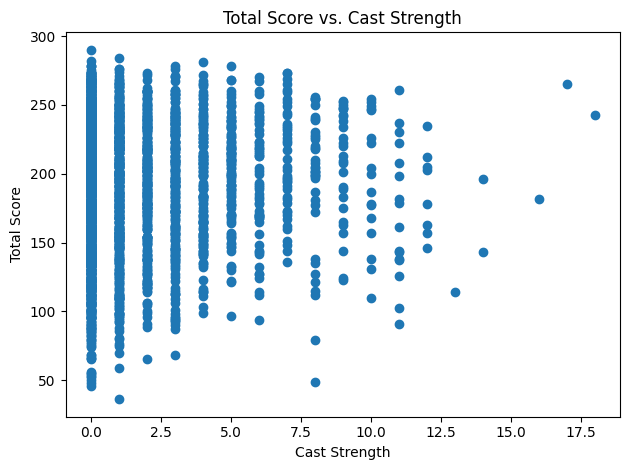

In [885]:
import matplotlib.pyplot as plt

df = result  

plt.figure()
plt.scatter(df['Cast Strength'], df['total score'])
plt.xlabel('Cast Strength')
plt.ylabel('Total Score')
plt.title('Total Score vs. Cast Strength')
plt.tight_layout()
plt.show()

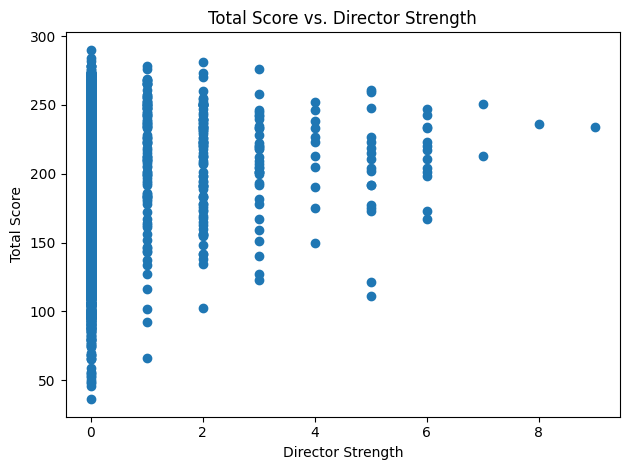

In [883]:

df = result  

plt.figure()
plt.scatter(df['Director Strength'], df['total score'])
plt.xlabel('Director Strength')
plt.ylabel('Total Score')
plt.title('Total Score vs. Director Strength')
plt.tight_layout()
plt.show()

In [879]:
result.to_csv('Movies_Cast_Strength.csv', encoding = 'utf-8', index = False)

## Next Steps:

### what about how well the actors have performed after the movie?


### inflation adjusted box office

In [ ]:
#function that plugs the data into an inflation calculator, returns the multiple


In [805]:
print(type(Movies_and_awards))
print(Movies_and_awards.columns.tolist())
display(Movies_and_awards)

<class 'pandas.core.frame.DataFrame'>
[]


""
0
1
2
3
4
...
2791
2792
2793
2794


In [725]:
Movies_and_awards.head()


,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Metacritic (out of 100),Director,Starring,Release Date,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake
0,12 Years a Slave,2.0,2.0,2010-2019,134,187000000,Drama,BioPic & True Story,Searchlight Pictures,95,...,96,Steve McQueen,"Chiwetel Ejiofor, Michael Fassbender, Lupita N...",2013-10-18,200000000,566719930,1807650610,2374370540,2174370540,0.0
1,127 Hours,1.0,NaN,2010-2019,94,35692920,Drama,BioPic & True Story,Searchlight Pictures,93,...,82,Danny Boyle,"James Franco, Kate Mara, Amber Tamblyn, Clémen...",2010-11-05,180000000,183352300,602171710,785524010,605524010,0.0
2,1917,1.0,2.0,2010-2019,119,374733942,Drama,War,Universal Pictures,89,...,78,Sam Mendes,"George MacKay, Dean-Charles Chapman, Mark Stro...",2019-12-25,1000000000,1592276440,3891404400,5483680840,4483680840,0.0
3,A Beautiful Mind,2.0,2.0,2000-2009,135,313542341,Drama,BioPic & True Story,"Universal Pictures, DreamWorks Pictures, Imagi...",74,...,72,Ron Howard,"Russell Crowe, Ed Harris, Jennifer Connelly, P...",2001-12-21,780000000,1707089960,3176680580,4883770540,4103770540,0.0
4,A Few Good Men,1.0,1.0,1990-1999,138,243240178,Drama,Courtroom & Legal,Columbia Pictures,83,...,62,Rob Reiner,"Tom Cruise, Demi Moore, Kevin Pollak, Kevin Ba...",1992-12-11,330000000,1413401780,2365000000,3778401780,3448401780,0.0


In [ ]:
#Make the 'Actors' dataframe, starting by listing all the unique levels in the 'starring' category
actor_awards = awardsdf2[awardsdf2['
for person in awardsdf2['person']:

step 1: the function takes in the movie as the argument.
step 2: in that movie row, take the date.
step 3: take the date, and sum up the total awards won by all the actors (from the awards df, sum up total awards won) and the total awards nominated by the actors (from awards df, sum up total awards nominated) before the date the movie was released
    the goal of step 3 is to find how many awards have been won and/or nominated collectively by the actors of a given movie. This adds value to the cast, or how strong the cast is based on their past performance
step 4: do the same thing as step 3, but for the directors. sum up all the awards won or nominated by the director(s) of the movie.
    the goal of step 4 is to find the strength of the director of the movie. This can potentially exposes trends to influences of a movies performance
Step 5: Iterate through all movies and return the total awards won and nominated from actors as a column titled 'Cast Strength'
step 6: iterate through all movies and return the toal awards won and nominated from directors as a column titled 'Director Strength'


In [ ]:
#valuing actors- in the "actors" df, sum the total awards as of a given date
#filtering- sum(win) where date < (date criteria

In [ ]:
for col in ['Oscar Status', 'Globes Status', 'Net Gross', 'Runtime (minutes)', 'Budget', 'Domestic Gross', 'Worldwide Gross']:
    cleaned = newmoviedata[col].astype(str).str.replace(r'[^\d\-]', '', regex=True)
    newmoviedata[col] = (
        pd.to_numeric(cleaned, errors='coerce')
          .astype('Int64')    # nullable 64-bit integer extension type
    )
    

In [ ]:
# navigate to the web page using the URL
url = 'https://www.movierankings.net/'
print(url)
browser.get(url)
browser.maximize_window()

#This block of code navagates the scraping to the full rankings page, which lists all the movies
try:
    full_rankings_button = WebDriverWait(browser, 10).until(
        EC.element_to_be_clickable((By.ID, "6"))
    )
    full_rankings_button.click()
    print("Successfully clicked <h3 id='6'> (Full Rankings)")
    
#prints the following message if the full_rankings_button is not clicked
except Exception as e:
    
    print(f"Error clicking <h3 id='6'>: {e}")


# add a random delay before scraping
total_wait_time = random.uniform(1, 5)  
scroll_until_all_movies_loaded(browser)

# We created the for loop below to ensure we were scraping all the data from the page
# Step 1: Load the base elements so you know how many are expected
movie_containers = browser.find_elements(By.CLASS_NAME, "movie")

titles = []
links = []
ratings = []

clicks = 0
max_clicks = 1    # ← for testing, only ever click Next this many times
while True:
    # 1) make sure all movies are loaded
    scroll_until_all_movies_loaded(browser)

    # 2) scrape current page
    movie_containers = browser.find_elements(By.CLASS_NAME, "movie")
    for movie in movie_containers:
        titles.append(movie.find_element(By.CLASS_NAME, "movie-title").text.strip())
        links.append( movie.find_element(By.CLASS_NAME, "movie-link").get_attribute("href"))
        ratings.append(movie.find_element(By.CLASS_NAME, "movie-total").text.strip())

    # 3) if we’ve already clicked Next once, break out
    if clicks >= max_clicks:
        print(f"Test mode: clicked Next {clicks} time(s), stopping.")
        break

    # 4) otherwise try to click Next
    try:
        next_btn = browser.find_element(
            By.XPATH,
            "//div[@id='list-pagination']//button[normalize-space()='Next']"
        )
        if not next_btn.is_enabled():
            print("Next button disabled → last page reached.")
            break

        next_btn.click()
        clicks += 1
        print(f"Clicked Next ({clicks}/{max_clicks})")
        time.sleep(random.uniform(1, 2))

    except Exception:
        print("No Next button found → stopping.")
        break
        
        # build DataFrame as usual
moviedf = pd.DataFrame({
    "Title": titles,
    "Link":  links,
    "Website Rating": ratings
})
display(moviedf)

In [136]:
moviedata2.to_csv('NewMovieData.csv',encoding='utf-8')

(43, 20)